# 7.15.(화)~

메인


In [ ]:
# ================================================================
# [Colab] 한글 폰트 설정을 위한 최종 코드 (이 셀 하나만 실행 후, 런타임 재시작)
# ================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 나눔 폰트를 설치합니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 런타임 재시작
# [중요!] 이 셀을 실행한 후에, Colab 메뉴에서 [런타임] -> [세션 다시 시작]을 반드시 실행해야 합니다.
#    수동으로 재시작하는 것이 가장 확실합니다.
print("✅ 폰트 설치 및 캐시 삭제가 완료되었습니다.")
print("✅ [중요] Colab 메뉴에서 [런타임] -> [세션 다시 시작]을 실행해주세요!")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,916 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and dire

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] =False  # -1일때도 한글 안 깨짐

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
null_id_enter_lesson_df=pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv',  parse_dates=['client_event_time'])
complete_signup_df=pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.signup.csv',  parse_dates=['client_event_time'])


fingerprint_cols= ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

attributed_df = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'client_event_time', 'event_type', 'content.id']], # `user_id`는 null이므로 필요 없음
    complete_signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_non_member', '_signup')
)

attributed_df = attributed_df[attributed_df['client_event_time_non_member'] < attributed_df['client_event_time_signup']].copy()

# 4-2. 시간 차이 계산
attributed_df['time_diff'] = attributed_df['client_event_time_signup'] - attributed_df['client_event_time_non_member']

# 4-3. 가장 가능성 높은 기록 선택 (drop_duplicates)
attributed_df.sort_values(by='time_diff', ascending=True, inplace=True)
final_attributed_signups = attributed_df.drop_duplicates(subset=['user_id', 'client_event_time_signup'], keep='first')

# 5. 최종 결과 확인
print("--- 비회원 유입경로 및 콘텐츠 분석 결과 (상위 10개) ---")
final_report = final_attributed_signups[['user_id', 'client_event_time_signup', 'content.id', 'time_diff']]
print(final_report.head(10))

print("\n--- 회원가입 기여도가 높은 콘텐츠 Top 10 ---")
print(final_attributed_signups['content.id'].value_counts().head(10))

--- 비회원 유입경로 및 콘텐츠 분석 결과 (상위 10개) ---
                                 user_id client_event_time_signup  \
140586  d000f604aac53070b9b0df9f2d8d6177  2023-09-01 04:35:04.020   
66455   e4e9fbb61644f072ea9305cf0590455b  2023-07-14 03:19:42.991   
222582  7e7d9bd1c47054c9b8e5f64492cb52d2  2023-07-07 07:09:47.286   
154358  d52040dc20f06bca0b69862c5f2f3e63  2023-08-01 07:36:10.924   
198657  0c5f3781949a6cbdbe258f9e55a76788  2023-08-30 06:37:17.527   
252975  640c54b3fa2a027281efaee6090ec54f  2023-11-15 10:24:48.514   
43947   bd2e9d9a66c87eecc93e5e6e96b396b1  2023-07-14 08:41:49.758   
195559  010a8eaf07235ab145f9e022a35879f3  2023-08-14 01:03:09.183   
160144  3268e69be9f693f08ace9ef5f630ae00  2023-08-01 11:44:57.118   
156167  dc3837abed36421a01b02e1b482401dd  2023-09-20 13:16:01.186   

                              content.id              time_diff  
140586  ca35d0138a7550f002f975310604a9b7 0 days 00:00:00.040000  
66455   b314d5aba64a0aab40602cb72a4a1504 0 days 00:00:00.073000  
2225

In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

---비회원 체험 콘텐츠의 첫 등장일을  계산합니다---
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
가입 전 14일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: 2728 개
가입 전 30일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: 6218 개
가입 전 60일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: 9452 개
비회원이 가입 전  본 콘텐츠 로그수: 194936 개
✅ 1단계: 고유한 일일 사용자(date + fingerprint) 수를 기준으로 분모를 다시 계산합니다...
---14일 내 신규 콘텐츠를 본 전체 사용자수: 2474명---
---30일 내 신규 콘텐츠를 본 전체 사용자수: 4669명---
---60일 내 신규 콘텐츠를 본 전체 사용자수: 8682명---
---14일 내 기존 콘텐츠를 본 전체 사용자수: 86721명---
---30일 내 기존 콘텐츠를 본 전체 사용자수: 84526명---
---60일 내 기존 콘텐츠를 본 전체 사용자수: 80513명---
✅ 2단계: 가입으로 전환된 고유한 일일 사용자 수를 기준으로 분자를 다시 계산합니다...
---14일 내 신규 콘텐츠를 본 가입 전환 사용자수: 340명---
---30일 내 신규 콘텐츠를 본 가입 전환 사용자수: 593명---
---60일 내 신규 콘텐츠를 본 가입 전환 사용자수: 1104명---
---14일 내 기존 콘텐츠를 본 가입 전환 사용자수: 5998명---
---30일 내 기존 콘텐츠를 본 가입 전환 사용자수: 5745명---
---60일 내 기존 콘텐

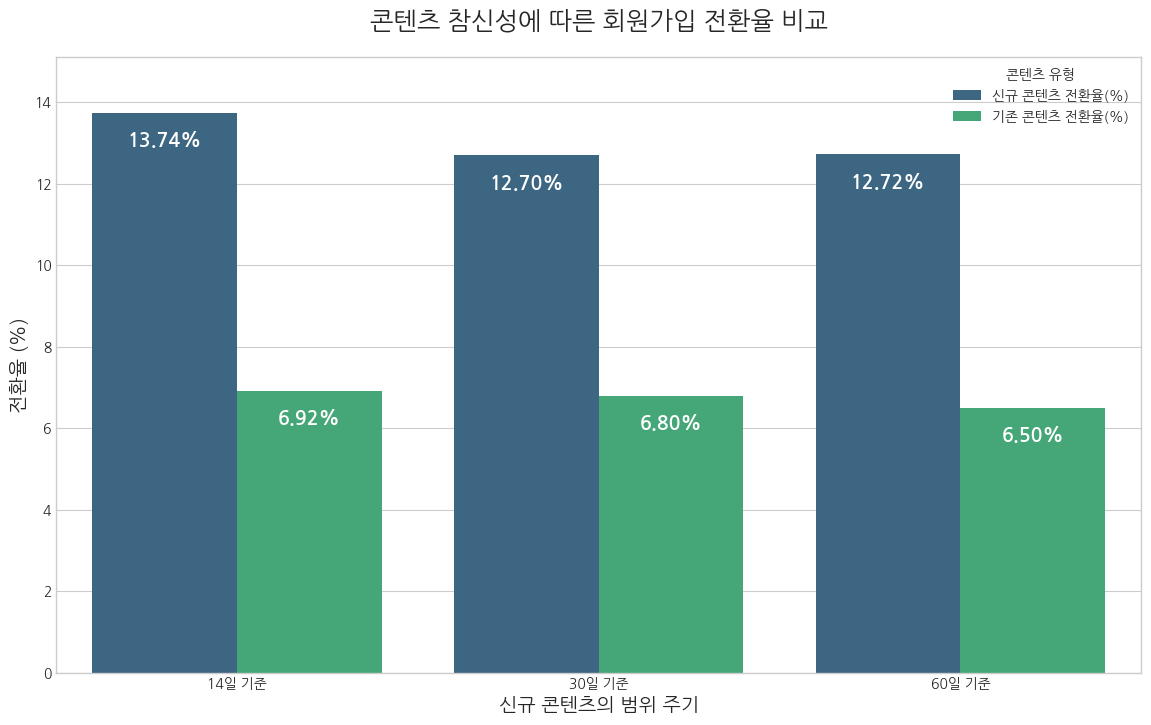

In [ ]:
import pandas as pd

null_id_enter_lesson_df = pd.read_csv(
    '/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv',
    parse_dates=['client_event_time'])

print(f"---비회원 체험 콘텐츠의 첫 등장일을  계산합니다---")
# 1. [핵심] 'content.id'로 그룹화하여, 각 그룹별 'client_event_time'의 최솟값(가장 오래된 시간)
null_id_first_seen_series = null_id_enter_lesson_df.groupby('content.id')['client_event_time'].min()

# 2. 결과 이름(name)을 지정하여 Series의 의미를 명확화
null_id_first_seen_series.name = 'first_seen_by_non_member'

# 3. 비회원 엔터레슨 페이지와 콘텐츠 아이디를 기준으로 첫번째 등장한 시간을 붙임
merged_null_id_df = pd.merge(null_id_enter_lesson_df, null_id_first_seen_series, left_on='content.id', right_index=True, how='left')

# 4.  엔터레슨 진입 시간과 콘텐츠 출시 시간(비회원)의 차이 계산, 런치 이후 몇일째인지 알려주는 컬럼 생성
merged_null_id_df['days_since_launch'] = (merged_null_id_df['client_event_time'] - merged_null_id_df['first_seen_by_non_member']).dt.days

# 5-1.  출시 후 14일(2주) 이내에 시청된 기록만 필터링
non_member_14logs_df = merged_null_id_df[merged_null_id_df['days_since_launch'] <= 14].copy()
# 5-2. 출시 후 30일(1개월) 이내에 시청된 기록만 필터링
non_member_30logs_df = merged_null_id_df[merged_null_id_df['days_since_launch'] <= 30].copy()
#  5-3.  출시 후 60일(2개월) 이내에 시청된 기록만 필터링
non_member_60logs_df = merged_null_id_df[merged_null_id_df['days_since_launch'] <= 60].copy()

# 6. 비회원 데이터의 신규 콘텐츠(출시 14일, 30일, 60일 접근) 로그수 확인
non_member_14log_count = len(non_member_14logs_df)
non_member_30log_count = len(non_member_30logs_df)
non_member_60log_count = len(non_member_60logs_df)
total_non_member_log_count = len(null_id_enter_lesson_df)

# 7. 비회원 데이터의 기존 콘텐츠 접근 로그수 확인
non_member_14log_out_count = total_non_member_log_count-non_member_14log_count
non_member_30log_out_count = total_non_member_log_count-non_member_30log_count
non_member_60log_out_count = total_non_member_log_count-non_member_60log_count

# 8. 회원가입 완료한 날 기준 비회원 접근 최신 콘텐츠(출시 14일 이내, 30일 이내, 60일 이내)의 양
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']
key_cols = ['date'] + fingerprint_cols

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

non_member_14logs_df['fingerprint'] = non_member_14logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_14logs_df['date'] = non_member_14logs_df['client_event_time'].dt.date

non_member_30logs_df['fingerprint'] = non_member_30logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_30logs_df['date'] = non_member_30logs_df['client_event_time'].dt.date

non_member_60logs_df['fingerprint'] = non_member_60logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_60logs_df['date'] = non_member_60logs_df['client_event_time'].dt.date


days_14merge_df = pd.merge(
    non_member_14logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 기준 키로 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

days_30merge_df = pd.merge(
    non_member_30logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 기준 키로 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

days_60merge_df = pd.merge(
    non_member_60logs_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 기준 키로 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

all_days_merge_df = pd.merge(
    null_id_enter_lesson_df, complete_signup_df[key_cols].drop_duplicates(), # 레슨 페이지 기준 키로 중복 제거 후 사용
    on=key_cols,
    how='inner'
)

# 9. 회원가입 완료한 날 기준 비회원 접근 기존 콘텐츠(출시 14일, 30일, 60일 이내)의 양
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")
print(f"가입 전 14일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: {len(days_14merge_df)} 개")
print(f"가입 전 30일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: {len(days_30merge_df)} 개")
print(f"가입 전 60일 이내 콘텐츠를 경험하고 가입한 비회원 콘텐츠 로그수: {len(days_60merge_df)} 개")
print(f"비회원이 가입 전  본 콘텐츠 로그수: {len(all_days_merge_df)} 개")


# 10.  각 그룹의 '전체 모수(고유 일일 사용자 수)' 중복 제거)
print("✅ 1단계: 고유한 일일 사용자(date + fingerprint) 수를 기준으로 분모를 다시 계산합니다...")

# [수정] 고유한 (date, fingerprint) 조합의 개수를 정확하게 계산합니다.
# 신규 그룹
unique_new_14 = len(non_member_14logs_df[['date', 'fingerprint']].drop_duplicates())
unique_new_30 = len(non_member_30logs_df[['date', 'fingerprint']].drop_duplicates())
unique_new_60 = len(non_member_60logs_df[['date', 'fingerprint']].drop_duplicates())

print(f"---14일 내 신규 콘텐츠를 본 전체 사용자수: {unique_new_14}명---")
print(f"---30일 내 신규 콘텐츠를 본 전체 사용자수: {unique_new_30}명---")
print(f"---60일 내 신규 콘텐츠를 본 전체 사용자수: {unique_new_60}명---")

# 기존 그룹
all_non_member_sessions = set(map(tuple, null_id_enter_lesson_df[['date', 'fingerprint']].drop_duplicates().values))
new_14_sessions = set(map(tuple, non_member_14logs_df[['date', 'fingerprint']].drop_duplicates().values))
new_30_sessions = set(map(tuple, non_member_30logs_df[['date', 'fingerprint']].drop_duplicates().values))
new_60_sessions = set(map(tuple, non_member_60logs_df[['date', 'fingerprint']].drop_duplicates().values))

unique_old_14 = len(all_non_member_sessions - new_14_sessions)
unique_old_30 = len(all_non_member_sessions - new_30_sessions)
unique_old_60 = len(all_non_member_sessions - new_60_sessions)

print(f"---14일 내 기존 콘텐츠를 본 전체 사용자수: {unique_old_14}명---")
print(f"---30일 내 기존 콘텐츠를 본 전체 사용자수: {unique_old_30}명---")
print(f"---60일 내 기존 콘텐츠를 본 전체 사용자수: {unique_old_60}명---")

# 11. 각 그룹의 '가입 전환 사용자 수' 재계산
print("✅ 2단계: 가입으로 전환된 고유한 일일 사용자 수를 기준으로 분자를 다시 계산합니다...")

# =======가입으로 전환된 고유한 (date, fingerprint) 조합의 개수 계산
#========신규 그룹 (가입 전환)
conversions_new_14 = len(days_14merge_df[['date', 'fingerprint']].drop_duplicates())
conversions_new_30 = len(days_30merge_df[['date', 'fingerprint']].drop_duplicates())
conversions_new_60 = len(days_60merge_df[['date', 'fingerprint']].drop_duplicates())

print(f"---14일 내 신규 콘텐츠를 본 가입 전환 사용자수: {conversions_new_14}명---")
print(f"---30일 내 신규 콘텐츠를 본 가입 전환 사용자수: {conversions_new_30}명---")
print(f"---60일 내 신규 콘텐츠를 본 가입 전환 사용자수: {conversions_new_60}명---")


# 기존 그룹 (가입 전환)
all_converted_sessions = set(map(tuple, all_days_merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_14_sessions = set(map(tuple, days_14merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_30_sessions = set(map(tuple, days_30merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_60_sessions = set(map(tuple, days_60merge_df[['date', 'fingerprint']].drop_duplicates().values))

conversions_old_14 = len(all_converted_sessions - converted_new_14_sessions)
conversions_old_30 = len(all_converted_sessions - converted_new_30_sessions)
conversions_old_60 = len(all_converted_sessions - converted_new_60_sessions)

print(f"---14일 내 기존 콘텐츠를 본 가입 전환 사용자수: {conversions_old_14}명---")
print(f"---30일 내 기존 콘텐츠를 본 가입 전환 사용자수: {conversions_old_30}명---")
print(f"---60일 내 기존 콘텐츠를 본 가입 전환 사용자수: {conversions_old_60}명---")


# 12.  '고유 사용자' 기준 전환율 계산 --------------------
print("\n\n---고유 사용자 기준 전환율 계산 ---")

# 각 그룹의 전환율을 계산합니다.
conv_rate_new_14_user = (conversions_new_14 / unique_new_14 * 100) if unique_new_14 > 0 else 0
conv_rate_old_14_user = (conversions_old_14 / unique_old_14 * 100) if unique_old_14 > 0 else 0

conv_rate_new_30_user = (conversions_new_30 / unique_new_30 * 100) if unique_new_30 > 0 else 0
conv_rate_old_30_user = (conversions_old_30 / unique_old_30 * 100) if unique_old_30 > 0 else 0

conv_rate_new_60_user = (conversions_new_60 / unique_new_60 * 100) if unique_new_60 > 0 else 0
conv_rate_old_60_user = (conversions_old_60 / unique_old_60 * 100) if unique_old_60 > 0 else 0

# 13.  결과를 보기 좋은 데이터프레임
conversion_data_user = {
    '신규 콘텐츠 전환율(%)': [conv_rate_new_14_user, conv_rate_new_30_user, conv_rate_new_60_user],
    '기존 콘텐츠 전환율(%)': [conv_rate_old_14_user, conv_rate_old_30_user, conv_rate_old_60_user]
}
conversion_df_user = pd.DataFrame(conversion_data_user, index=['14일 기준', '30일 기준', '60일 기준'])

print(conversion_df_user.round(2))

# -------------------- 14. 시각화 (업그레이드 버전) --------------------
print("\n\n--- 전환율 시각화 (업그레이드) ---")

plt.style.use('seaborn-v0_8-whitegrid') # 더 깔끔한 스타일 적용
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# [수정 1] ax 객체를 먼저 만들어서 더 세밀하게 제어합니다.
fig, ax = plt.subplots(figsize=(14, 8))

# pandas의 plot 대신, seaborn의 barplot을 사용하여 더 예쁜 색상과 범례 관리를 합니다.
# 먼저 데이터를 시각화에 용이한 'long-form' 형태로 변환합니다.
plot_df = conversion_df_user.reset_index().melt(
    id_vars='index',
    var_name='콘텐츠 유형',
    value_name='전환율(%)'
)
plot_df.rename(columns={'index': '신규 콘텐츠 정의 기준'}, inplace=True)

sns.barplot(data=plot_df, x='신규 콘텐츠 정의 기준', y='전환율(%)', hue='콘텐츠 유형', ax=ax, palette='viridis')


# [수정 2] 각 막대 위에 값을 '정중앙'에, '크고 굵게' 표시합니다.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',                       # 표시할 텍스트 (소수점 둘째 자리)
                (p.get_x() + p.get_width() / 2., p.get_height()),    # 텍스트 위치 (막대 상단 중앙)
                ha='center', va='center',                       # 정렬
                xytext=(0, -20),                                # 막대 안쪽으로 20포인트 내림
                textcoords='offset points',
                fontsize=14,                                    # 폰트 크기 증가
                weight='bold',                                  # 폰트 굵게
                color='white')                                  # 폰트 색상 흰색


# 그래프 제목 및 라벨 설정
ax.set_title('콘텐츠 참신성에 따른 회원가입 전환율 비교', fontsize=18, pad=20)
ax.set_xlabel('신규 콘텐츠의 범위 주기', fontsize=14)
ax.set_ylabel('전환율 (%)', fontsize=14)

# Y축 범위를 데이터보다 넉넉하게 설정
ax.set_ylim(0, plot_df['전환율(%)'].max() * 1.1)

plt.show()

## a/b 테스트 계획


In [ ]:
import pandas as pd


null_id_enter_main_page_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/unique_null_enter_page.csv', parse_dates=['client_event_time'])
null_id_signup_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/unique_null_signup_page.csv', parse_dates=['client_event_time'])
# -------------------- 0단계: '전체 비회원 세션' 정의 (가장 먼저 실행) --------------------
print("✅ 0단계: 분석의 기준이 될 '전체 비회원 세션'을 정의합니다...")

fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

# 전처리가 필요한 모든 DF 리스트
dfs_to_process = [
    null_id_enter_lesson_df,
    null_id_enter_main_page_df,
    null_id_signup_df,
    complete_signup_df
]

for df in dfs_to_process:
    # 이미 컬럼이 존재하면 건너뛰도록 방어 코드를 추가합니다.
    if 'fingerprint' not in df.columns:
        df['fingerprint'] = df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
    if 'date' not in df.columns:
        df['date'] = df['client_event_time'].dt.date

# 비회원 활동이 기록된 모든 데이터프레임을 하나의 리스트에 담습니다.
all_non_member_logs_list = [
    null_id_enter_lesson_df,
    null_id_enter_main_page_df,
    null_id_signup_df
]

# pd.concat()으로 모든 로그를 하나의 거대한 데이터프레임으로 합칩니다.
all_non_member_logs_df = pd.concat(all_non_member_logs_list, ignore_index=True)

# 합쳐진 전체 로그에서, 고유한 '일일 사용자 세션(date + fingerprint)'을 추출합니다.
all_non_member_act = set(map(tuple, all_non_member_logs_df[['date', 'fingerprint']].drop_duplicates().values))

print(f"  - 총 {len(all_non_member_act):,}개의 고유한 전체 비회원 세션을 정의했습니다.")

complete_signup_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.signup.csv', parse_dates=['client_event_time'])
complete_signup_df.info()
complete_signup_df.head(10)
unique_complete_signup = complete_signup_df['user_id'].nunique()

print(f"  - 총 {(unique_complete_signup):,}개의 고유한 전체 회원 세션을 정의했습니다.")
# -------------------- 1단계: '현재 상태' 계산 --------------------


print("✅ 1단계: 현재의 전체 가입 전환율을 계산합니다...")

total_sessions = len(all_non_member_act)
total_conversions = unique_complete_signup
current_total_conversion_rate = (total_conversions / total_sessions * 100) if total_sessions > 0 else 0

print(f"  - 전체 비회원 세션 수: {total_sessions:,}")
print(f"  - 전체 가입 전환 수: {total_conversions:,}")
print(f"  - 현재 전체 가입 전환율: {current_total_conversion_rate:.2f}%")


# -------------------- 2단계 & 3단계: '개선 잠재력' 및 '기대 전환율' 설정 --------------------
print("\n✅ 2단계 & 3단계: 개선 잠재력 및 기대 전환율을 설정합니다...")

# [2단계] A/B 테스트의 영향을 받을 그룹은 '신규 콘텐츠 경험 그룹'입니다.
#         우리는 이 그룹의 성과를 '기존 그룹' 수준에서 '신규 그룹' 수준으로 끌어올리려고 합니다.
#         따라서, 우리는 '기존 그룹'이 얼마나 '신규 그룹'처럼 행동하게 될지를 계산합니다.


all_non_member_sessions = set(map(tuple, null_id_enter_lesson_df[['date', 'fingerprint']].drop_duplicates().values))
old_only_sessions = all_non_member_sessions -new_14_sessions
old_only_session_count = len(old_only_sessions)

# [3단계] 이 '기존 그룹'의 전환율이, 실험 성공 시 '신규 그룹'의 전환율 수준으로 상승한다고 가정합니다.
#         이것이 우리의 '기대 전환율'입니다.
baseline_rate = conv_rate_old_14_user / 100 # 기존 그룹의 현재 전환율
target_rate = conv_rate_new_14_user / 100   # 신규 그룹의 전환율 (우리의 목표)

print(f"  - 개선 대상 그룹 ('기존' 경험자) 규모: {old_only_session_count:,} 세션")
print(f"  - 이들의 현재 전환율 (Baseline): {baseline_rate:.2%}")
print(f"  - 실험 성공 시 기대 전환율 (Target): {target_rate:.2%}")


# -------------------- 4단계: '기대 효과' 최종 계산 --------------------
print("\n✅ 4단계: 최종 기대 효과를 계산합니다...")

# 현재 '기존 그룹'의 가입자 수
current_old_conversions = old_only_session_count * baseline_rate
# 실험 성공 시 '기존 그룹'의 기대 가입자 수
expected_old_conversions = old_only_session_count * target_rate
# 순수하게 증가하는 가입자 수
net_increase_in_conversions = expected_old_conversions - current_old_conversions

# 전체 가입자 수의 기대치
expected_total_conversions = total_conversions + net_increase_in_conversions
# 전체 가입 전환율의 기대치
expected_total_conversion_rate = (expected_total_conversions / total_sessions * 100)

# 최종적인 '전환율 향상률'
percentage_improvement = ((expected_total_conversion_rate - current_total_conversion_rate) / current_total_conversion_rate) * 100


print("\n\n=======================================================")
print("  [A/B 테스트 기대 효과 최종 분석]")
print("=======================================================")
print(f"  - 실험 성공 시, 순수 증가 가입자 수: {int(net_increase_in_conversions):,} 명")
print(f"  - 실험 후, 전체 가입 전환율 기대치: {expected_total_conversion_rate:.2f}%")
print("-------------------------------------------------------")
print(f"  >>> 최종 기대 효과: 전체 가입 전환율 약 {percentage_improvement:.1f}% 향상")
print("=======================================================")

✅ 0단계: 분석의 기준이 될 '전체 비회원 세션'을 정의합니다...
  - 총 859,243개의 고유한 전체 비회원 세션을 정의했습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145133 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_carrier     0 non-null       float64       
 4   device_family      45767 non-null   object        
 5   device_type        44659 non-null   object        
 6   event_type         145133 non-null  object        
 7   language           45767 non-null   object        
 8   os_name            45745 non-null   object        
 9   os_version         45651 non-null   object        
 10  platform           45767 non-null   object        
 11  user_id            145133 non-null  object        
 12  type               144

✅ 1단계: A/B 테스트 결과 예측을 위한 최종 데이터를 준비합니다...

✅ 2단계: 최종 결과 예측 그래프를 생성합니다...


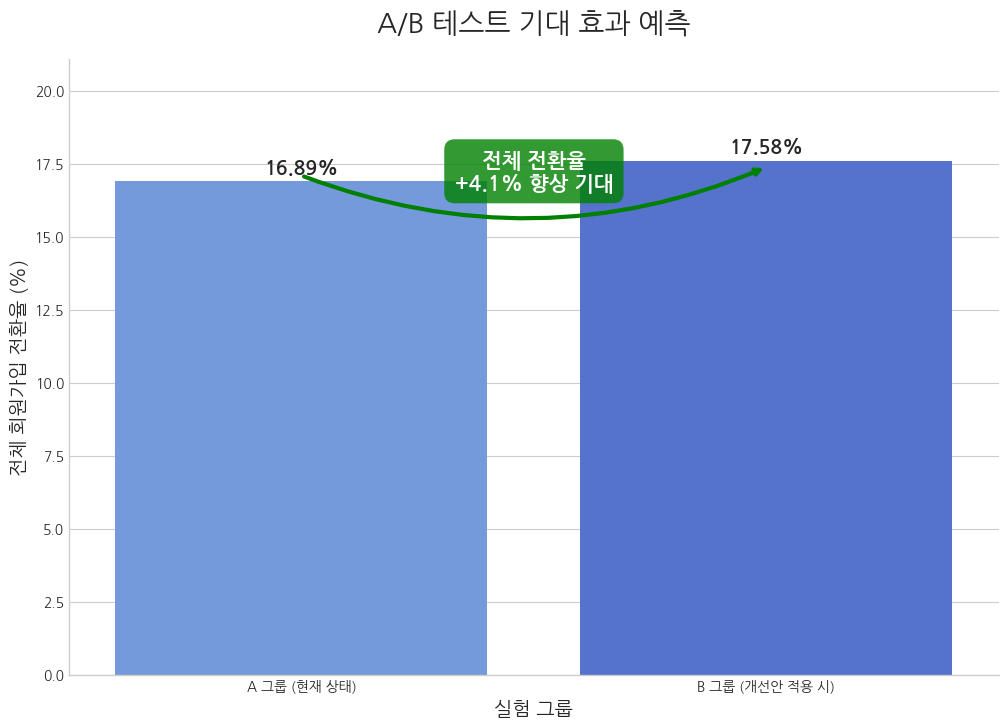

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- 1단계: 시각화를 위한 최종 데이터 준비 --------------------
print("✅ 1단계: A/B 테스트 결과 예측을 위한 최종 데이터를 준비합니다...")

# [핵심] 당신이 최종적으로 계산한 실제 값들을 여기에 입력합니다.
current_total_conversion_rate = 16.89  # 현재 전체 가입 전환율
expected_total_conversion_rate = 17.58 # 실험 성공 시의 기대 전환율
percentage_improvement = 4.1          # 기대 상승폭 (%)

# 시각화를 위한 데이터프레임 생성
results_df = pd.DataFrame({
    'Group': ['A 그룹 (현재 상태)', 'B 그룹 (개선안 적용 시)'],
    'Conversion Rate (%)': [current_total_conversion_rate, expected_total_conversion_rate]
})


# -------------------- 2단계: 최종 결과 예측 그래프 시각화 --------------------
print("\n✅ 2단계: 최종 결과 예측 그래프를 생성합니다...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('font', family='NanumGothic') # Colab 한글 폰트
plt.rcParams['axes.unicode_minus'] = False


fig, ax = plt.subplots(figsize=(12, 8))

# 막대 그래프 그리기
sns.barplot(data=results_df, x='Group', y='Conversion Rate (%)', palette=['cornflowerblue', 'royalblue'], ax=ax)

# 각 막대 위에 전환율(%) 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14, weight='bold')

# [핵심] 두 막대 사이에 '상승폭' 정보 추가
# 화살표 시작점과 끝점 좌표
x_start, y_start = 0, current_total_conversion_rate + 0.2
x_end, y_end = 1, expected_total_conversion_rate - 0.2

# 화살표와 텍스트 추가
ax.annotate('', xy=(x_end, y_end), xytext=(x_start, y_start),
            arrowprops=dict(arrowstyle="->", color="green", lw=3, connectionstyle="arc3,rad=0.2"))

ax.text(0.5, (current_total_conversion_rate + expected_total_conversion_rate) / 2,
        f'전체 전환율\n{percentage_improvement:+.1f}% 향상 기대',
        ha='center', va='center', fontsize=15, weight='bold', color='white',
        bbox=dict(boxstyle="round,pad=0.5", fc='green', ec='none', alpha=0.8))


# 그래프 꾸미기
ax.set_title('A/B 테스트 기대 효과 예측', fontsize=20, pad=20)
ax.set_xlabel('실험 그룹', fontsize=14)
ax.set_ylabel('전체 회원가입 전환율 (%)', fontsize=14)
ax.set_ylim(0, expected_total_conversion_rate * 1.2) # y축 범위 넉넉하게 설정
ax.spines[['top', 'right']].set_visible(False) # 오른쪽, 위쪽 테두리 제거

plt.show()

In [ ]:
merged_null_id_df.head()

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,lesson.id,is_free_trial,first_seen_by_non_member,days_since_launch
0,NaN,2023-04-05 21:04:19.774,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,110.0.0.0,Web,NaN,db1819d3a7a4c4d85dccb3b9e982fbcd,False,73ef28f4d72d40e571b5a3a3df826ef7,NaN,2022-01-02 08:11:15.155,458.0
1,NaN,2023-04-05 21:16:34.067,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,110.0.0.0,Web,NaN,8a72eed73d3f9d3ab1771548070e7338,False,127a02f25f1872a98e46467e9a02a531,NaN,2022-01-01 04:56:14.466,459.0
2,NaN,2023-04-05 21:28:46.441,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,110.0.0.0,Web,NaN,878bb38f14991c6ab57f3d7f5e456d75,False,1a2aaeb4aad8991aed51e24e4b7c45de,NaN,2022-01-12 22:18:19.940,447.0
3,NaN,2023-04-05 21:36:06.042,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,110.0.0.0,Web,NaN,6c114626032aa4a43c62fd7fcdb19543,False,5ba9d48917c21d8ad320b7a7e94b1f45,NaN,2022-01-08 08:55:51.107,452.0
4,NaN,2023-04-05 21:40:59.422,South Korea,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,110.0.0.0,Web,NaN,db1819d3a7a4c4d85dccb3b9e982fbcd,False,685c72776f4e9f3d1f61bcc81bc244f0,NaN,2022-01-02 08:11:15.155,458.0


신규 콘텐츠의 가입 전환률 그래프

✅ [전처리] 데이터에 '디지털 지문'을 생성합니다...
✅ 1단계: 비회원 로그에 '출시 후 경과일' 정보를 추가합니다...
✅ 2단계: 출시 후 경과일별 '전체 경험자 수(분모)'를 계산합니다...
✅ 3단계: 출시 후 경과일별 '가입 전환자 수(분자)'를 계산합니다...
✅ 4단계: 최종 결과를 계산하고 시각화합니다...


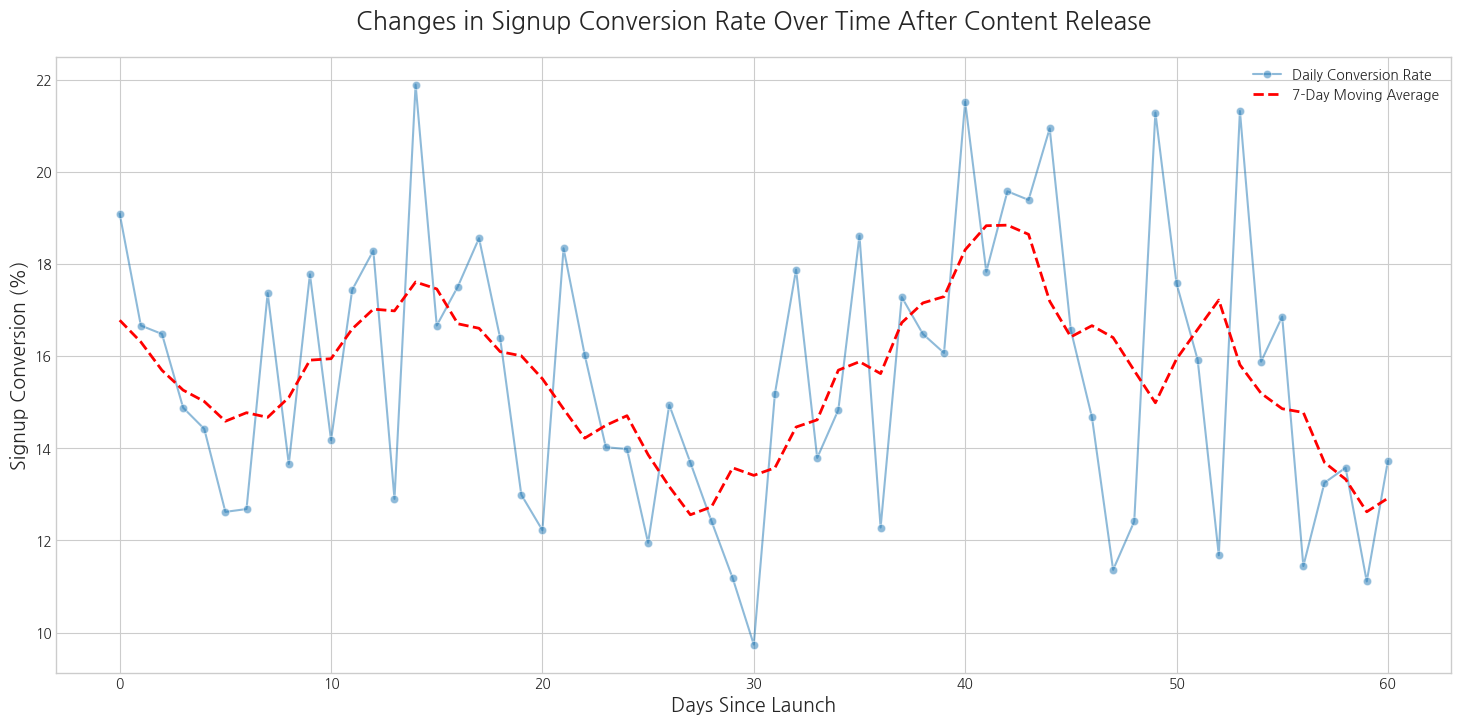

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- [전처리] 데이터 준비 및 지문 생성 --------------------
print("✅ [전처리] 데이터에 '디지털 지문'을 생성합니다...")

# 원본을 복사하여 안전하게 작업
non_member_df = null_id_enter_lesson_df.copy()
signup_df = complete_signup_df.copy()

fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

non_member_df['fingerprint'] = non_member_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
non_member_df['date'] = non_member_df['client_event_time'].dt.date

signup_df['fingerprint'] = signup_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
signup_df['date'] = signup_df['client_event_time'].dt.date


# -------------------- 1단계: 비회원 로그에 '출시 후 경과일' 정보 추가 --------------------
print("✅ 1단계: 비회원 로그에 '출시 후 경과일' 정보를 추가합니다...")
# 이 단계에서 merged_df가 생성됩니다.
merged_df = pd.merge(
    non_member_df,
    null_id_first_seen_series,
    left_on='content.id',
    right_index=True,
    how='left'
)
merged_df['days_since_launch'] = (merged_df['client_event_time'] - merged_df['first_seen_by_non_member']).dt.days


# -------------------- 2단계: '일자별 전체 모수(분모)' 계산 --------------------
print("✅ 2단계: 출시 후 경과일별 '전체 경험자 수(분모)'를 계산합니다...")
daily_pool = merged_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
daily_pool.name = 'total_experiences'


# -------------------- 3단계: '일자별 가입 전환 수(분자)' 계산 --------------------
print("✅ 3단계: 출시 후 경과일별 '가입 전환자 수(분자)'를 계산합니다...")
attributed_df = pd.merge(
    merged_df[['date', 'fingerprint', 'days_since_launch']],
    signup_df[['date', 'fingerprint']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)
daily_conversions = attributed_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
daily_conversions.name = 'converted_experiences'


# -------------------- 4단계: '일자별 전환율' 계산 및 시각화 (수정 완료) --------------------
print("✅ 4단계: 최종 결과를 계산하고 시각화합니다...")
conversion_by_day_df = pd.concat([daily_pool, daily_conversions], axis=1).fillna(0)


conversion_by_day_df['conversion_rate(%)'] = (conversion_by_day_df['converted_experiences'] / conversion_by_day_df['total_experiences'] * 100)

# --- 시각화 부분 수정 ---
# 출시 후 0일 ~ 60일까지의 데이터만 시각화 대상으로 삼습니다.
plot_df = conversion_by_day_df[(conversion_by_day_df.index >= 0) & (conversion_by_day_df.index <= 60)]

# [핵심 수정 1] 캔버스(fig)와 도화지(ax)를 함께 생성합니다.
fig, ax = plt.subplots(figsize=(18, 8))

# [핵심 수정 2] 먼저, 메인 데이터인 '일별 전환율'을 그립니다.
sns.lineplot(
    data=plot_df,
    x=plot_df.index,
    y='conversion_rate(%)',
    ax=ax,
    marker='o',
    linestyle='-',
    label='Daily Conversion Rate',
    alpha=0.5
)

# [핵심 수정 3] 그 위에 '이동 평균 추세선'을 겹쳐 그립니다.
plot_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax,
    color='red',
    linestyle='--',
    linewidth=2,
    label='7-Day Moving Average'
)

# 그래프 꾸미기 (영문 버전)
plt.title('Changes in Signup Conversion Rate Over Time After Content Release', fontsize=18, pad=20)
plt.xlabel('Days Since Launch', fontsize=14)
plt.ylabel('Signup Conversion (%)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
conversion_by_day_df.head(20)

,total_experiences,converted_experiences,conversion_rate(%)
days_since_launch,,,
0.0,309,59.0,19.093851
1.0,186,31.0,16.666667
2.0,182,30.0,16.483516
3.0,215,32.0,14.883721
4.0,208,30.0,14.423077
5.0,206,26.0,12.621359
6.0,205,26.0,12.682927
7.0,213,37.0,17.370892
8.0,183,25.0,13.661202


기존 콘텐츠의 날짜별 가입전환률 변화

✅ [추가] 1단계: '순수 신규 경험 그룹'을 정의하고 데이터를 추출합니다...
  - '오직 14일 이내 신규 콘텐츠만' 경험한 순수 세션의 로그 6429개를 추출했습니다.
✅ [추가] 2단계: '순수 신규 그룹'의 일자별 전환율을 계산합니다...
✅ 최종 시각화: 세 그룹의 전환율 추세를 비교합니다...


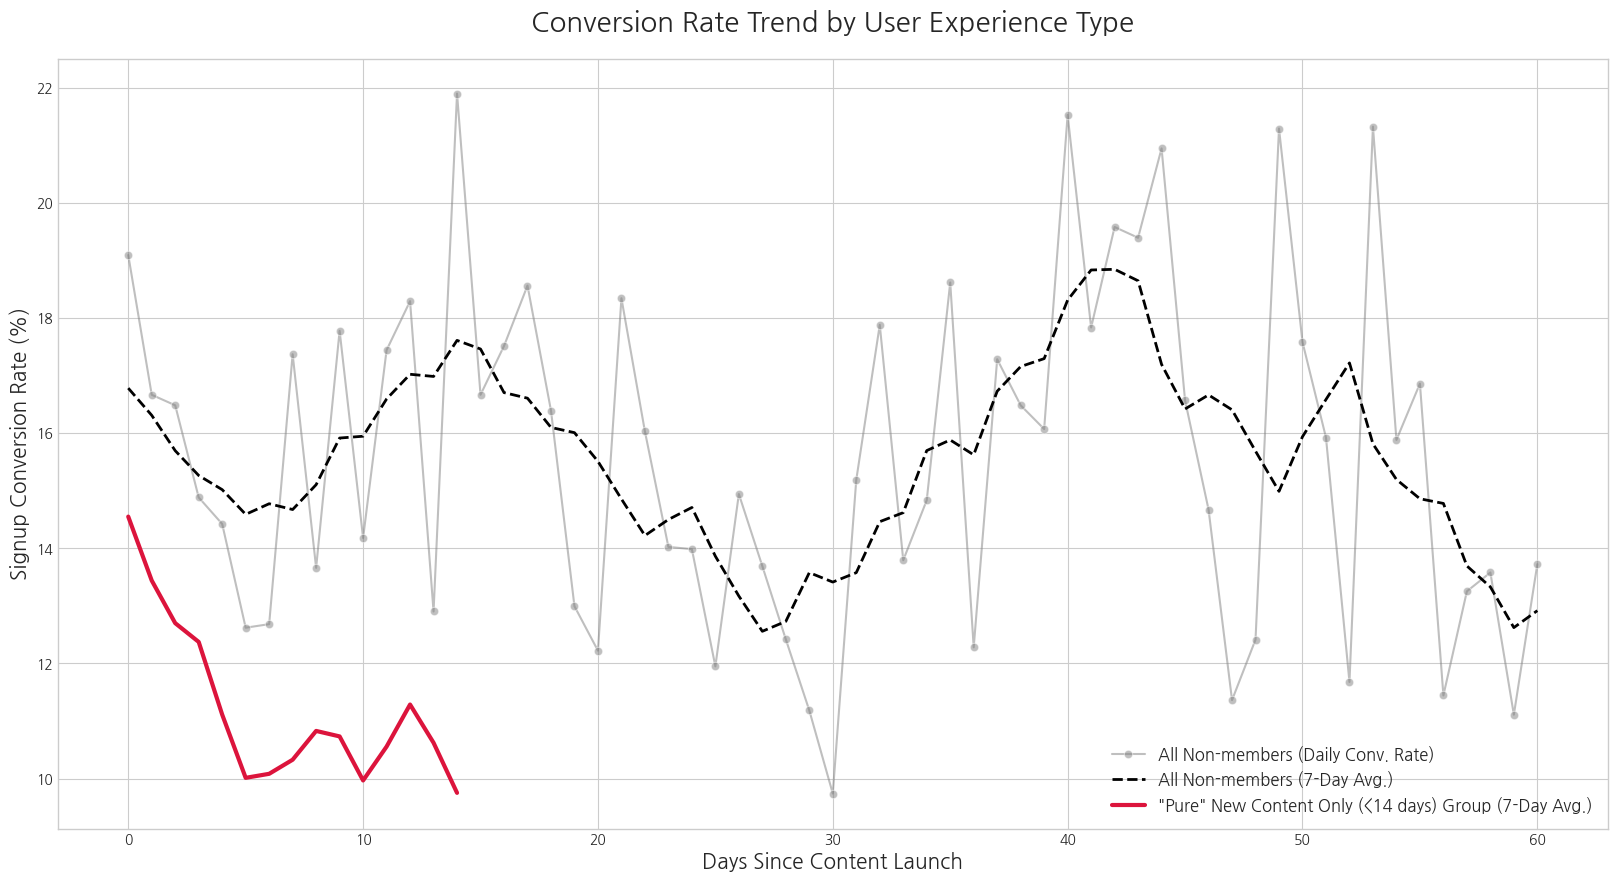

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------- [추가] 1단계: '순수 신규 경험' 그룹 정의 및 데이터 추출 --------------------
print("✅ [추가] 1단계: '순수 신규 경험 그룹'을 정의하고 데이터를 추출합니다...")

# 각 (date, fingerprint) 세션별로 경험한 콘텐츠의 최대 'days_since_launch' 값을 계산합니다.
session_max_launch_days = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].max()

# '신규'의 기준을 14일로 설정합니다.
NEW_CONTENT_DAY_THRESHOLD = 14

# 경험한 모든 콘텐츠가 출시 14일 이내인 '순수 신규 경험' 세션만 필터링합니다.
pure_new_sessions = session_max_launch_days[session_max_launch_days <= NEW_CONTENT_DAY_THRESHOLD].index
pure_new_exp_df = merged_df[
    pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_new_sessions)
]

print(f"  - '오직 {NEW_CONTENT_DAY_THRESHOLD}일 이내 신규 콘텐츠만' 경험한 순수 세션의 로그 {len(pure_new_exp_df)}개를 추출했습니다.")


# -------------------- [추가] 2단계: '순수 신규 그룹'의 일자별 전환율 계산 --------------------
print("✅ [추가] 2단계: '순수 신규 그룹'의 일자별 전환율을 계산합니다...")

# 분모 계산
daily_pool_pure_new = pure_new_exp_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
daily_pool_pure_new.name = 'total_experiences'

# 분자 계산
attributed_pure_new_df = pd.merge(
    pure_new_exp_df[['date', 'fingerprint', 'days_since_launch']],
    signup_df[['date', 'fingerprint']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)
daily_conversions_pure_new = attributed_pure_new_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
daily_conversions_pure_new.name = 'converted_experiences'

# 전환율 계산
conversion_pure_new_df = pd.concat([daily_pool_pure_new, daily_conversions_pure_new], axis=1).fillna(0)
conversion_pure_new_df['conversion_rate(%)'] = \
    (conversion_pure_new_df['converted_experiences'] / conversion_pure_new_df['total_experiences'] * 100).replace([np.inf, -np.inf], 0)


# -------------------- 최종 시각화: 세 개의 추세선 겹쳐 그리기 --------------------
print("✅ 최종 시각화: 세 그룹의 전환율 추세를 비교합니다...")

# 출시 후 60일까지의 데이터만 시각화 대상으로 삼습니다.
plot_df_all = conversion_by_day_df[(conversion_by_day_df.index >= 0) & (conversion_by_day_df.index <= 60)]
plot_df_pure_new = conversion_pure_new_df[(conversion_pure_new_df.index >= 0) & (conversion_pure_new_df.index <= 60)]


fig, ax = plt.subplots(figsize=(20, 10))

# 1. 전체 비회원 그룹의 전환율 추세 (이전과 동일)
sns.lineplot(
    data=plot_df_all, x=plot_df_all.index, y='conversion_rate(%)',
    ax=ax, marker='o', linestyle='-', label='All Non-members (Daily Conv. Rate)', alpha=0.5, color='gray'
)

# 2. 전체 비회원 그룹의 7일 이동 평균
plot_df_all['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='black', linestyle='--', linewidth=2, label='All Non-members (7-Day Avg.)'
)

# 3. [핵심] '순수 신규 경험' 그룹의 7일 이동 평균 (강조)
plot_df_pure_new['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='crimson', linestyle='-', linewidth=3, label=f'"Pure" New Content Only (<{NEW_CONTENT_DAY_THRESHOLD} days) Group (7-Day Avg.)'
)


# 그래프 꾸미기 (영문 버전)
plt.title('Conversion Rate Trend by User Experience Type', fontsize=20, pad=20)
plt.xlabel('Days Since Content Launch', fontsize=15)
plt.ylabel('Signup Conversion Rate (%)', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

✅ [추가] 1단계: '순수 신규' 및 '순수 기존' 그룹을 정의하고 데이터를 추출합니다...
  - '순수 신규' 그룹 로그 6429개, '순수 기존' 그룹 로그 1455575개를 추출했습니다.
✅ [추가] 2단계: 각 '순수' 그룹의 일자별 전환율을 계산합니다...
✅ 최종 시각화: 세 그룹의 전환율 추세를 비교합니다...


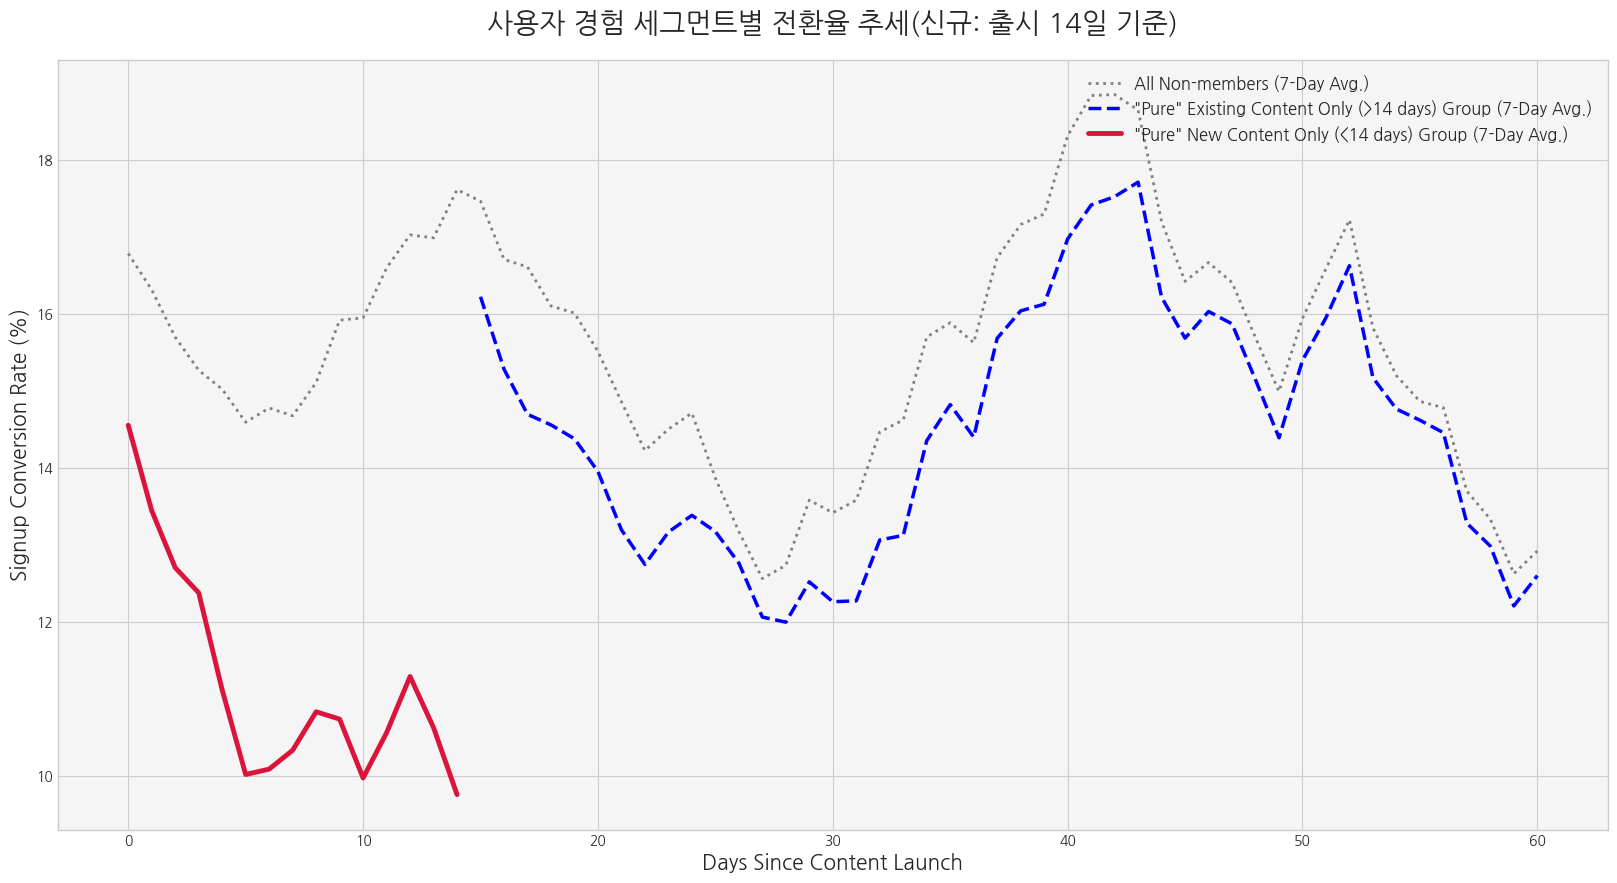

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [가정] 이전 단계에서 모든 필요한 변수들이 준비된 상태
# 1. merged_df: 비회원 로그에 'days_since_launch'가 추가된 데이터프레임
# 2. signup_df: 회원가입 로그 (핑거프린트와 date 컬럼이 추가된 상태)
# 3. conversion_by_day_df: '전체' 비회원의 일자별 전환율이 계산된 데이터프레임

# -------------------- [추가] 1단계: '순수 신규' 및 '순수 기존' 그룹 정의 --------------------
print("✅ [추가] 1단계: '순수 신규' 및 '순수 기존' 그룹을 정의하고 데이터를 추출합니다...")

# 각 세션별 경험한 콘텐츠의 최대/최소 'days_since_launch' 값을 계산합니다.
session_launch_days = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].agg(['min', 'max'])

# '신규'의 기준을 14일로 설정합니다.
NEW_CONTENT_DAY_THRESHOLD = 14

# '순수 신규 경험' 세션: 경험한 모든 콘텐츠가 출시 14일 이내 (max <= 14)
pure_new_sessions = session_launch_days[session_launch_days['max'] <= NEW_CONTENT_DAY_THRESHOLD].index
pure_new_exp_df = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_new_sessions)]

# [핵심] '순수 기존 경험' 세션: 경험한 모든 콘텐츠가 출시 14일 이후 (min > 14)
pure_old_sessions = session_launch_days[session_launch_days['min'] > NEW_CONTENT_DAY_THRESHOLD].index
pure_old_exp_df = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_old_sessions)]

print(f"  - '순수 신규' 그룹 로그 {len(pure_new_exp_df)}개, '순수 기존' 그룹 로그 {len(pure_old_exp_df)}개를 추출했습니다.")


# -------------------- [추가] 2단계: 각 '순수' 그룹의 일자별 전환율 계산 --------------------
print("✅ [추가] 2단계: 각 '순수' 그룹의 일자별 전환율을 계산합니다...")

def calculate_daily_conversion(experience_df, signup_df):
    """경험 로그와 가입 로그를 받아, 일자별 전환율을 계산하는 함수"""
    daily_pool = experience_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    attributed = pd.merge(experience_df[['date', 'fingerprint', 'days_since_launch']], signup_df[['date', 'fingerprint']].drop_duplicates(), on=['date', 'fingerprint'], how='inner')
    daily_conversions = attributed.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))

    conv_df = pd.concat([daily_pool.rename('total'), daily_conversions.rename('converted')], axis=1).fillna(0)
    conv_df['conversion_rate(%)'] = (conv_df['converted'] / conv_df['total'] * 100).replace([np.inf, -np.inf], 0)
    return conv_df

# 각 그룹별 전환율 계산
conversion_pure_new_df = calculate_daily_conversion(pure_new_exp_df, signup_df)
conversion_pure_old_df = calculate_daily_conversion(pure_old_exp_df, signup_df)


# -------------------- 최종 시각화: 네 개의 추세선 겹쳐 그리기 --------------------
print("✅ 최종 시각화: 세 그룹의 전환율 추세를 비교합니다...")

# 시각화 대상 기간 설정
plot_df_all = conversion_by_day_df[(conversion_by_day_df.index >= 0) & (conversion_by_day_df.index <= 60)]
plot_df_pure_new = conversion_pure_new_df[(conversion_pure_new_df.index >= 0) & (conversion_pure_new_df.index <= 60)]
plot_df_pure_old = conversion_pure_old_df[(conversion_pure_old_df.index >= 0) & (conversion_pure_old_df.index <= 60)]

fig, ax = plt.subplots(figsize=(20, 10))

# 1. 전체 비회원 그룹의 7일 이동 평균 (기준선)
plot_df_all['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='gray', linestyle=':', linewidth=2, label='All Non-members (7-Day Avg.)'
)

# 2. '순수 기존 경험' 그룹의 7일 이동 평균 (두 번째 기준선)
plot_df_pure_old['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='blue', linestyle='--', linewidth=2.5, label=f'"Pure" Existing Content Only (>{NEW_CONTENT_DAY_THRESHOLD} days) Group (7-Day Avg.)'
)

# 3. '순수 신규 경험' 그룹의 7일 이동 평균 (강조)
plot_df_pure_new['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='crimson', linestyle='-', linewidth=3.5, label=f'"Pure" New Content Only (<{NEW_CONTENT_DAY_THRESHOLD} days) Group (7-Day Avg.)'
)

# 그래프 꾸미기 (영문 버전)
plt.title('사용자 경험 세그먼트별 전환율 추세(신규: 출시 14일 기준)', fontsize=20, pad=20)
plt.xlabel('Days Since Content Launch', fontsize=15)
plt.ylabel('Signup Conversion Rate (%)', fontsize=15)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True)
ax.set_facecolor('whitesmoke')
plt.show()

✅ 1단계: '순수 신규(30일)' 및 '순수 기존(30일)' 그룹을 정의합니다...
✅ 2단계: '30일 기준' 각 그룹의 일자별 전환율을 계산합니다...
✅ 최종 시각화: 모든 오류를 수정한 최종 그래프를 생성합니다...


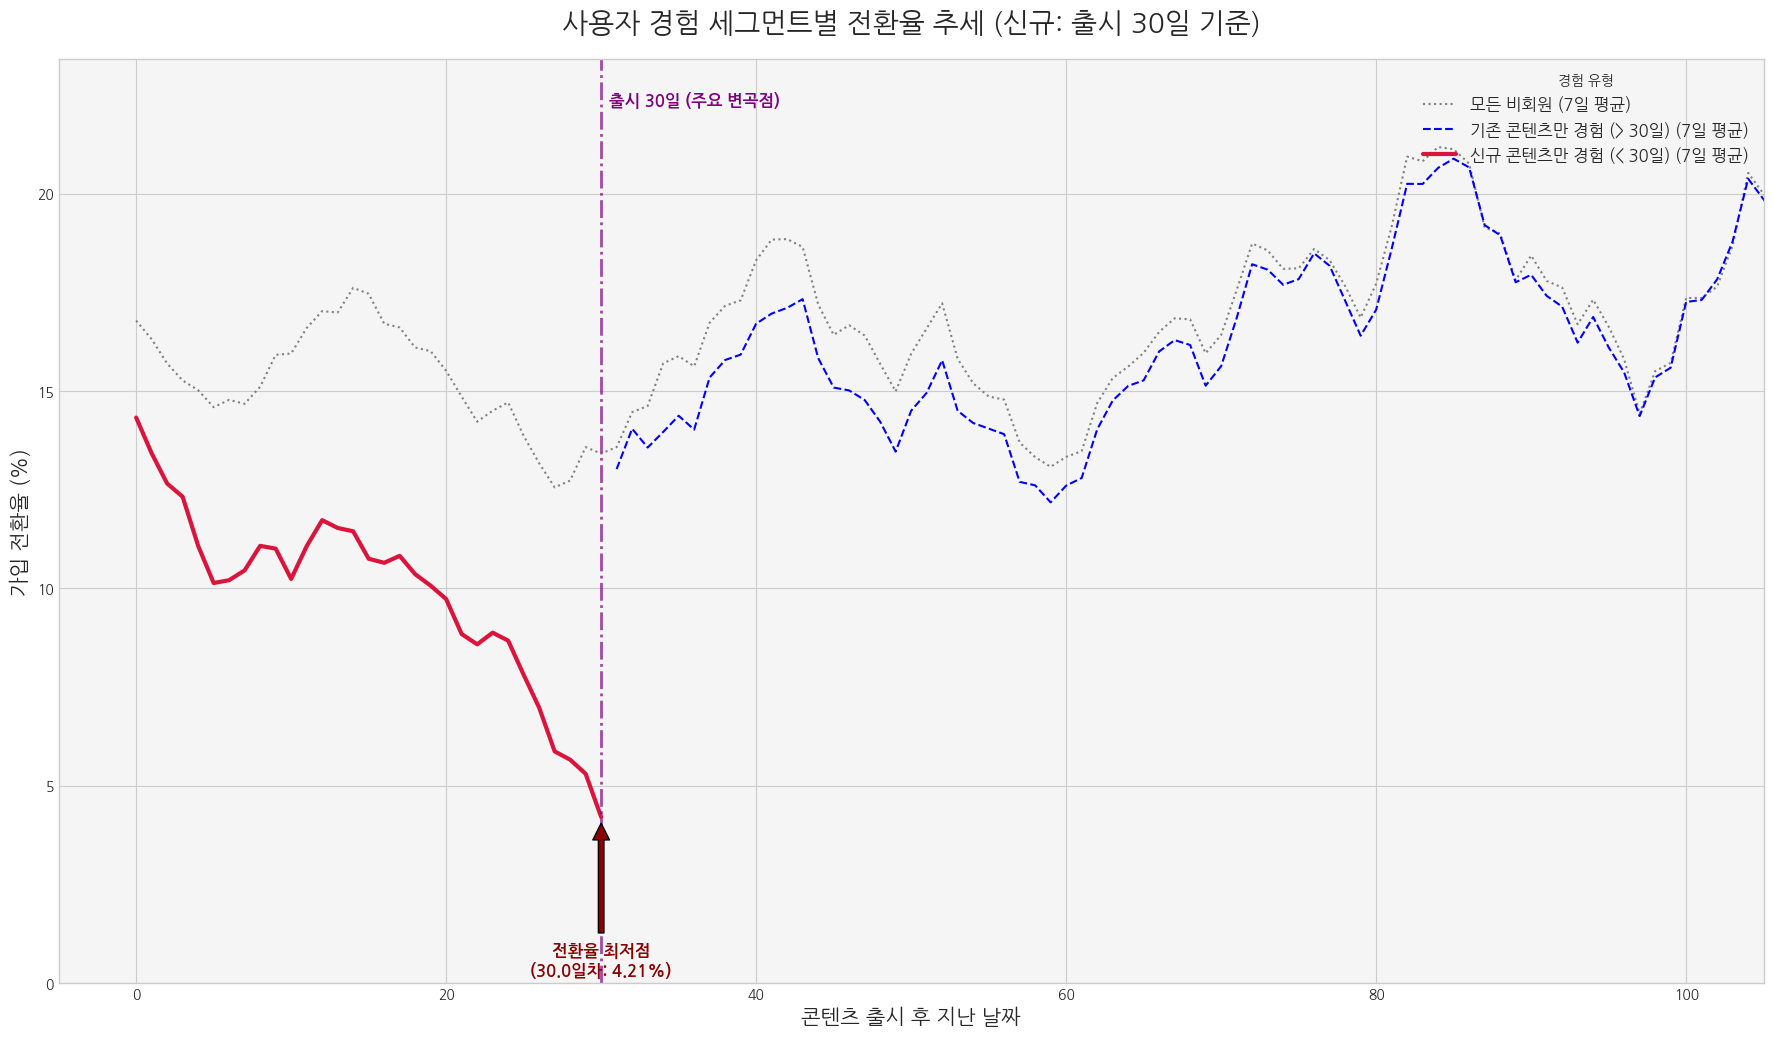

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [가정] 이전 단계에서 merged_df, signup_df, conv_all_df가 준비된 상태

# -------------------- 1단계: '순수 신규' 및 '순수 기존' 그룹 정의 (30일 기준) --------------------
print("✅ 1단계: '순수 신규(30일)' 및 '순수 기존(30일)' 그룹을 정의합니다...")

session_launch_days = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].agg(['min', 'max'])
NEW_CONTENT_DAY_THRESHOLD = 30 # 기준을 '30일'로 명확히 설정

# '순수 신규' 그룹: 경험한 모든 콘텐츠가 출시 30일 이내
pure_new_sessions = session_launch_days[session_launch_days['max'] <= NEW_CONTENT_DAY_THRESHOLD].index
pure_new_exp_df = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_new_sessions)]

# '순수 기존' 그룹: 경험한 모든 콘텐츠가 출시 30일 이후
pure_old_sessions = session_launch_days[session_launch_days['min'] > NEW_CONTENT_DAY_THRESHOLD].index
pure_old_exp_df = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_old_sessions)]


# -------------------- 2단계: 각 그룹의 일자별 전환율 계산 --------------------
print("✅ 2단계: '30일 기준' 각 그룹의 일자별 전환율을 계산합니다...")

def calculate_daily_conversion(experience_df, signup_df):
    if experience_df.empty: return pd.DataFrame(columns=['conversion_rate(%)'])
    daily_pool = experience_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    attributed = pd.merge(experience_df, signup_df[['date', 'fingerprint']].drop_duplicates(), on=['date', 'fingerprint'], how='inner')
    daily_conversions = attributed.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    conv_df = pd.concat([daily_pool.rename('total'), daily_conversions.rename('converted')], axis=1).fillna(0)
    conv_df['conversion_rate(%)'] = (conv_df['converted'] / conv_df['total'] * 100).replace([np.inf, -np.inf], 0)
    return conv_df

conv_new_30_df = calculate_daily_conversion(pure_new_exp_df, signup_df)
conv_old_30_df = calculate_daily_conversion(pure_old_exp_df, signup_df)
# conv_all_df는 이전 단계에서 계산되었다고 가정


# -------------------- 최종 시각화 (모든 오류 수정 완료) --------------------
print("✅ 최종 시각화: 모든 오류를 수정한 최종 그래프를 생성합니다...")

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(22, 12))

# [핵심 수정] 이동 평균 계산을 위한 데이터 미리 준비
# min_periods=1 옵션은 데이터가 부족한 처음 며칠도 계산하여, 선이 0일부터 시작되도록 합니다.
trend_all = conv_all_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()
trend_new = conv_new_30_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()
trend_old = conv_old_30_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()

# --- 그래프 그리기 ---
trend_all.plot(ax=ax, color='gray', linestyle=':', label='모든 비회원 (7일 평균)')
trend_old.plot(ax=ax, color='blue', linestyle='--', label=f'기존 콘텐츠만 경험 (> {NEW_CONTENT_DAY_THRESHOLD}일) (7일 평균)')
trend_new.plot(ax=ax, color='crimson', linestyle='-', linewidth=3, label=f'신규 콘텐츠만 경험 (< {NEW_CONTENT_DAY_THRESHOLD}일) (7일 평균)')


# --- 중요 지점 강조 (수정 완료) ---
# [수정] '30일' 기준 수직선 추가
ax.axvline(x=30, color='purple', linestyle='-.', linewidth=2, alpha=0.7)
ax.text(30.5, plt.ylim()[1]*0.95, '출시 30일 (주요 변곡점)', fontsize=12, color='purple', weight='bold')

# [수정] '신규 콘텐츠' 그룹의 '0~30일 사이' 최저점 찾기 및 표시
if not trend_new.empty:
    trend_new_filtered = trend_new[trend_new.index <= 30]
    if not trend_new_filtered.empty:
        lowest_point_day = trend_new_filtered.idxmin()
        lowest_point_value = trend_new_filtered.min()
        ax.annotate(f'전환율 최저점\n({lowest_point_day}일차: {lowest_point_value:.2f}%)',
                    xy=(lowest_point_day, lowest_point_value), xytext=(lowest_point_day, lowest_point_value - 4),
                    fontsize=12, color='darkred', weight='bold',
                    arrowprops=dict(facecolor='darkred', shrink=0.05), ha='center')


# --- 그래프 꾸미기 ---
ax.set_title(f'사용자 경험 세그먼트별 전환율 추세 (신규: 출시 {NEW_CONTENT_DAY_THRESHOLD}일 기준)', fontsize=20, pad=20)
ax.set_xlabel('콘텐츠 출시 후 지난 날짜', fontsize=15)
ax.set_ylabel('가입 전환율 (%)', fontsize=15)

ax.legend(title='경험 유형', fontsize=12, loc='upper right')
ax.grid(True)
ax.set_facecolor('whitesmoke')
ax.set_xlim(-5, 105)
ax.set_ylim(bottom=0)
plt.show()

✅ 1단계: '순수 신규(60일)' 및 '순수 기존(60일)' 그룹을 정의합니다...
✅ 2단계: '60일 기준' 각 그룹의 일자별 전환율을 계산합니다...
✅ 최종 시각화: 모든 요구사항을 반영한 최종 그래프를 생성합니다...


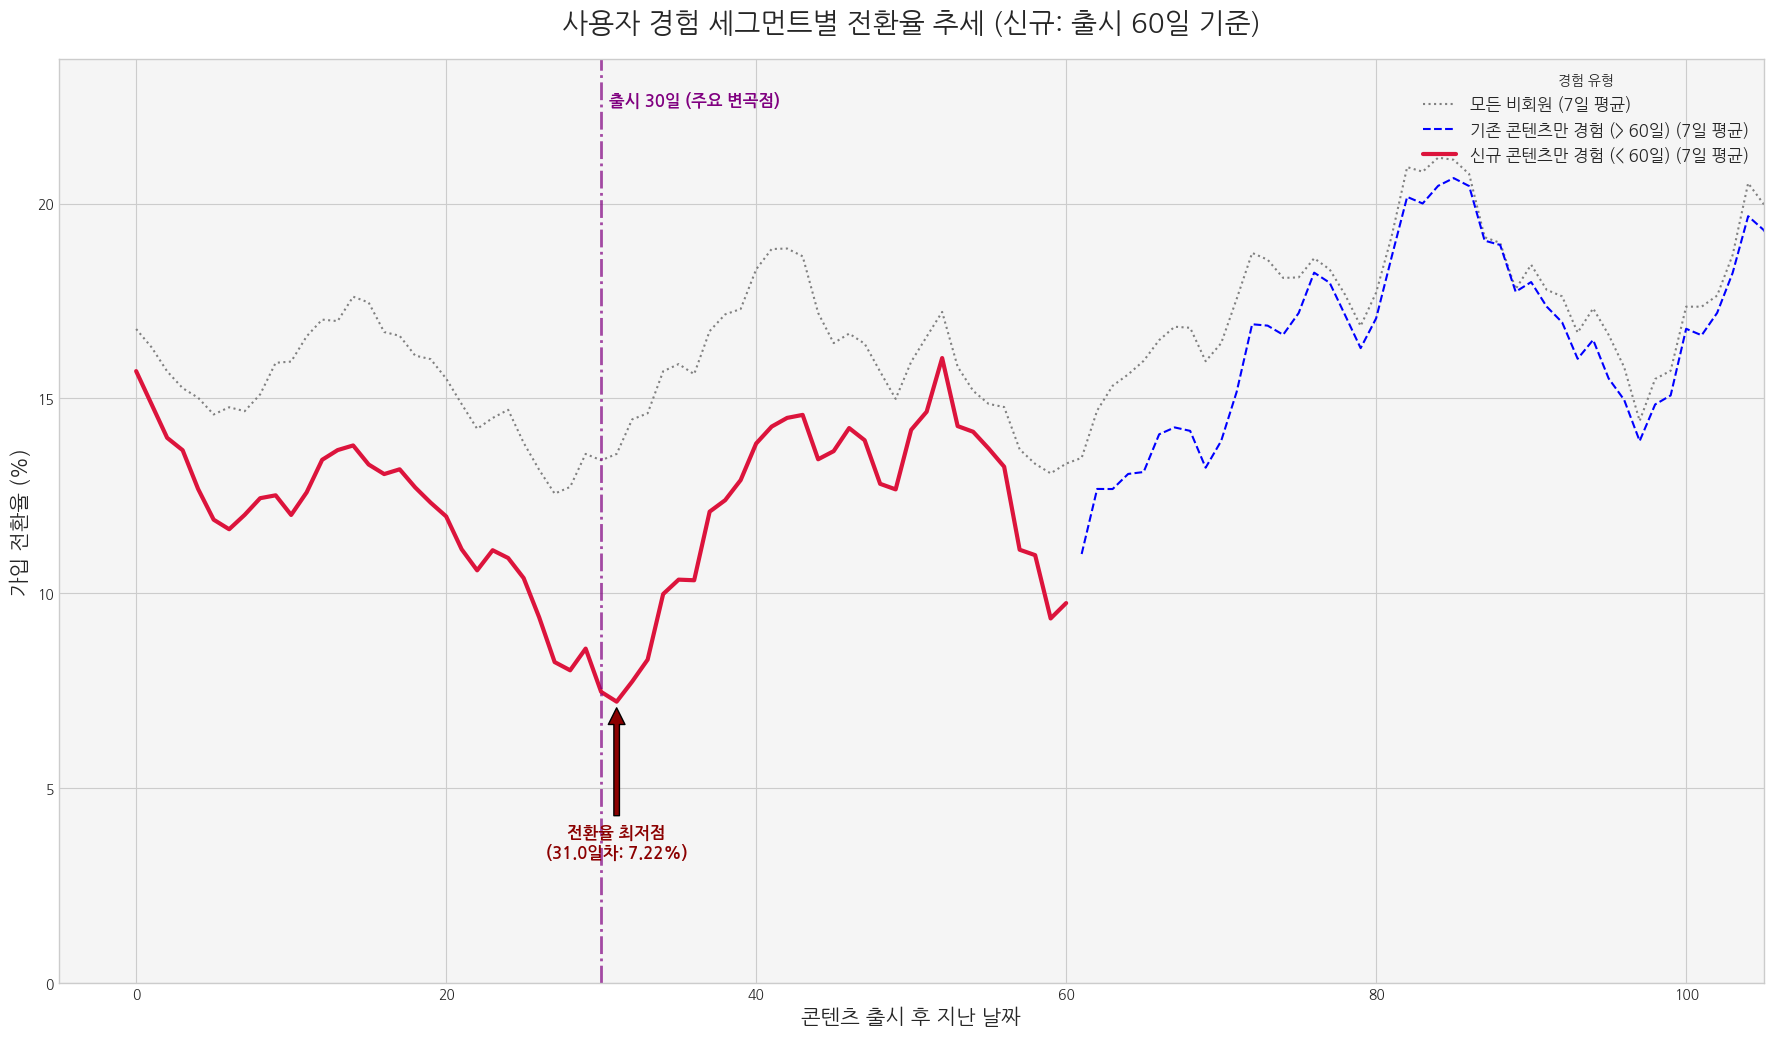

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [가정] 이전 단계에서 merged_df, signup_df, conv_all_df가 준비된 상태

# -------------------- 1단계: '순수 신규' 및 '순수 기존' 그룹 정의 (60일 기준) --------------------
print("✅ 1단계: '순수 신규(60일)' 및 '순수 기존(60일)' 그룹을 정의합니다...")

session_launch_days_3 = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].agg(['min', 'max'])
NEW_CONTENT_DAY_THRESHOLD_3 = 60 # 기준을 '60일'로 명확히 설정

pure_new_sessions_3 = session_launch_days_3[session_launch_days_3['max'] <= NEW_CONTENT_DAY_THRESHOLD_3].index
pure_new_exp_df_3 = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_new_sessions_3)]

pure_old_sessions_3 = session_launch_days_3[session_launch_days_3['min'] > NEW_CONTENT_DAY_THRESHOLD_3].index
pure_old_exp_df_3 = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_old_sessions_3)]


# -------------------- 2단계: 각 그룹의 일자별 전환율 계산 --------------------
print("✅ 2단계: '60일 기준' 각 그룹의 일자별 전환율을 계산합니다...")

def calculate_daily_conversion(experience_df, signup_df):
    if experience_df.empty: return pd.DataFrame(columns=['conversion_rate(%)'])
    daily_pool = experience_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    attributed = pd.merge(experience_df, signup_df[['date', 'fingerprint']].drop_duplicates(), on=['date', 'fingerprint'], how='inner')
    daily_conversions = attributed.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    conv_df = pd.concat([daily_pool.rename('total'), daily_conversions.rename('converted')], axis=1).fillna(0)
    conv_df['conversion_rate(%)'] = (conv_df['converted'] / conv_df['total'] * 100).replace([np.inf, -np.inf], 0)
    return conv_df

# [수정] 변수 이름에 '_3'를 붙여 '60일 기준'임을 명확히 합니다.
conv_new_60_df_3 = calculate_daily_conversion(pure_new_exp_df_3, signup_df)
conv_old_60_df_3 = calculate_daily_conversion(pure_old_exp_df_3, signup_df)
# conv_all_df는 기준과 상관없으므로 그대로 사용


# -------------------- 최종 시각화 (모든 요구사항 반영 완료) --------------------
print("✅ 최종 시각화: 모든 요구사항을 반영한 최종 그래프를 생성합니다...")

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(22, 12))

# 이동 평균 계산
trend_all = conv_all_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()
trend_new_3 = conv_new_60_df_3['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()
trend_old_3 = conv_old_60_df_3['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()

# --- 그래프 그리기 ---
trend_all.plot(ax=ax, color='gray', linestyle=':', label='모든 비회원 (7일 평균)')
trend_old_3.plot(ax=ax, color='blue', linestyle='--', label=f'기존 콘텐츠만 경험 (> {NEW_CONTENT_DAY_THRESHOLD_3}일) (7일 평균)')
trend_new_3.plot(ax=ax, color='crimson', linestyle='-', linewidth=3, label=f'신규 콘텐츠만 경험 (< {NEW_CONTENT_DAY_THRESHOLD_3}일) (7일 평균)')


# --- 중요 지점 강조 ---
ax.axvline(x=30, color='purple', linestyle='-.', linewidth=2, alpha=0.7)
ax.text(30.5, plt.ylim()[1]*0.95, '출시 30일 (주요 변곡점)', fontsize=12, color='purple', weight='bold')

if not trend_new_3.empty:
    trend_new_filtered = trend_new_3[trend_new_3.index <= 60]
    if not trend_new_filtered.empty:
        lowest_point_day = trend_new_filtered.idxmin()
        lowest_point_value = trend_new_filtered.min()
        ax.annotate(f'전환율 최저점\n({lowest_point_day}일차: {lowest_point_value:.2f}%)',
                    xy=(lowest_point_day, lowest_point_value), xytext=(lowest_point_day, lowest_point_value - 4),
                    fontsize=12, color='darkred', weight='bold',
                    arrowprops=dict(facecolor='darkred', shrink=0.05), ha='center')

# --- 그래프 꾸미기 ---
ax.set_title(f'사용자 경험 세그먼트별 전환율 추세 (신규: 출시 {NEW_CONTENT_DAY_THRESHOLD_3}일 기준)', fontsize=20, pad=20)
ax.set_xlabel('콘텐츠 출시 후 지난 날짜', fontsize=15)
ax.set_ylabel('가입 전환율 (%)', fontsize=15)
ax.legend(title='경험 유형', fontsize=12, loc='upper right')
ax.grid(True)
ax.set_facecolor('whitesmoke')
ax.set_xlim(-5, 105)
ax.set_ylim(bottom=0)
plt.show()


In [ ]:
# 1. '순수 기존' 그룹으로 필터링된 데이터(`pure_old_exp_df`)에서,
#    'days_since_launch' 컬럼의 최솟값과 최댓값을 확인합니다.
min_days = pure_old_exp_df['days_since_launch'].min()
max_days = pure_old_exp_df['days_since_launch'].max()

print(f"--- '순수 기존(>60일)' 그룹 데이터 검증 ---")
print(f"이 그룹에 포함된 활동들의 '콘텐츠 나이' 범위: {min_days}일 ~ {max_days}일")

# 2. 검증
if min_days > 60:
    print("\n✅ 검증 성공: 이 그룹의 모든 활동은 60일이 지난 콘텐츠에서 발생했습니다. (예상대로)")
else:
    print(f"\n❌ 검증 실패: 논리적 오류 발견! 이 그룹에 {min_days}일 된 콘텐츠 활동이 포함되어 있습니다.")
    print("   - '순수 기존 그룹'을 정의하거나 필터링하는 코드에 오류가 있을 가능성이 높습니다.")

--- '순수 기존(>60일)' 그룹 데이터 검증 ---
이 그룹에 포함된 활동들의 '콘텐츠 나이' 범위: 61.0일 ~ 759.0일

✅ 검증 성공: 이 그룹의 모든 활동은 60일이 지난 콘텐츠에서 발생했습니다. (예상대로)


1. 강력하지만 짧은 '초기 부스트' 효과 (빨간색 선, 0~30일)
* "Pure" New Content Only (<60 days) 그룹(빨간색 선)은 출시 직후 약 16%에 가까운 높은 전환율로 시작하지만, 출시 후 약 30일이 지나면 급격히 하락하여 최저점을 찍습니다.
* [해석] 이는 '신선도 효과'가 매우 강력하지만, 그 유효 기간이 생각보다 짧다는 것을 다시 한번 확인시켜 줍니다. 특히 첫 한 달이 지나면 그 효과는 거의 사라지거나 오히려 역효과가 나는 것처럼 보입니다.
2. '성숙기'에 접어든 콘텐츠의 재발견 (빨간색 선, 30에서 55일)
* 30일 지점에서 최저점을 찍었던 빨간색 선이 **다시 상승하여 45~50일 사이에 두 번째 피크(peak)**를 만든다는 점입니다.
* 콘텐츠가 출시된 지 한 달이 지나면 '신선도' 효과는 사라지지만, 그 이후에는 검색 엔진에 노출(SEO)되거나, 사용자들 사이에 입소문이 나면서 새로운 가치를 얻게 되는 **'성숙기'**에 접어든다고 해석할 수 있습니다. 이 시기에는 콘텐츠의 '새로움'이 아니라 '유용성'이나 '깊이'가 전환을 유도하는 핵심 요인이 됩니다.
3. '스테디셀러'의 힘과 예측 가능한 패턴 (파란색 선)
* "Pure" Existing Content Only (>60 days) 그룹(파란색 선)은 60일 이후에 등장하며, 매우 높은 전환율(18~20%)을 기록합니다.
* [해석] 출시 후 두 달이 지난 '완전히 검증된' 콘텐츠들은 우리 서비스의 가장 강력한 자산입니다. 이 콘텐츠들은 꾸준히 높은 가치를 제공하며, 가장 확실한 잠재고객들을 끌어모으고 있습니다. 또한, 이 파란색 선의 패턴은 회색 선(전체 평균)의 패턴과 매우 유사하게 움직이는데, 이는 우리 서비스의 전반적인 전환율이 사실상 이 '기존 스테디셀러' 콘텐츠들의 성과에 의해 좌우된다는 것을 의미합니다.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


# -------------------- 1단계: '순수 신규' 및 '순수 기존' 그룹 정의 --------------------
print("✅ 1단계: '순수 신규(30일)' 및 '순수 기존(30일)' 그룹을 정의합니다...")

# 각 세션별 경험한 콘텐츠의 최대/최소 'days_since_launch' 값을 계산합니다.
session_launch_days = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].agg(['min', 'max'])

# '신규'의 기준을 30일로 설정합니다.
NEW_CONTENT_DAY_THRESHOLD = 30

# '순수 신규 경험' 세션: 경험한 모든 콘텐츠가 출시 30일 이내 (max <= 30)
pure_new_sessions = set(session_launch_days[session_launch_days['max'] <= NEW_CONTENT_DAY_THRESHOLD].index)

# '순수 기존 경험' 세션: 경험한 모든 콘텐츠가 출시 30일 이후 (min > 30)
pure_old_sessions = set(session_launch_days[session_launch_days['min'] > NEW_CONTENT_DAY_THRESHOLD].index)

print(f"  - '순수 신규({NEW_CONTENT_DAY_THRESHOLD}일 이내)' 경험 세션 수: {len(pure_new_sessions):,}")
print(f"  - '순수 기존(>{NEW_CONTENT_DAY_THRESHOLD}일)' 경험 세션 수: {len(pure_old_sessions):,}")


# -------------------- 2단계: 각 그룹별 '가입 전환 세션' 수 계산 --------------------
print("\n✅ 2단계: 각 그룹의 '가입 전환 세션' 수를 계산합니다...")

# 전체 가입 전환 세션 목록을 미리 만들어 둡니다.
all_converted_sessions = set(map(tuple, signup_df[['date', 'fingerprint']].drop_duplicates().values))

# 각 그룹과 전체 가입 전환 세션의 교집합을 구합니다.
conversions_pure_new = len(pure_new_sessions.intersection(all_converted_sessions))
conversions_pure_old = len(pure_old_sessions.intersection(all_converted_sessions))

print(f"  - '순수 신규' 그룹 가입 전환 수: {conversions_pure_new:,}")
print(f"  - '순수 기존' 그룹 가입 전환 수: {conversions_pure_old:,}")


# -------------------- 3단계: 그룹별 전환율 계산 --------------------
print("\n✅ 3단계: 각 그룹의 '가입 전환율'을 계산합니다...")

# 각 그룹의 전체 모수(분모)
total_pure_new = len(pure_new_sessions)
total_pure_old = len(pure_old_sessions)

# 전환율 계산
conv_rate_pure_new = (conversions_pure_new / total_pure_new * 100) if total_pure_new > 0 else 0
conv_rate_pure_old = (conversions_pure_old / total_pure_old * 100) if total_pure_old > 0 else 0

print(f"  - '순수 신규' 그룹 전환율: {conv_rate_pure_new:.2f}%")
print(f"  - '순수 기존' 그룹 전환율: {conv_rate_pure_old:.2f}%")


# -------------------- 4단계: 카이제곱 검정을 통한 통계적 검증 --------------------
print("\n✅ 4단계: 카이제곱 검정으로 통계적 유의성을 확인합니다...")

# 각 그룹의 '비가입' 수를 계산합니다.
non_conversions_pure_new = total_pure_new - conversions_pure_new
non_conversions_pure_old = total_pure_old - conversions_pure_old

# 2x2 분할표 생성: [[신규-가입, 신규-비가입], [기존-가입, 기존-비가입]]
observed_values = [
    [conversions_pure_new, non_conversions_pure_new],
    [conversions_pure_old, non_conversions_pure_old]
]

# 카이제곱 검정 수행
chi2_statistic, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- [30일 기준] 카이제곱 검정 결과 ---")
print(f"카이제곱 통계량: {chi2_statistic:.4f}")
print(f"p-value: {p_value:.10f}")

# p-value 해석
alpha = 0.05
print("\n--- 최종 결론 ---")
if p_value < alpha:
    print(f"✅ p-value ({p_value:.4f})가 유의수준 ({alpha})보다 작으므로, 귀무가설을 기각합니다.")
    print("   결론: '순수 신규' 그룹과 '순수 기존' 그룹의 가입 전환율 차이는 통계적으로 유의미합니다.")
else:
    print(f"❌ p-value ({p_value:.4f})가 유의수준 ({alpha})보다 크거나 같으므로, 귀무가설을 기각할 수 없습니다.")
    print("   결론: 두 그룹 간의 전환율 차이가 통계적으로 유의미하다고 말할 수 없습니다.")

✅ 1단계: '순수 신규(30일)' 및 '순수 기존(30일)' 그룹을 정의합니다...
  - '순수 신규(30일 이내)' 경험 세션 수: 2,558
  - '순수 기존(>30일)' 경험 세션 수: 84,524

✅ 2단계: 각 그룹의 '가입 전환 세션' 수를 계산합니다...
  - '순수 신규' 그룹 가입 전환 수: 208
  - '순수 기존' 그룹 가입 전환 수: 5,745

✅ 3단계: 각 그룹의 '가입 전환율'을 계산합니다...
  - '순수 신규' 그룹 전환율: 8.13%
  - '순수 기존' 그룹 전환율: 6.80%

✅ 4단계: 카이제곱 검정으로 통계적 유의성을 확인합니다...

--- [30일 기준] 카이제곱 검정 결과 ---
카이제곱 통계량: 6.7345
p-value: 0.0094566197

--- 최종 결론 ---
✅ p-value (0.0095)가 유의수준 (0.05)보다 작으므로, 귀무가설을 기각합니다.
   결론: '순수 신규' 그룹과 '순수 기존' 그룹의 가입 전환율 차이는 통계적으로 유의미합니다.


✅ 1단계: 시계열 분석을 위한 데이터프레임 준비 완료.
--- 준비된 데이터 샘플 ---
                                               content_id
first_seen_time                                          
2022-01-07 10:28:06.021  03b4a290c08f7fa83933827a994f2e61
2023-11-19 13:57:30.052  040ccaa97a52e006a2c94bb7c5dce263
2023-12-06 02:41:57.737  079110dd9526425ed3cb7d5c3535707a
2023-11-24 04:28:11.912  07b0a0433178c5eecd11bcae017e5133
2022-11-06 11:11:13.176  0ab2b890d4068c1490b89676773256f6

✅ 2단계: 월별 신규 콘텐츠 등장 횟수 집계 완료.
--- 월별 집계 결과 (상위 5개) ---
                 new_content_count
first_seen_time                   
2021-12-31                       2
2022-01-31                      67
2022-02-28                       2
2022-03-31                       1
2022-04-30                       1
✅ 3단계: 상관 관계 분석을 위한 데이터를 준비합니다...
✅ 4단계: 상관 계수를 계산합니다...


  [상관 관계 분석 결과]
월별 신규 콘텐츠 수와 가입자 수의 상관 계수: 0.2584

✅ 5단계: 결과를 해석하고 시각화합니다...
해석: 약한 양의 상관관계가 있습니다.

[중요] 이는 '신규 콘텐츠가 많이 출시된 달에 가입자 수도 증가하는 경향이 있다'는 것을 통계적으로 뒷받침합니다.
      단, '상관관계가 인과

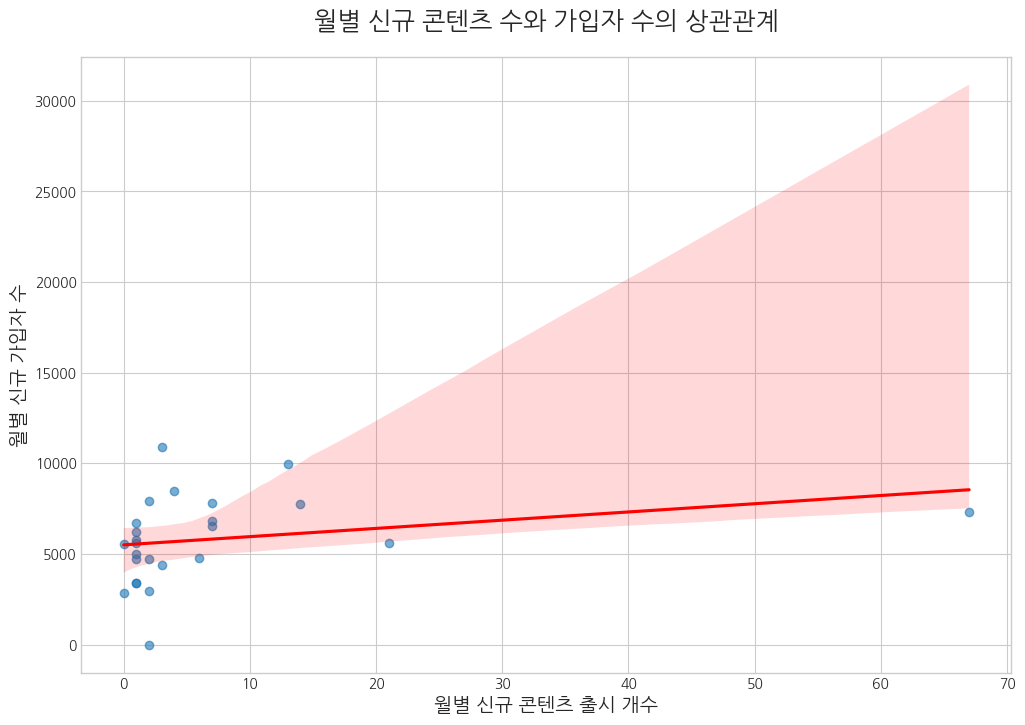

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시간 시리즈 만들기

time_series_df = null_id_first_seen_series.reset_index()
time_series_df.columns = ['content_id', 'first_seen_time']

# 'first_seen_time' 컬럼을 데이터프레임의 인덱스로 설정합니다.
time_series_df.set_index('first_seen_time', inplace=True)

print("✅ 1단계: 시계열 분석을 위한 데이터프레임 준비 완료.")
print("--- 준비된 데이터 샘플 ---")
print(time_series_df.head())


# -------------------- 2단계: 월별 신규 콘텐츠 등장 횟수 집계 --------------------
# .resample('M') : 데이터를 '월말(Month-End)' 기준으로 그룹화합니다.
# .count() : 각 월별 그룹에 속한 데이터(콘텐츠)의 개수를 셉니다.
monthly_new_content_counts = time_series_df.resample('M').count()

# 컬럼 이름을 더 명확하게 변경합니다.
monthly_new_content_counts.rename(columns={'content_id': 'new_content_count'}, inplace=True)

print("\n✅ 2단계: 월별 신규 콘텐츠 등장 횟수 집계 완료.")
print("--- 월별 집계 결과 (상위 5개) ---")
print(monthly_new_content_counts.head())


print("✅ 3단계: 상관 관계 분석을 위한 데이터를 준비합니다...")

# 월별 회원가입자 수 집계 (이전과 동일)
monthly_signups = complete_signup_df.set_index('client_event_time').resample('M')['user_id'].nunique()
monthly_signups_df = monthly_signups.to_frame(name='signup_count')

# [중요] 두 데이터의 월별 인덱스를 정확히 맞추어 줍니다.
combined_index = monthly_new_content_counts.index.union(monthly_signups_df.index)
df1 = monthly_new_content_counts.reindex(combined_index, fill_value=0)
df2 = monthly_signups_df.reindex(combined_index, fill_value=0)


# -------------------- 4단계: 상관 계수 계산 --------------------
print("✅ 4단계: 상관 계수를 계산합니다...")

# df1의 'new_content_count' 컬럼과 df2의 'signup_count' 컬럼 간의 상관관계를 계산합니다.
correlation = df1['new_content_count'].corr(df2['signup_count'])

print("\n\n=======================================================")
print("  [상관 관계 분석 결과]")
print("=======================================================")
print(f"월별 신규 콘텐츠 수와 가입자 수의 상관 계수: {correlation:.4f}")


# -------------------- 5단계: 상관 관계 해석 및 시각화 --------------------
print("\n✅ 5단계: 결과를 해석하고 시각화합니다...")

# 상관 계수 해석 가이드
if correlation > 0.7:
    interpretation = "매우 강한 양의 상관관계가 있습니다."
elif correlation > 0.4:
    interpretation = "뚜렷한 양의 상관관계가 있습니다."
elif correlation > 0.2:
    interpretation = "약한 양의 상관관계가 있습니다."
elif correlation < -0.4:
    interpretation = "뚜렷한 음의 상관관계가 있습니다."
else:
    interpretation = "상관관계가 거의 없거나 매우 약합니다."

print(f"해석: {interpretation}")
print("\n[중요] 이는 '신규 콘텐츠가 많이 출시된 달에 가입자 수도 증가하는 경향이 있다'는 것을 통계적으로 뒷받침합니다.")
print("      단, '상관관계가 인과관계를 의미하지는 않는다'는 점을 항상 유의해야 합니다.")


# 시각화: 산점도(Scatter Plot)와 추세선
# 두 데이터를 하나의 데이터프레임으로 합쳐서 시각화하면 편리합니다.
correlation_plot_df = pd.concat([df1['new_content_count'], df2['signup_count']], axis=1)

plt.figure(figsize=(12, 8))
# regplot은 산점도와 함께 회귀선(추세선)을 그려주어 관계를 파악하기 좋습니다.
sns.regplot(
    data=correlation_plot_df,
    x='new_content_count',
    y='signup_count',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

plt.title('월별 신규 콘텐츠 수와 가입자 수의 상관관계', fontsize=18, pad=20)
plt.xlabel('월별 신규 콘텐츠 출시 개수', fontsize=14)
plt.ylabel('월별 신규 가입자 수', fontsize=14)
plt.grid(True)
plt.show()

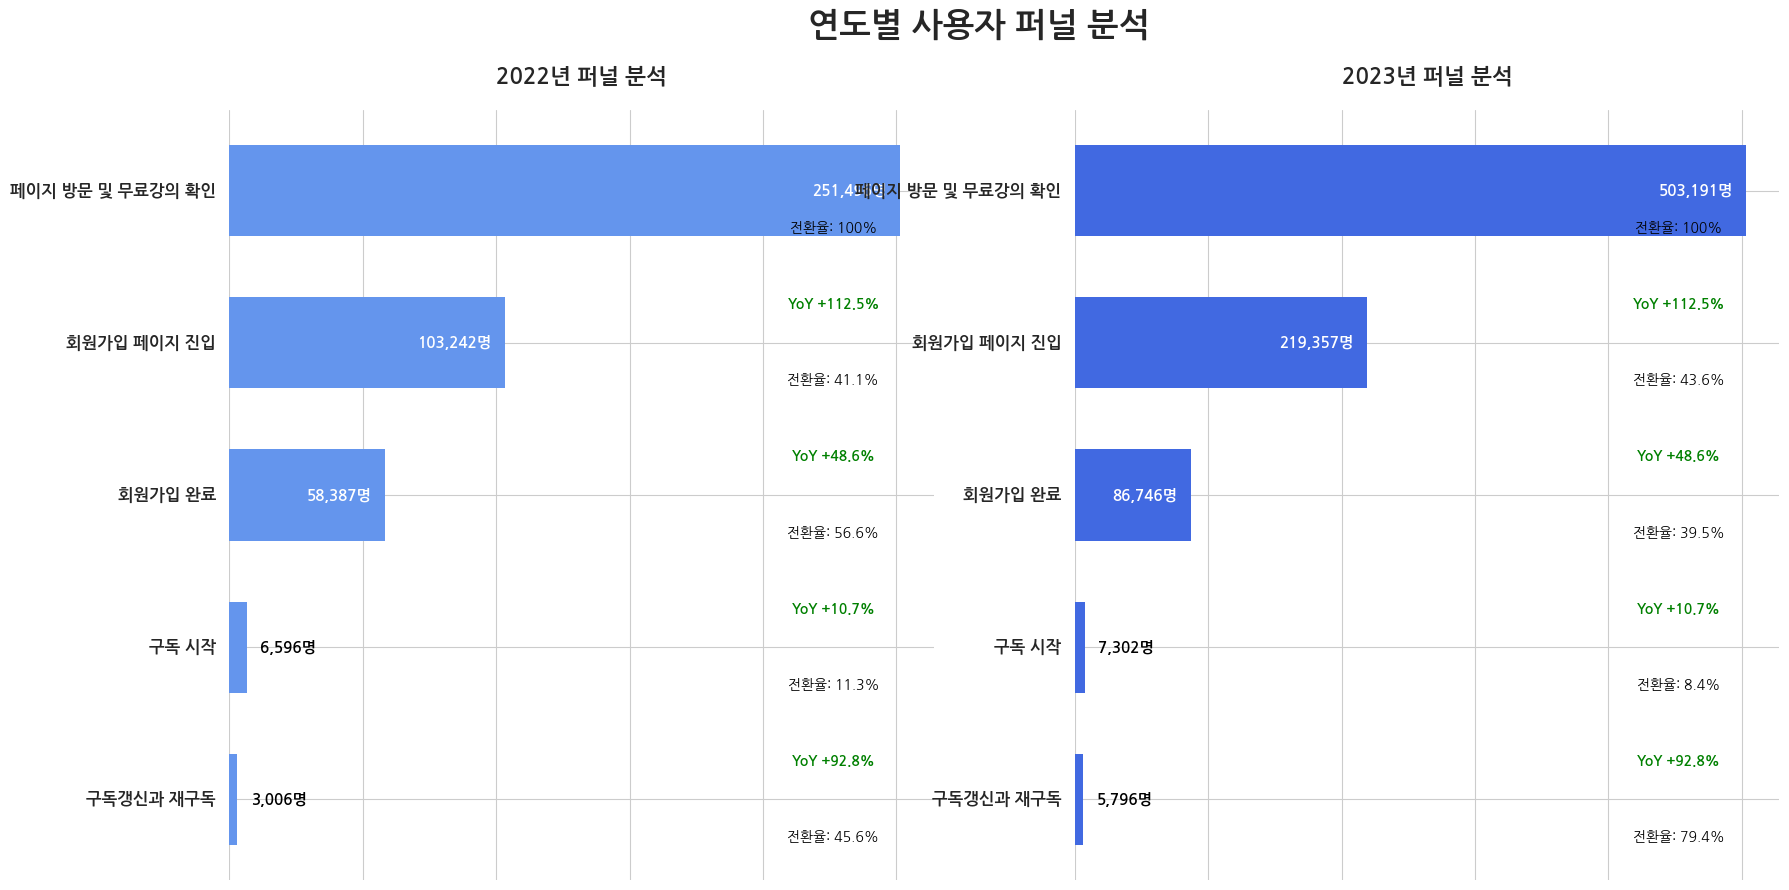

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# . 폰트 설정
plt.rc('font', family='NanumGothic')

#  마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# -------------------- 1단계: 데이터 준비 및 지표 계산 --------------------
# 기존에 직접 입력한 데이터를 사용합니다.
data = {
    '단계': ['페이지 방문 및 무료강의 확인', '회원가입 페이지 진입', '회원가입 완료', '구독 시작', '구독갱신과 재구독'],
    '2022년': [251496, 103242, 58387, 6596, 3006],
    '2023년': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('단계')

# [추가] 연간 성장률(YoY) 계산
df['YoY_성장률(%)'] = (df['2023년'] - df['2022년']) / df['2022년'] * 100

# [추가] 단계별 전환율 계산
df['2022_전환율(%)'] = (df['2022년'] / df['2022년'].shift(1) * 100).fillna(100)
df['2023_전환율(%)'] = (df['2023년'] / df['2023년'].shift(1) * 100).fillna(100)


# -------------------- 2단계: 시각화 함수 정의 --------------------
def plot_funnel_with_annotations(ax, year, data, yoy_data, conversion_data, color):
    """지정된 축(ax)에 퍼널 차트와 주석을 그리는 함수"""
    y_pos = np.arange(len(data))
    max_val = data.iloc[0]

    ax.barh(y_pos, data, color=color, height=0.6, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels('')
    ax.invert_yaxis()

    # 테두리와 눈금 제거
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i, (stage, value) in enumerate(data.items()):
        # 단계 이름
        ax.text(-max_val * 0.02, i, stage, ha='right', va='center', fontsize=12, weight='bold')

        # --- [핵심 수정 부분] ---
        # 막대의 너비가 전체의 15%보다 좁은지 확인
        if value < max_val * 0.15:
            # 막대가 좁을 경우: 텍스트를 막대 바깥쪽 오른편에 표시
            ax.text(value + (max_val * 0.02), i, f'{value:,}명', ha='left', va='center', color='black', fontsize=11, weight='bold')
        else:
            # 막대가 충분히 넓을 경우: 텍스트를 막대 안쪽 왼편에 표시
            ax.text(value - (max_val * 0.02), i, f'{value:,}명', ha='right', va='center', color='white', fontsize=11, weight='bold')
        # 연간 성장률 (첫 단계 제외)
        if i > 0:
            growth = yoy_data.iloc[i]
            growth_text = f'YoY {growth:+.1f}%'
            growth_color = 'green' if growth > 0 else 'red'
            ax.text(max_val * 0.9, i-0.25, growth_text, ha='center', va='center', color=growth_color, fontsize=10, weight='bold')

        # 단계별 전환율
        conv_rate = conversion_data.iloc[i]
        conv_text = f'전환율: {conv_rate:.1f}%'
        if i == 0: conv_text = '전환율: 100%'
        ax.text(max_val * 0.9, i+0.25, conv_text, ha='center', va='center', color='black', fontsize=10, style='italic')

    ax.set_title(f"{year}년 퍼널 분석", fontsize=16, weight='bold', pad=20)


# -------------------- 3단계: 최종 리포트 시각화 --------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('연도별 사용자 퍼널 분석', fontsize=24, weight='bold')

# 각 연도별 퍼널 그리기
plot_funnel_with_annotations(ax1, 2022, df['2022년'], df['YoY_성장률(%)'], df['2022_전환율(%)'], 'cornflowerblue')
plot_funnel_with_annotations(ax2, 2023, df['2023년'], df['YoY_성장률(%)'], df['2023_전환율(%)'], 'royalblue')

plt.show()

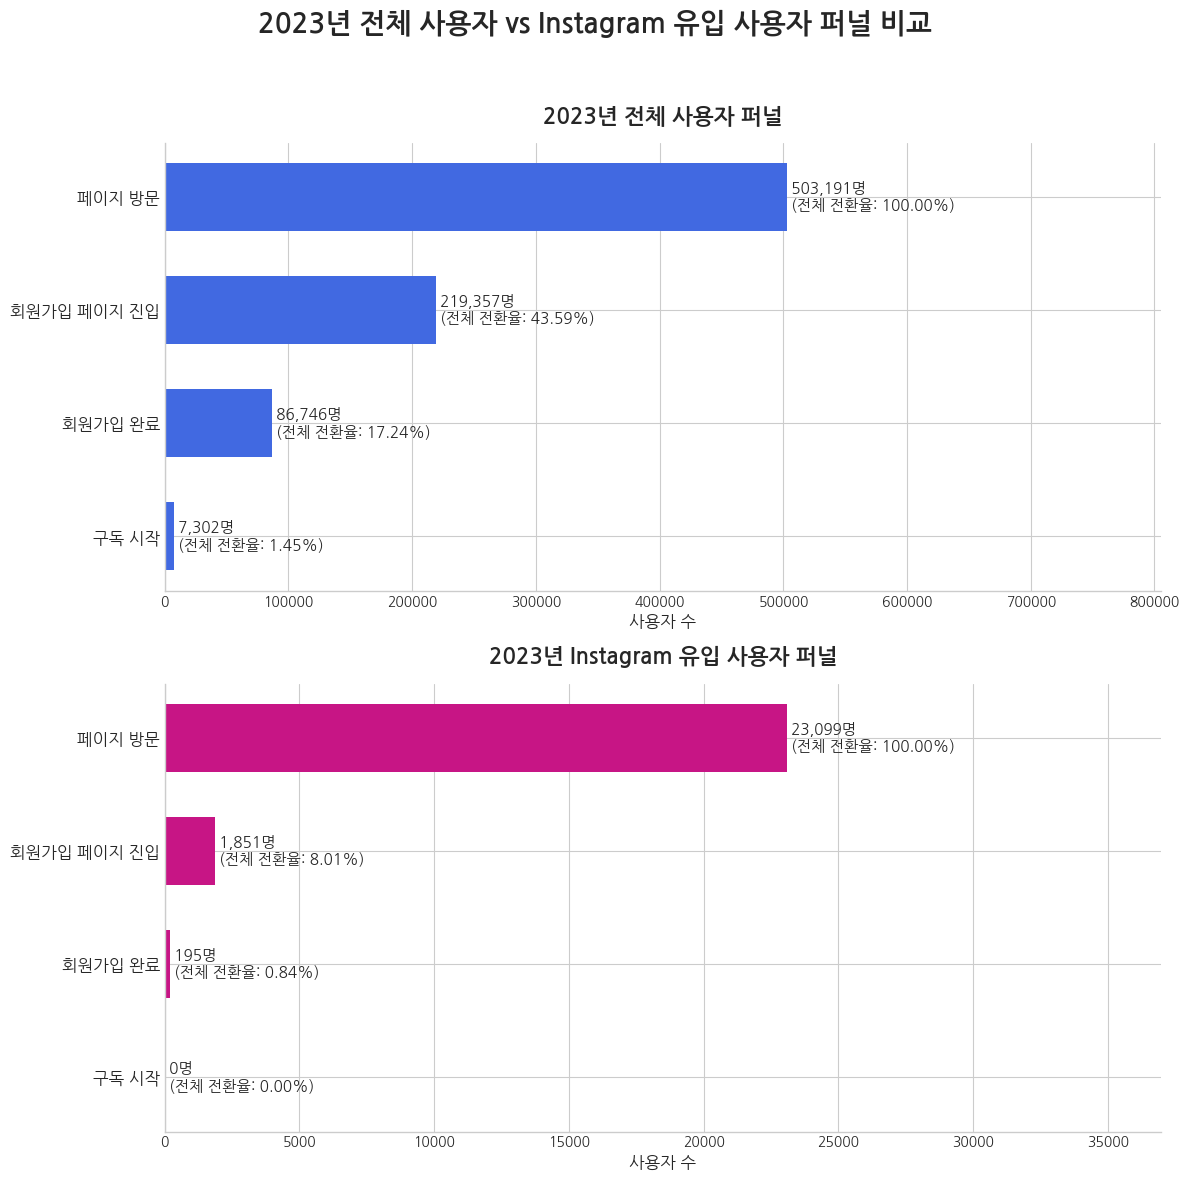

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- 1단계: 비교할 두 그룹의 데이터 준비 --------------------
# 2023년 전체 사용자 퍼널 데이터
total_2023_data = pd.Series(
    [503191, 219357, 86746, 7302],
    index=['페이지 방문', '회원가입 페이지 진입', '회원가입 완료', '구독 시작']
)

# 2023년 인스타그램 유입 사용자 퍼널 데이터
insta_2023_data = pd.Series(
    [23099, 1851, 195, 0],
    index=['페이지 방문', '회원가입 페이지 진입', '회원가입 완료', '구독 시작']
)


# -------------------- 2단계: 퍼널 차트를 그리는 재사용 함수 정의 --------------------
def plot_comparison_funnel(ax, title, data, color):
    """지정된 축(ax)에 퍼널 차트와 주석(사용자 수, 전체 전환율)을 그리는 함수"""

    y_pos = np.arange(len(data))

    # 수평 막대그래프로 퍼널의 몸통을 그립니다.
    ax.barh(y_pos, data.values, color=color, height=0.6, align='center')

    # y축 설정: 단계 이름을 표시하고, 위에서 아래로 가도록 축을 뒤집습니다.
    ax.set_yticks(y_pos)
    ax.set_yticklabels(data.index, fontsize=12)
    ax.invert_yaxis()

    # x축 설정: 라벨을 추가하고, 불필요한 테두리를 제거합니다.
    ax.set_xlabel('사용자 수', fontsize=12)
    ax.spines[['top', 'right']].set_visible(False)

    # 차트 제목 설정
    ax.set_title(title, fontsize=16, weight='bold', pad=15)

    # 막대 옆에 값과 '전체 전환율' 표시
    for i, value in enumerate(data.values):
        # 첫 단계 대비 전체 전환율 계산
        total_conversion_rate = (value / data.values[0]) * 100 if data.values[0] > 0 else 0

        # 표시할 텍스트
        text = f' {value:,}명\n (전체 전환율: {total_conversion_rate:.2f}%)'

        # 텍스트를 막대 오른쪽 끝에 위치시킴
        ax.text(value, i, text, va='center', ha='left', fontsize=11)

    # 텍스트가 잘리지 않도록 x축 범위를 넉넉하게 설정
    ax.set_xlim(0, data.max() * 1.6)


# -------------------- 3단계: 최종 비교 차트 시각화 --------------------
# 한글 폰트 설정
plt.rc('font', family='NanumGothic') # Colab 환경 기준
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 2개의 그래프를 위아래로 배치하기 위해 2행 1열의 캔버스를 만듭니다.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('2023년 전체 사용자 vs Instagram 유입 사용자 퍼널 비교', fontsize=20, weight='bold')

# 첫 번째 도화지(ax1)에 전체 사용자 퍼널 그리기
plot_comparison_funnel(ax1, '2023년 전체 사용자 퍼널', total_2023_data, 'royalblue')

# 두 번째 도화지(ax2)에 인스타그램 유입 사용자 퍼널 그리기
plot_comparison_funnel(ax2, '2023년 Instagram 유입 사용자 퍼널', insta_2023_data, 'mediumvioletred')

# 그래프 간의 간격과 전체 레이아웃을 보기 좋게 조정합니다.
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
click_review_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/click.content_page_more_review_button.csv', parse_dates=['client_event_time'])
click_review_df.info()
click_review_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               93792 non-null  object        
 1   client_event_time  93962 non-null  datetime64[ns]
 2   country            93944 non-null  object        
 3   device_carrier     0 non-null      float64       
 4   device_family      93962 non-null  object        
 5   device_type        93909 non-null  object        
 6   event_type         93962 non-null  object        
 7   language           93962 non-null  object        
 8   os_name            93962 non-null  object        
 9   os_version         93959 non-null  object        
 10  platform           93962 non-null  object        
 11  user_id            10702 non-null  object        
 12  content.id         93938 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 9.

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Seo-gu,2023-04-10 14:10:01.402,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417,United Kingdom,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524
3,Seoul,2023-01-31 14:30:36.568,South Korea,NaN,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0
4,Seoul,2023-02-12 03:24:32.337,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,74b66b738185ffdbec960db4a0da330a,101e1d0dcc38d9c86156f008a145083e
5,Seo-gu,2023-01-23 08:11:46.833,South Korea,NaN,Apple iPad,Apple iPad,click.content_page_more_review_button,Korean,Chrome,109.0.5414.83,Web,fb1ffc5625e730870f4e65fceda4cfcf,5cea8d6e02eb18b2660f98f424867e4d
6,Seoul,2023-02-02 05:52:39.884,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,NaN,e543c38ec7fa6bcd5045049ecc31e5f8
7,Anyang-si,2023-05-05 13:08:17.454,South Korea,NaN,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,18d3fd6795dcb6b2b38bd0fa326a7dc0,f491517f4737a60d661cd1fcacc702c0
8,Namyangju,2023-04-11 12:41:15.468,South Korea,NaN,Samsung Galaxy Note,Samsung Galaxy Note 8,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,NaN,220ce7873b8895d0c81c37600b5bd1e7
9,Dongjak-gu,2023-04-12 05:18:01.321,South Korea,NaN,Mac,Mac,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,c3a2ce9e89f70c9c6ebbd27c8a0f5590,4641438a6c81ef572d997dbdc9100f8b


In [ ]:
start_content_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/start.content.csv', parse_dates=['client_event_time'])
start_content_df.info()
start_content_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_carrier      0 non-null       float64       
 4   device_family       122690 non-null  object        
 5   device_type         120068 non-null  object        
 6   event_type          124917 non-null  object        
 7   language            122692 non-null  object        
 8   os_name             122671 non-null  object        
 9   os_version          122585 non-null  object        
 10  platform            122692 non-null  object        
 11  user_id             124917 non-null  object        
 12  content.id          124917 non-null  object        
 13  content.difficulty  124917 no

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,content.difficulty
0,Daejeon,2023-04-05 21:14:39.906,South Korea,NaN,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674,South Korea,NaN,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585,South Korea,NaN,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040,Canada,NaN,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467,South Korea,NaN,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced
5,Yongin-si,2023-04-10 14:07:01.134,South Korea,NaN,Windows,Windows,start.content,Korean,Chrome,112.0.0.0,Web,649e32570ee5349aa8868024aeabb54f,61b6463287573f00de13a930805a52d6,beginner
6,Siheung-si,2023-04-10 14:08:42.539,South Korea,NaN,Windows,Windows,start.content,Korean,Whale,3.19.166.16,Web,add7a1651936dad3a139decfe8954fba,c269eb6df3a374b464f7c18f12fa398f,advanced
7,Seoul,2023-04-10 14:44:31.128,South Korea,NaN,Mac,Mac,start.content,English,Firefox,111.0,Web,00dae4b5b145ebb67aab108a2e8bdab1,7de35a9d8f14c68e5f2a8788dda5f72e,advanced
8,Yongin-si,2023-04-10 14:00:11.027,South Korea,NaN,Samsung Phone,Samsung Galaxy S21 5G,start.content,Korean,Samsung Browser,20.0,Web,810122e078c4b16d7ddb321c73c32a4c,4641438a6c81ef572d997dbdc9100f8b,intermediate
9,Buk-gu,2023-04-10 14:02:34.712,South Korea,NaN,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,879687a97f0f3048ea13b68c1f455712,165def8885b8a2ec0c92404048d7e345,intermediate


In [ ]:
content_id_map_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/content_id_map.csv',  encoding='euc-kr')
content_id_map_df.info()
content_id_map_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   topic.name             143 non-null    object 
 1   total_execution_count  143 non-null    float64
 2   content.id             151 non-null    object 
 3   event_count            151 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB


,topic.name,total_execution_count,content.id,event_count
0,프로그래밍 시작하기 in Python,24986.0,f4be1a0fe0e301b03115591777fddf29,25051
1,프로그래밍 오버뷰,15187.0,61b6463287573f00de13a930805a52d6,15234
2,프로그래밍 핵심 개념 in Python,6600.0,f491517f4737a60d661cd1fcacc702c0,5617
3,프로그래밍 시작하기 in JavaScript,5557.0,68a3658f1b936bfff3bd6960cd561b0a,5571
4,웹 퍼블리싱 시작하기,4692.0,445fac33232adcb3d1cdab7d8a579430,4717
5,프로그래밍과 데이터 in Python,4132.0,595cb4bbfc83e683b0314ca1312cfbde,4145
6,SQL로 하는 데이터 분석,3440.0,c269eb6df3a374b464f7c18f12fa398f,3451
7,파이썬 응용하기,2981.0,b314d5aba64a0aab40602cb72a4a1504,2980
8,프로그래밍 핵심 개념 in JavaScript,2679.0,d6227ba76134f6cf821bb98b5f235bd0,2442
9,데이터 사이언스 시작하기,2440.0,db1819d3a7a4c4d85dccb3b9e982fbcd,2414


In [ ]:
import pandas as pd

# [가정] content_id_map_df 라는 데이터프레임이 Colab 메모리에 로드되어 있는 상태
# content_id_map_df = pd.read_csv(...)

# 1. 저장할 엑셀 파일의 경로와 이름을 정합니다.
#    파일은 당신의 구글 드라이브 '내 드라이브' 바로 아래에 저장됩니다.
#    특정 폴더에 저장하고 싶다면 경로를 수정하세요. (예: '/content/drive/MyDrive/my_folder/output.xlsx')
excel_file_path = '/content/drive/MyDrive/content_id_map.xlsx'

# 2. .to_excel() 함수를 사용하여 데이터프레임을 엑셀 파일로 저장합니다.
#    index=False 옵션은 데이터프레임의 인덱스(0, 1, 2...)가 엑셀 파일의 불필요한 첫 번째 열로 저장되는 것을 막아줍니다.
content_id_map_df.to_excel(excel_file_path, index=False)

print(f"✅ 성공! 데이터프레임이 엑셀 파일로 저장되었습니다.")
print(f"   - 저장 위치: {excel_file_path}")
print("\n구글 드라이브에서 파일을 확인해보세요!")

✅ 성공! 데이터프레임이 엑셀 파일로 저장되었습니다.
   - 저장 위치: /content/drive/MyDrive/content_id_map.xlsx

구글 드라이브에서 파일을 확인해보세요!


In [ ]:
!pip3 install requests

In [ ]:
!pip3 install selenium openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 14.8 MB/s eta 0:00:00


In [ ]:
# Colab에 필요한 시스템 패키지를 설치하고 업데이트합니다.
!apt-get update
!apt install -y chromium-chromedriver

# 필요한 Python 라이브러리를 설치합니다.
!pip install selenium

# Selenium WebDriver 설정을 위한 라이브러리 임포트
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time

# [핵심] Colab 환경을 위한 Chrome WebDriver 옵션을 명시적으로 설정합니다.
options = webdriver.ChromeOptions()
# GUI가 없는 환경에서 실행하기 위한 필수 옵션
options.add_argument('--headless')
# 샌드박스 모델 사용 안함 (Colab과 같은 Docker 환경에서 충돌 방지)
options.add_argument('--no-sandbox')
# /dev/shm 공유 메모리 사용 안함 (일부 리눅스 환경에서 크롬 충돌 방지)
options.add_argument('--disable-dev-shm-usage')
# GPU 가속 사용 안함
options.add_argument('--disable-gpu')

# WebDriver 초기화
# Colab에 기본으로 설치된 chromedriver 경로를 Service 객체로 전달합니다.
try:
    service = Service('/usr/bin/chromedriver')
    driver = webdriver.Chrome(service=service, options=options)
    print("✅ Selenium WebDriver가 성공적으로 초기화되었습니다.")

except Exception as e:
    print(f"❌ WebDriver 초기화 중 에러가 발생했습니다: {e}")
    print("   - 런타임 유형을 'T4 GPU' 또는 다른 유형으로 변경 후 다시 시도해보세요.")
    print("   - 또는, 런타임 > 런타임 초기화를 실행하고 다시 시도해보세요.")


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,574 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,853 kB]
Get:13 http://archive.ubuntu.com/ubuntu 

In [ ]:
id_info_df = pd.read_excel('/content/drive/MyDrive/codeit/Colab Notebooks/project2/content_id_map.xlsx')
id_info_df.head()

,topic.name,total_execution_count,content.id,event_count,lesson_count,studying_time(day),category 1,category2,category3,stream,note,prictice,quiz,review,review_point
0,프로그래밍 시작하기 in Python,24986.0,f4be1a0fe0e301b03115591777fddf29,25051,15.0,4.0,코딩기초,프로그래밍 언어,NaN,10.0,0.0,4.0,1.0,22768.0,99.0
1,프로그래밍 오버뷰,15187.0,61b6463287573f00de13a930805a52d6,15234,18.0,3.0,코딩기초,생성형 AI 활용,IT실무/ 비즈니스,15.0,1.0,0.0,2.0,5924.0,99.0
2,프로그래밍 핵심 개념 in Python,6600.0,f491517f4737a60d661cd1fcacc702c0,5617,46.0,4.0,코딩기초,프로그래밍 언어,NaN,21.0,6.0,15.0,4.0,10036.0,98.0
3,프로그래밍 시작하기 in JavaScript,5557.0,68a3658f1b936bfff3bd6960cd561b0a,5571,19.0,4.0,코딩기초,프로그래밍 언어,NaN,10.0,2.0,6.0,1.0,5692.0,98.0
4,웹 퍼블리싱 시작하기,4692.0,445fac33232adcb3d1cdab7d8a579430,4717,52.0,6.0,웹 개발,NaN,NaN,24.0,10.0,15.0,3.0,2579.0,99.0


In [ ]:
import pandas as pd

# [가정] id_info_df 데이터프레이임이 메모리에 로드된 상태

print("--- 수정 전 컬럼 목록 ---")
print(id_info_df.columns)

# [핵심] .rename() 메소드를 사용하여 'prictice'를 'practice'로 변경합니다.
# inplace=True 옵션은, 새로운 데이터프레이임을 만들지 않고 원본(id_info_df)을 직접 수정하라는 의미입니다.
id_info_df.rename(columns={'prictice': 'practice'}, inplace=True)

print("\n--- 수정 후 컬럼 목록 ---")
print(id_info_df.columns)

print("\n✅ 성공! 'prictice' 컬럼의 오타가 'practice'로 성공적으로 수정되었습니다.")

--- 수정 전 컬럼 목록 ---
Index(['topic.name', 'total_execution_count', 'content.id', 'event_count',
       'lesson_count', 'studying_time(day)', 'category 1', 'category2',
       'category3', 'stream', 'note', 'prictice', 'quiz', 'review',
       'review_point'],
      dtype='object')

--- 수정 후 컬럼 목록 ---
Index(['topic.name', 'total_execution_count', 'content.id', 'event_count',
       'lesson_count', 'studying_time(day)', 'category 1', 'category2',
       'category3', 'stream', 'note', 'practice', 'quiz', 'review',
       'review_point'],
      dtype='object')

✅ 성공! 'prictice' 컬럼의 오타가 'practice'로 성공적으로 수정되었습니다.


In [ ]:
import pandas as pd

difficulty_info = start_content_df[['content.id', 'content.difficulty']].drop_duplicates()

info_merged_df = pd.merge(
    merged_df,
    difficulty_info,
    on='content.id',
    how='left'
)
#==============

# [핵심] 1단계 결과물에 id_info_df를 다시 merge합니다.
final_merged_df = pd.merge(
    info_merged_df,
    id_info_df,
    on='content.id',
    how='left'
)
print("  - 모든 정보 병합 완료.")

# -------------------- 3단계: 최종 결과 확인 --------------------
print("\n\n=============================================")
print("  [최종 결과] 모든 정보가 통합된 데이터 테이블")
print("=============================================")

# info()를 통해 모든 컬럼이 잘 합쳐졌는지 확인합니다.
print(final_merged_df.info())


  - 모든 정보 병합 완료.


  [최종 결과] 모든 정보가 통합된 데이터 테이블
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710031 entries, 0 to 1710030
Data columns (total 35 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   city                      object        
 1   client_event_time         datetime64[ns]
 2   country                   object        
 3   device_carrier            float64       
 4   device_family             object        
 5   device_type               object        
 6   event_type                object        
 7   language                  object        
 8   os_name                   object        
 9   os_version                object        
 10  platform                  object        
 11  user_id                   float64       
 12  content.id                object        
 13  is_trial                  object        
 14  lesson.id                 object        
 15  is_free_trial             object        
 16  finger

✅ 1단계: 데이터를 '신규'(<=30일)와 '기존'(>30일) 그룹으로 분리합니다...
  - 신규 콘텐츠 로그 수: 41,725
  - 기존 콘텐츠 로그 수: 1,668,294

✅ 2단계: 두 그룹의 주요 지표를 비교 분석합니다...


--- [분석 1] 난이도 분포 비교 (%) ---
                    신규 콘텐츠 (<= 30일)  기존 콘텐츠 (> 30일)
content.difficulty                                 
advanced                      18.65           28.53
beginner                       6.42           15.64
hard                           6.68            3.61
intermediate                  68.26           52.22


--- [분석 2] 평균 사용자 참여도 비교 ---
                       신규 콘텐츠 (<= 30일)  기존 콘텐츠 (> 30일)  차이 (%)
event_count                     908.07         3723.95  -75.62
total_execution_count           885.56         3811.18  -76.76
review_point                     96.53           97.65   -1.14

✅ 3단계: 분석 결과를 시각화합니다...


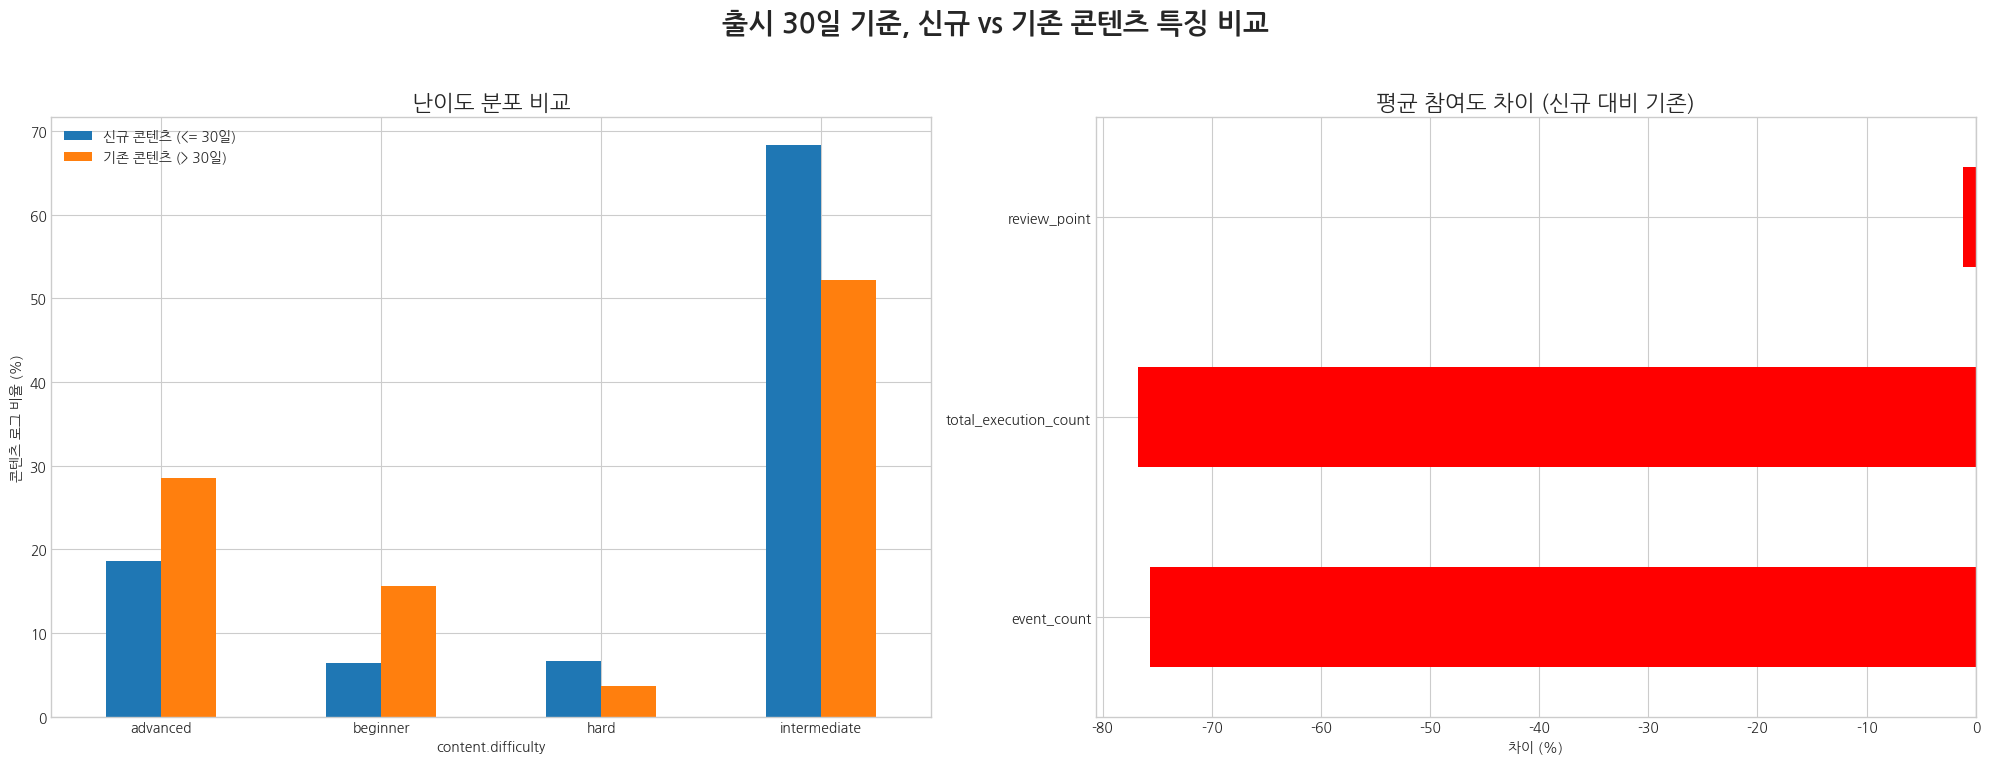

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정] 이전 단계에서 모든 정보가 통합된 'final_merged_df'가 준비된 상태

# -------------------- 1단계: '신규' 그룹과 '기존' 그룹 데이터 분리 --------------------
print("✅ 1단계: 데이터를 '신규'(<=30일)와 '기존'(>30일) 그룹으로 분리합니다...")

# '신규'의 기준을 30일로 설정합니다.
NEW_CONTENT_DAY_THRESHOLD = 30

new_content_df = final_merged_df[final_merged_df['days_since_launch'] <= NEW_CONTENT_DAY_THRESHOLD].copy()
existing_content_df = final_merged_df[final_merged_df['days_since_launch'] > NEW_CONTENT_DAY_THRESHOLD].copy()

print(f"  - 신규 콘텐츠 로그 수: {len(new_content_df):,}")
print(f"  - 기존 콘텐츠 로그 수: {len(existing_content_df):,}")


# -------------------- 2단계: 그룹별 특징 비교 분석 --------------------
print("\n✅ 2단계: 두 그룹의 주요 지표를 비교 분석합니다...")

# --- 분석 1: 난이도 분포 비교 ---
# 각 그룹별로 'content.difficulty'의 비율을 계산합니다.
new_difficulty_dist = new_content_df['content.difficulty'].value_counts(normalize=True) * 100
existing_difficulty_dist = existing_content_df['content.difficulty'].value_counts(normalize=True) * 100

# 두 결과를 하나의 데이터프레임으로 합쳐서 비교합니다.
difficulty_comparison = pd.DataFrame({
    f'신규 콘텐츠 (<= {NEW_CONTENT_DAY_THRESHOLD}일)': new_difficulty_dist,
    f'기존 콘텐츠 (> {NEW_CONTENT_DAY_THRESHOLD}일)': existing_difficulty_dist
}).fillna(0)

print("\n\n--- [분석 1] 난이도 분포 비교 (%) ---")
print(difficulty_comparison.round(2))


# --- 분석 2: 평균 사용자 참여도 비교 ---
# 'event_count'와 같이 사용자 참여도를 나타내는 숫자 컬럼들의 평균을 계산합니다.
# (컬럼 이름은 당신의 데이터에 맞게 수정해야 할 수 있습니다.)
metrics_to_compare = ['event_count', 'total_execution_count', 'review_point']

# 각 그룹별로 평균 계산
new_metrics_mean = new_content_df[metrics_to_compare].mean()
existing_metrics_mean = existing_content_df[metrics_to_compare].mean()

# 결과 테이블 생성
engagement_comparison = pd.DataFrame({
    f'신규 콘텐츠 (<= {NEW_CONTENT_DAY_THRESHOLD}일)': new_metrics_mean,
    f'기존 콘텐츠 (> {NEW_CONTENT_DAY_THRESHOLD}일)': existing_metrics_mean
})
# 두 그룹 간의 차이(%)를 계산하여 효과를 명확히 보여줍니다.
engagement_comparison['차이 (%)'] = ((new_metrics_mean - existing_metrics_mean) / existing_metrics_mean * 100)

print("\n\n--- [분석 2] 평균 사용자 참여도 비교 ---")
print(engagement_comparison.round(2))


# -------------------- 3단계: 시각화를 통한 직관적인 비교 --------------------
print("\n✅ 3단계: 분석 결과를 시각화합니다...")
plt.rc('font', family='NanumGothic')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle(f"출시 {NEW_CONTENT_DAY_THRESHOLD}일 기준, 신규 vs 기존 콘텐츠 특징 비교", fontsize=20, weight='bold')

# 그래프 1: 난이도 분포 비교
difficulty_comparison.plot(kind='bar', ax=ax1, rot=0)
ax1.set_title('난이도 분포 비교', fontsize=16)
ax1.set_ylabel('콘텐츠 로그 비율 (%)')

# 그래프 2: 참여도 차이 시각화
engagement_comparison['차이 (%)'].plot(kind='barh', ax=ax2, color=['red' if x < 0 else 'green' for x in engagement_comparison['차이 (%)']])
ax2.axvline(0, color='grey', linewidth=0.8) # 0점 기준선
ax2.set_title('평균 참여도 차이 (신규 대비 기존)', fontsize=16)
ax2.set_xlabel('차이 (%)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

✅ 1단계: 데이터를 '신규'(<=30일)와 '기존'(>30일) 그룹으로 분리합니다...
  - 신규 콘텐츠 로그 수: 41,725
  - 기존 콘텐츠 로그 수: 1,668,294

✅ 2단계: 두 그룹의 주요 지표를 비교 분석합니다...


--- [분석 1] 난이도 분포 비교 (%) ---
                    신규 콘텐츠 (<= 30일)  기존 콘텐츠 (> 30일)
content.difficulty                                 
advanced                      18.65           28.53
beginner                       6.42           15.64
hard                           6.68            3.61
intermediate                  68.26           52.22

✅ 3단계: 시각화를 위해 데이터를 재정비합니다...

✅ 4단계: 최종 분석 결과를 하나의 그래프로 시각화합니다...


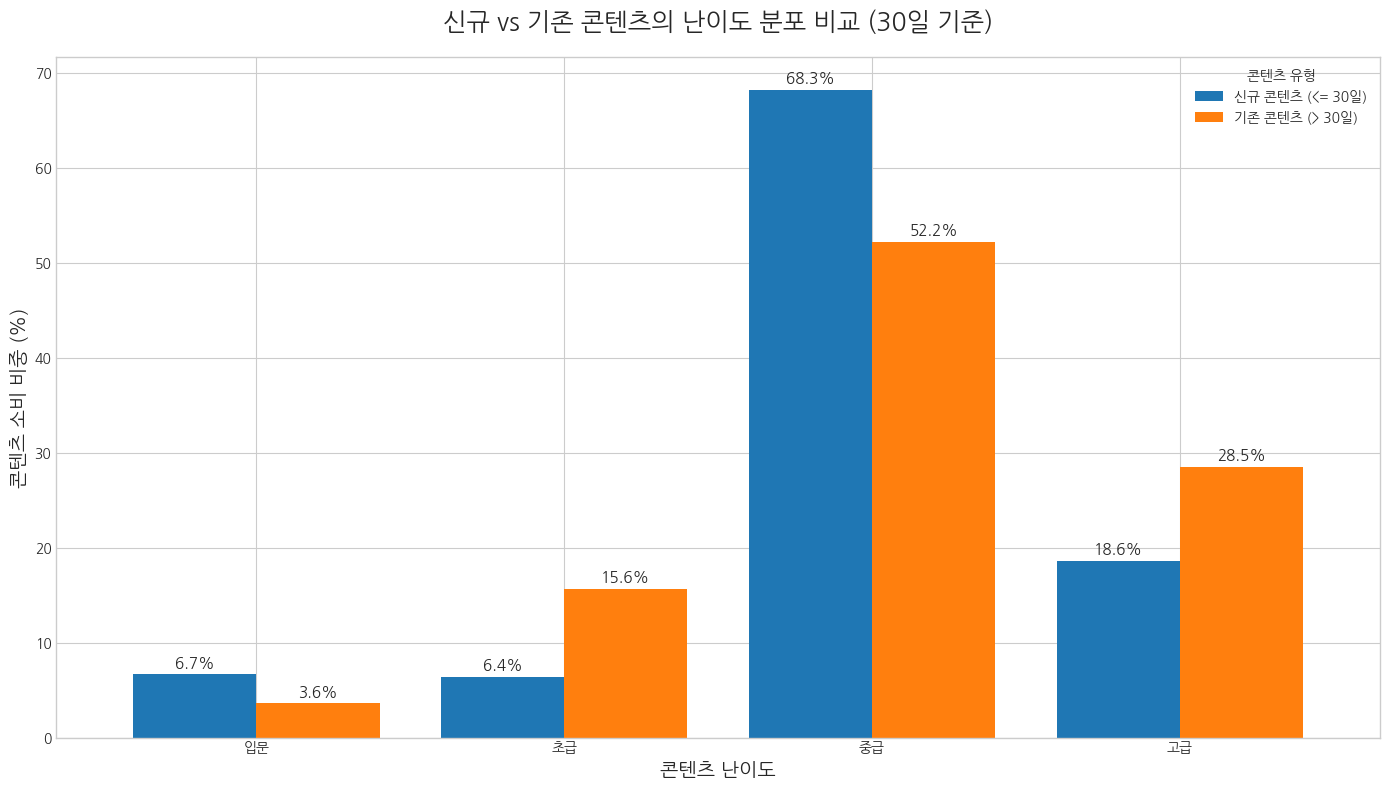

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정] 이전 단계에서 모든 정보가 통합된 'final_merged_df'가 준비된 상태

# -------------------- 1단계: '신규' 그룹과 '기존' 그룹 데이터 분리 --------------------
print("✅ 1단계: 데이터를 '신규'(<=30일)와 '기존'(>30일) 그룹으로 분리합니다...")

# '신규'의 기준을 30일로 설정합니다.
NEW_CONTENT_DAY_THRESHOLD = 30

new_content_df = final_merged_df[final_merged_df['days_since_launch'] <= NEW_CONTENT_DAY_THRESHOLD].copy()
existing_content_df = final_merged_df[final_merged_df['days_since_launch'] > NEW_CONTENT_DAY_THRESHOLD].copy()

print(f"  - 신규 콘텐츠 로그 수: {len(new_content_df):,}")
print(f"  - 기존 콘텐츠 로그 수: {len(existing_content_df):,}")


# -------------------- 2단계: 그룹별 특징 비교 분석 --------------------
print("\n✅ 2단계: 두 그룹의 주요 지표를 비교 분석합니다...")

# --- 분석 1: 난이도 분포 비교 ---
# 각 그룹별로 'content.difficulty'의 비율을 계산합니다.
new_difficulty_dist = new_content_df['content.difficulty'].value_counts(normalize=True) * 100
existing_difficulty_dist = existing_content_df['content.difficulty'].value_counts(normalize=True) * 100

# 두 결과를 하나의 데이터프레임으로 합쳐서 비교합니다.
difficulty_comparison = pd.DataFrame({
    f'신규 콘텐츠 (<= {NEW_CONTENT_DAY_THRESHOLD}일)': new_difficulty_dist,
    f'기존 콘텐츠 (> {NEW_CONTENT_DAY_THRESHOLD}일)': existing_difficulty_dist
}).fillna(0)

print("\n\n--- [분석 1] 난이도 분포 비교 (%) ---")
print(difficulty_comparison.round(2))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정] 이전 단계에서 'difficulty_comparison' 데이터프레임이 준비된 상태

# -------------------- 3단계: 시각화를 위한 데이터 및 라벨 재정비 --------------------
print("\n✅ 3단계: 시각화를 위해 데이터를 재정비합니다...")

# [핵심 1] X축에 표시될 한글 라벨을 정의합니다.
#           (순서는 데이터의 중요도나 난이도 순으로 정하는 것이 좋습니다.)
difficulty_order_korean = ['입문', '초급', '중급', '고급']
difficulty_map_korean = {
    'beginner': '초급',
    'intermediate': '중급',
    'advanced': '고급',
    'hard': '입문'  # 'hard'가 '입문'을 의미한다고 가정. 만약 다르다면 이 부분을 수정해주세요.
}

# 데이터프레임의 인덱스를 한글로 변경하고, 정의된 순서대로 정렬합니다.
plot_df = difficulty_comparison.rename(index=difficulty_map_korean)
# category 타입으로 변환하여 순서를 고정시킵니다.
plot_df.index = pd.Categorical(plot_df.index, categories=difficulty_order_korean, ordered=True)
plot_df.sort_index(inplace=True)


# -------------------- 4단계: 최종 단일 그래프 시각화 --------------------
print("\n✅ 4단계: 최종 분석 결과를 하나의 그래프로 시각화합니다...")
plt.rc('font', family='NanumGothic')

# [핵심 2] 1개의 도화지(ax)만 생성합니다.
fig, ax = plt.subplots(figsize=(14, 8))

# 그룹 막대 그래프를 그립니다.
plot_df.plot(kind='bar', ax=ax, rot=0, width=0.8)

# 그래프 제목 및 라벨 설정
ax.set_title('신규 vs 기존 콘텐츠의 난이도 분포 비교 (30일 기준)', fontsize=18, pad=20)
ax.set_ylabel('콘텐츠 소비 비중 (%)', fontsize=14)
ax.set_xlabel('콘텐츠 난이도', fontsize=14)
ax.legend(title='콘텐츠 유형')

# 각 막대에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize=11)

plt.tight_layout()
plt.show()

✅ 1단계: 각 콘텐츠를 경험한 '전체 고유 사용자 수(분모)'를 계산합니다...
✅ 2단계: 각 콘텐츠를 경험하고 '가입한 고유 사용자 수(분자)'를 계산합니다...
✅ 3단계: '콘텐츠별 전환율'을 계산하고 최종 테이블을 만듭니다...


  [최종 결과] 50명 이상 시청한 콘텐츠 중, 가입 전환율 Top 20
                               total_viewers  converted_users  \
topic.name                                                      
테스트 토픽                                    93             25.0   
React 스타일링: Styled Components             76             16.0   
추천 시스템                                  1304            271.0   
2018 프로그래밍 시작하기                           54             11.0   
React 컴포넌트 설계                             64             13.0   
코드잇 스프린트: 프론트엔드 트랙 3기 OT                 193             37.0   
프로그래머의 세계 이해하기                           960            167.0   
자바 중급 개념                                 119             20.0   
견고한 객체 지향 프로그래밍                          286             47.0   
Styled Components                        304             48.0   
객체 지향 프로그래밍의 4개의 기둥                      4

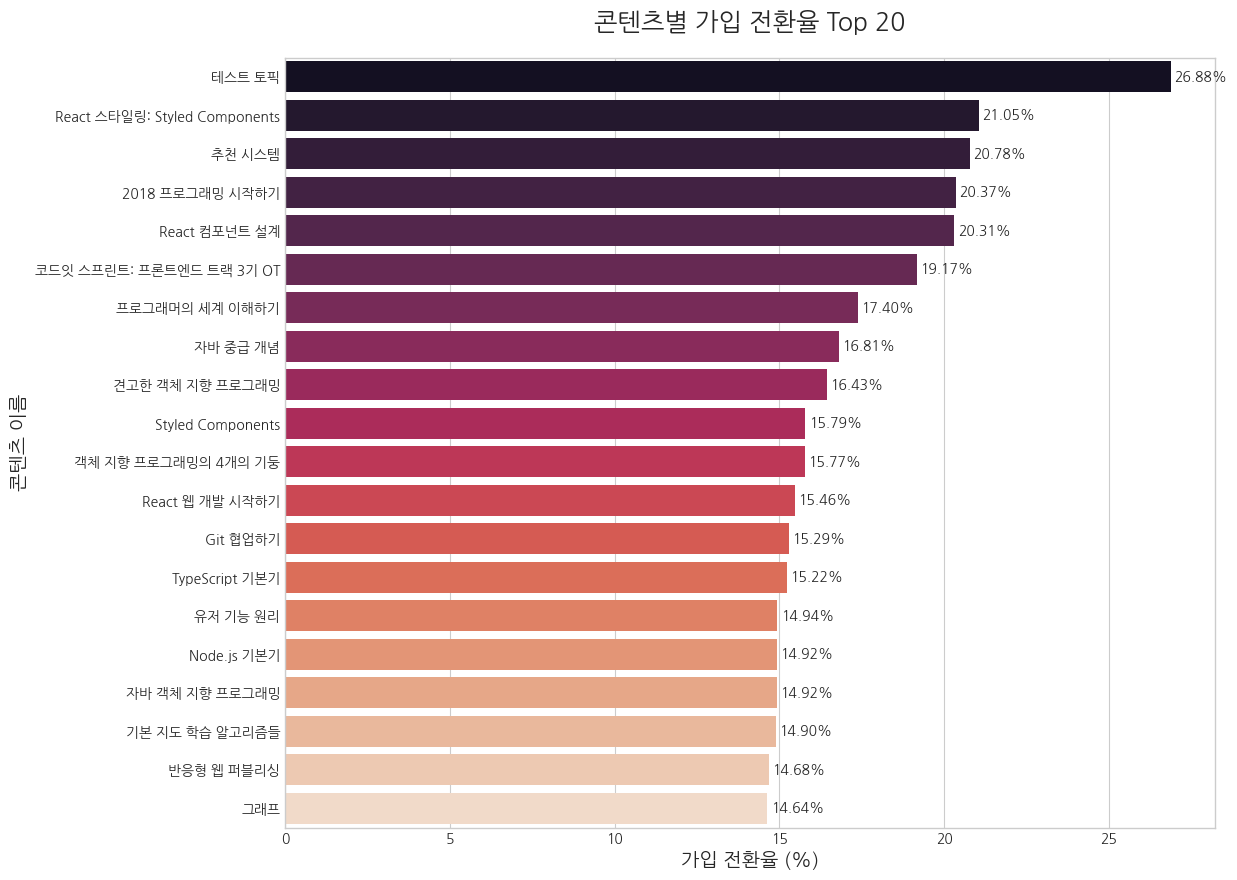

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정] 이전 단계에서 아래 변수들이 모두 준비된 상태
# 1. merged_df: 비회원 로그에 'days_since_launch'가 추가된 완전한 데이터프레임
# 2. signup_df: 회원가입 로그 (핑거프린트와 date 컬럼이 추가된 상태)


# -------------------- 1단계: 콘텐츠별 '전체 경험자 수(분모)' 계산 --------------------
print("✅ 1단계: 각 콘텐츠를 경험한 '전체 고유 사용자 수(분모)'를 계산합니다...")

# 'content.id'로 그룹화하여, 각 콘텐츠를 경험한 고유한 (date, fingerprint) 조합의 수를 셉니다.
total_viewers_per_content = final_merged_df.groupby('topic.name')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
total_viewers_per_content.name = 'total_viewers'


# -------------------- 2단계: 콘텐츠별 '가입 전환자 수(분자)' 계산 --------------------
print("✅ 2단계: 각 콘텐츠를 경험하고 '가입한 고유 사용자 수(분자)'를 계산합니다...")

# 먼저, 비회원 활동과 가입 기록을 모두 연결합니다. (가입한 경우만 남김)
attributed_df = pd.merge(
    final_merged_df[['date', 'fingerprint', 'topic.name']],
    signup_df[['date', 'fingerprint']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)

# 'content.id'로 그룹화하여, 가입으로 전환된 고유한 (date, fingerprint) 조합의 수를 셉니다.
converters_per_content = attributed_df.groupby('topic.name')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
converters_per_content.name = 'converted_users'


# -------------------- 3단계: '콘텐츠별 전환율' 계산 및 최종 테이블 생성 (수정 버전) --------------------
print("✅ 3단계: '콘텐츠별 전환율'을 계산하고 최종 테이블을 만듭니다...")

# 두 Series를 DataFrame으로 합칩니다.
content_conversion_df = pd.concat([total_viewers_per_content, converters_per_content], axis=1).fillna(0)

# 전환율(%) 계산
content_conversion_df['conversion_rate(%)'] = \
    (content_conversion_df['converted_users'] / content_conversion_df['total_viewers'] * 100).fillna(0)


# [핵심 수정] 분석의 신뢰도를 위해, 최소 N명 이상이 본 콘텐츠만 필터링합니다.
MINIMUM_VIEWERS = 50 # 최소 50명 이상이 본 콘텐츠만 대상으로 함 (이 숫자는 조절 가능)
reliable_conversion_df = content_conversion_df[content_conversion_df['total_viewers'] >= MINIMUM_VIEWERS].copy()


# 신뢰도 있는 데이터를 기준으로 전환율이 높은 순서대로 정렬합니다.
reliable_conversion_df.sort_values(by='conversion_rate(%)', ascending=False, inplace=True)


print("\n\n=======================================================")
print(f"  [최종 결과] {MINIMUM_VIEWERS}명 이상 시청한 콘텐츠 중, 가입 전환율 Top 20")
print("=======================================================")
print(reliable_conversion_df.head(20).round(2))


# -------------------- 4단계: 시각화 (신뢰도 있는 데이터 사용) --------------------
# 시각화 대상을 reliable_conversion_df로 변경합니다.
plot_df = reliable_conversion_df.head(20)


plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 10))

ax = sns.barplot(data=plot_df, x='conversion_rate(%)', y=plot_df.index, palette='rocket')

plt.title('콘텐츠별 가입 전환율 Top 20', fontsize=18, pad=20)
plt.xlabel('가입 전환율 (%)', fontsize=14)
plt.ylabel('콘텐츠 이름', fontsize=14)

# 각 막대에 값 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2, f'{width:.2f}%', va='center')

plt.show()

✅ 최종 분석: '효율성(전환율)'과 '기여도(가입자 수)'를 비교하여 콘텐츠를 진단합니다...


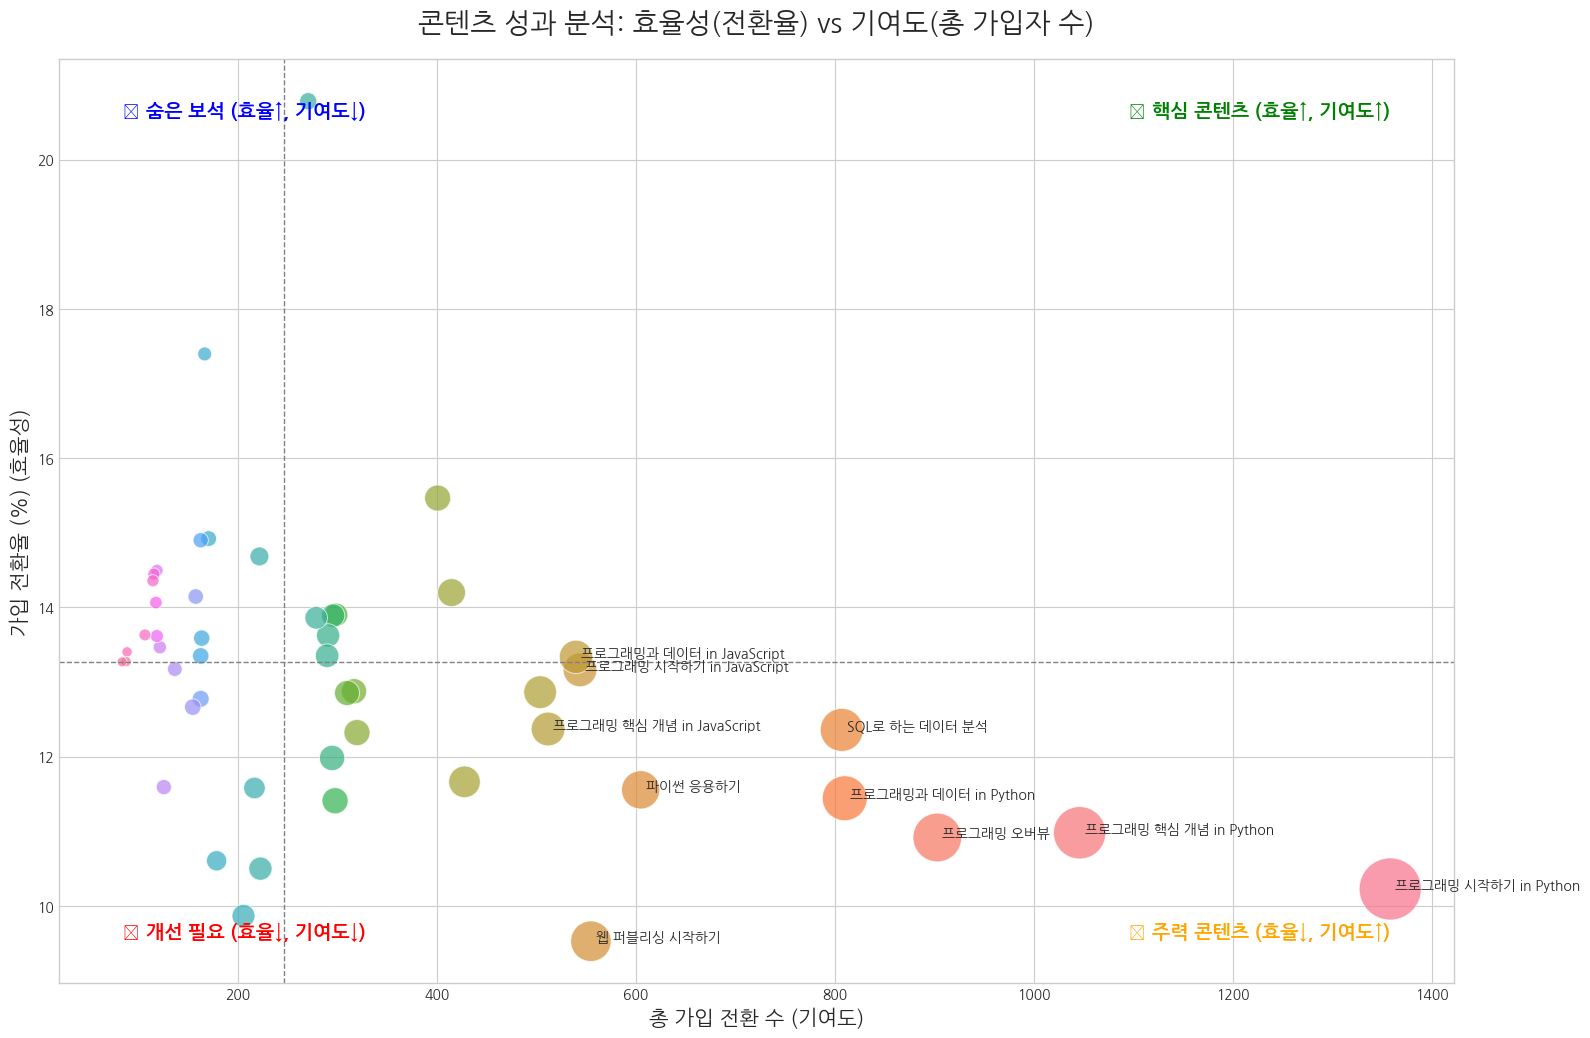

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [가정] 이전 단계에서 'reliable_conversion_df'가 생성된 상태
# (최소 N명 이상 시청한 콘텐츠들의 전환율 정보가 담긴 데이터프레임)

# -------------------- 1단계: 분석을 위한 데이터 준비 --------------------
# 시각화의 가독성을 위해, '총 가입 전환 수(converted_users)'가 많은 상위 50개 콘텐츠만 대상으로 합니다.
plot_df = reliable_conversion_df.sort_values(by='converted_users', ascending=False).head(50)


# -------------------- 2단계: "효율성 vs 기여도" 산점도 시각화 --------------------
print("✅ 최종 분석: '효율성(전환율)'과 '기여도(가입자 수)'를 비교하여 콘텐츠를 진단합니다...")

plt.rc('font', family='NanumGothic')
plt.figure(figsize=(18, 12))

# 산점도를 그립니다. 점의 크기(size)는 전체 시청자 수에 비례하도록 하여 추가 정보를 제공합니다.
ax = sns.scatterplot(
    data=plot_df,
    x='converted_users',
    y='conversion_rate(%)',
    size='total_viewers', # 점의 크기
    sizes=(50, 2000),    # 점 크기 범위
    hue=plot_df.index,   # 각 점에 다른 색상 부여 (범례 숨김)
    alpha=0.7,
    legend=False
)

# -------------------- 3단계: 4분면 분석을 위한 기준선 추가 --------------------
# 각 축의 중앙값(median)을 기준으로 4개의 사분면을 나눕니다.
median_conversions = plot_df['converted_users'].median()
median_rate = plot_df['conversion_rate(%)'].median()

ax.axhline(median_rate, color='grey', linestyle='--', linewidth=1)
ax.axvline(median_conversions, color='grey', linestyle='--', linewidth=1)


# -------------------- 4단계: 주요 콘텐츠 라벨링 및 사분면 설명 추가 --------------------
# 상위 10개 주요 콘텐츠에만 이름을 표시하여 가독성을 높입니다.
top_10_contents = plot_df.head(10)
for i, point in top_10_contents.iterrows():
    plt.text(point['converted_users'] + 5, point['conversion_rate(%)'], str(i), fontsize=10)

# 각 사분면에 대한 설명 추가
plt.text(plot_df['converted_users'].max(), plot_df['conversion_rate(%)'].max(), '🌟 핵심 콘텐츠 (효율↑, 기여도↑)', ha='right', va='top', fontsize=14, color='green', weight='bold')
plt.text(plot_df['converted_users'].min(), plot_df['conversion_rate(%)'].max(), '💎 숨은 보석 (효율↑, 기여도↓)', ha='left', va='top', fontsize=14, color='blue', weight='bold')
plt.text(plot_df['converted_users'].max(), plot_df['conversion_rate(%)'].min(), '💪 주력 콘텐츠 (효율↓, 기여도↑)', ha='right', va='bottom', fontsize=14, color='orange', weight='bold')
plt.text(plot_df['converted_users'].min(), plot_df['conversion_rate(%)'].min(), '🤔 개선 필요 (효율↓, 기여도↓)', ha='left', va='bottom', fontsize=14, color='red', weight='bold')


# 그래프 꾸미기
plt.title('콘텐츠 성과 분석: 효율성(전환율) vs 기여도(총 가입자 수)', fontsize=20, pad=20)
plt.xlabel('총 가입 전환 수 (기여도)', fontsize=15)
plt.ylabel('가입 전환율 (%) (효율성)', fontsize=15)
plt.grid(True)
plt.show()

✅ 1단계: 각 콘텐츠에 '성과 그룹' 라벨을 부여합니다...
✅ 2단계: 각 그룹의 상세 특징 데이터를 추출하고 병합합니다...
✅ 3단계: 각 그룹별 특징을 집계하고 분석합니다...


--- [분석 1] 각 그룹별 대표 콘텐츠 (가입 기여도 순) ---

--- 🌟 핵심 콘텐츠 ---
                        강의제목  conversion_rate(%)  converted_users
50  프로그래밍 시작하기 in JavaScript           13.162352            544.0
46  프로그래밍과 데이터 in JavaScript           13.336626            540.0
55             데이터 사이언스 시작하기           12.863706            504.0
26                       Git           14.197742            415.0
11           React 웹 개발 시작하기           15.464713            401.0

--- 💎 숨은 보석 ---
                   강의제목  conversion_rate(%)  converted_users
36       Django 모델 파헤치기           13.644860             73.0
10  객체 지향 프로그래밍의 4개의 기둥           15.766739             73.0
51                test1           13.009709             67.0
19                  그래프           14.640199             59.0
13       TypeScript 기본기           15.223097             58.0

--- 💪 주력 콘텐츠 ---
                     강의제목  conversion_ra

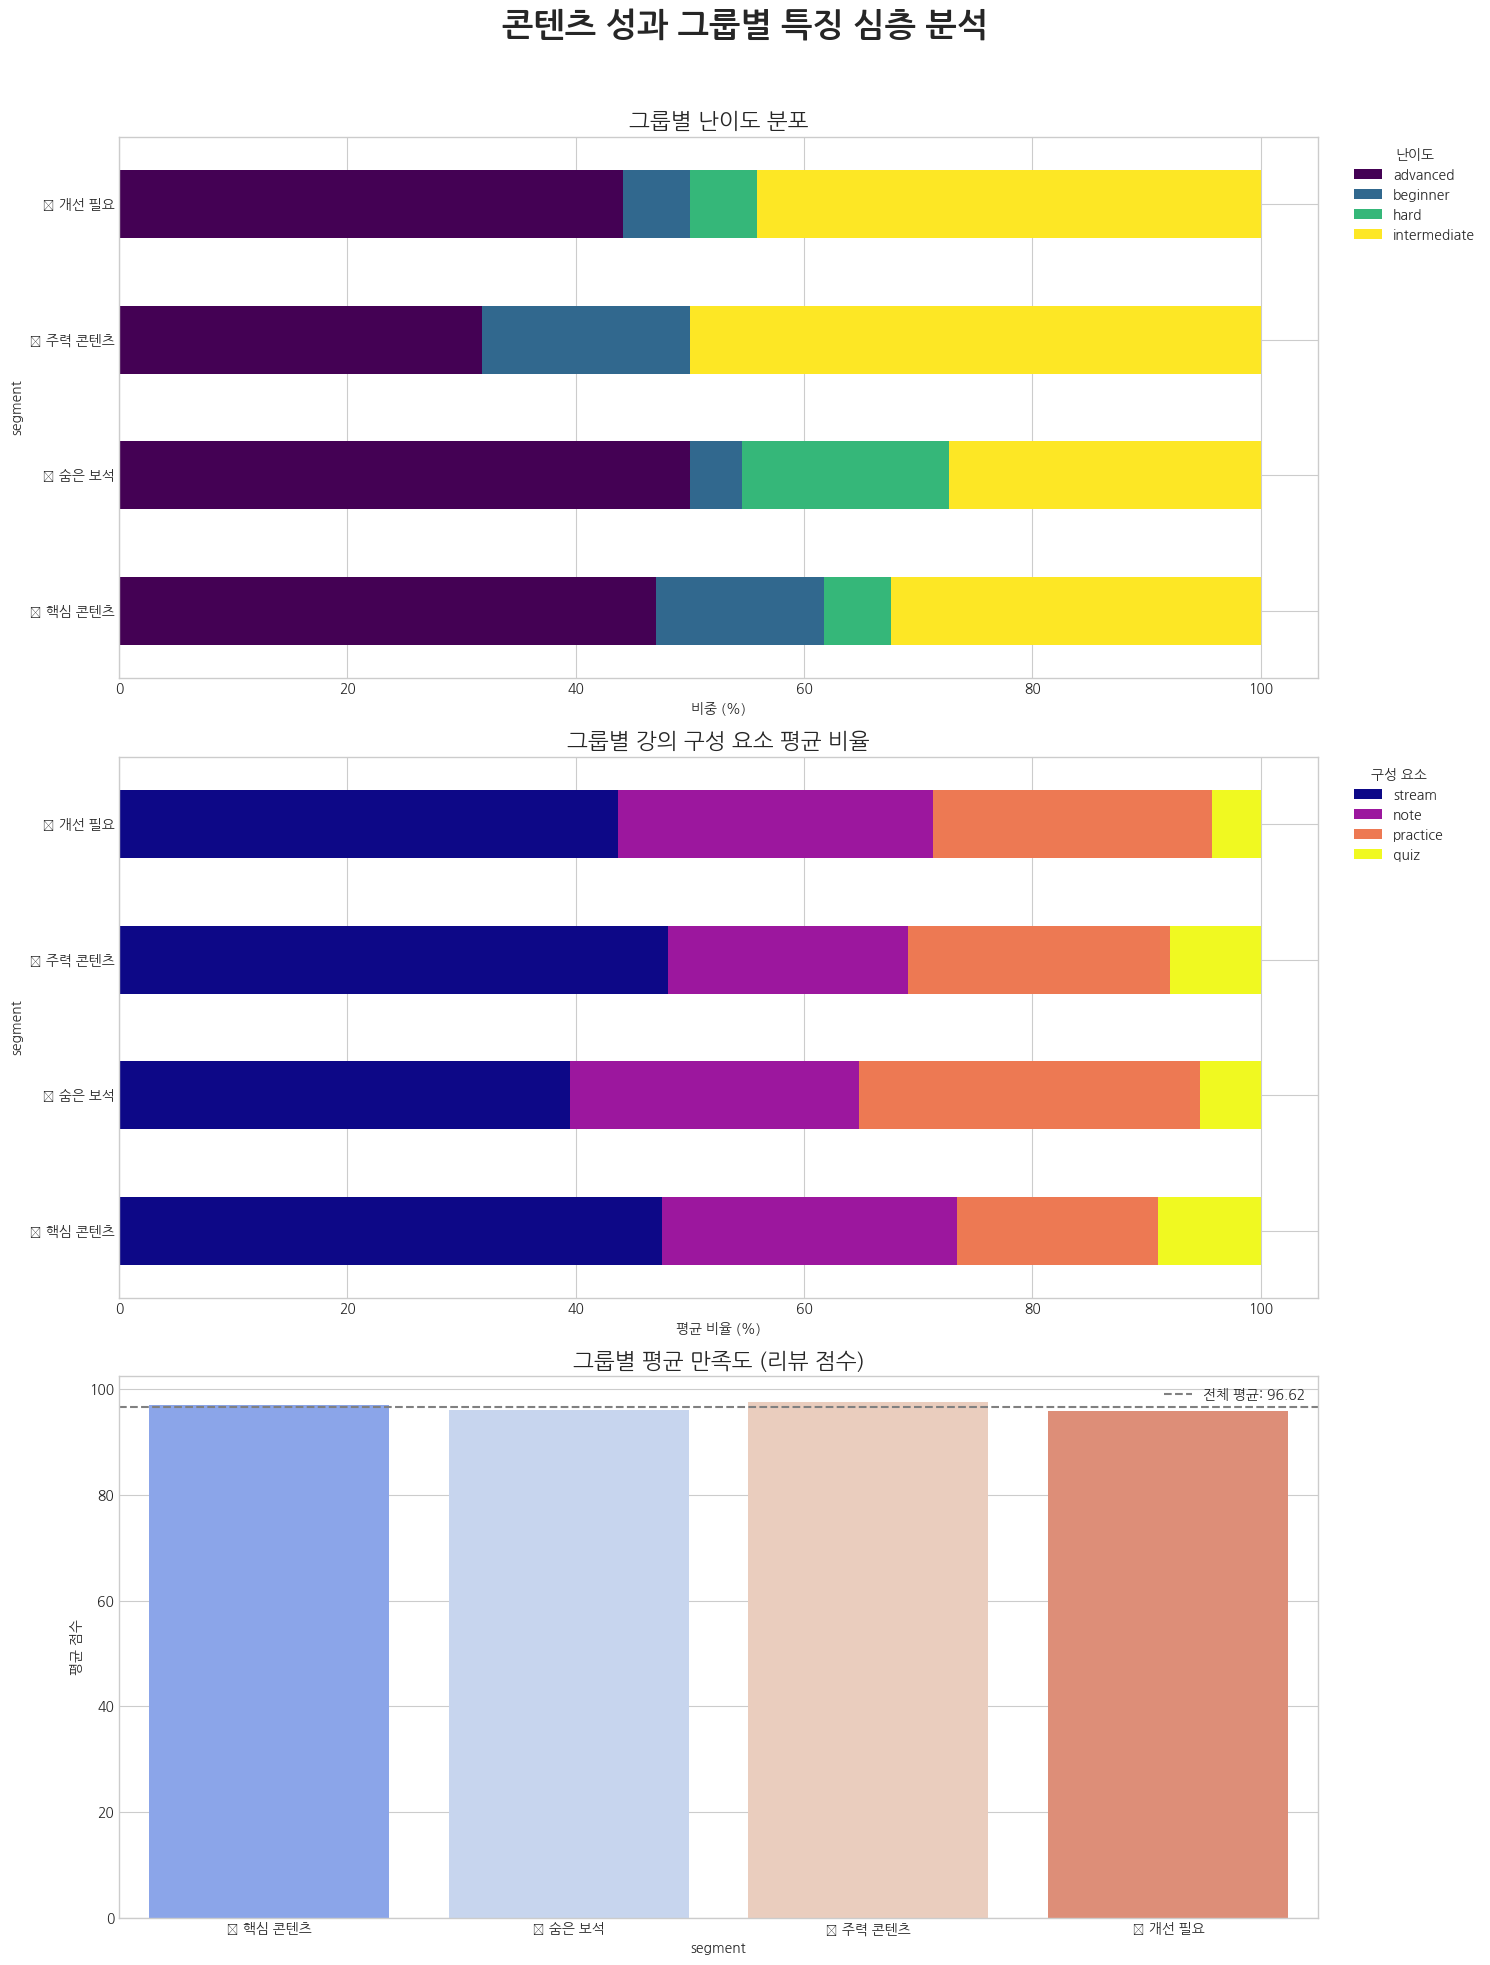

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [가정]
# 1. reliable_conversion_df: '신뢰도 필터링'이 적용된 콘텐츠별 전환율 데이터프레임
#    (이 데이터프레임에는 'total_viewers', 'converted_users', 'conversion_rate(%)'가 포함되어야 함)
# 2. final_merged_df: 모든 정보가 통합된 원본 로그 데이터프레임
#    ('content.id', 'content.difficulty', 'stream', 'note', 'prictice', 'quiz', 'review_point' 등 포함)

# -------------------- 1단계: 각 콘텐츠에 '성과 그룹' 라벨링하기 --------------------
print("✅ 1단계: 각 콘텐츠에 '성과 그룹' 라벨을 부여합니다...")

# 분석 대상 데이터프레임을 복사하여 안전하게 작업
analysis_df = reliable_conversion_df.copy()

# 4분면을 나누기 위한 중앙값(median) 계산
median_conversions = analysis_df['converted_users'].median()
median_rate = analysis_df['conversion_rate(%)'].median()

# 각 콘텐츠에 그룹을 할당하는 함수 정의
def assign_segment(row):
    if row['conversion_rate(%)'] >= median_rate and row['converted_users'] >= median_conversions:
        return '🌟 핵심 콘텐츠'
    elif row['conversion_rate(%)'] >= median_rate and row['converted_users'] < median_conversions:
        return '💎 숨은 보석'
    elif row['conversion_rate(%)'] < median_rate and row['converted_users'] >= median_conversions:
        return '💪 주력 콘텐츠'
    else:
        return '🤔 개선 필요'

# 위 함수를 적용하여 'segment' 컬럼 생성
analysis_df['segment'] = analysis_df.apply(assign_segment, axis=1)


# -------------------- 2단계: '성과 그룹'별 특징 데이터 추출 및 병합 --------------------
print("✅ 2단계: 각 그룹의 상세 특징 데이터를 추출하고 병합합니다...")

# id_info_df 또는 유사한 메타데이터에서 상세 정보를 가져옵니다.
# 여기서는 final_merged_df에서 고유한 콘텐츠 정보만 추출하여 사용하겠습니다.
content_details_df = final_merged_df[[
    'content.id', 'topic.name', 'content.difficulty', 'stream', 'note',
    'practice', 'quiz', 'review_point'
]].drop_duplicates(subset=['content.id'])

# '성과 그룹' 정보와 '콘텐츠 상세 정보'를 content.id를 기준으로 병합
# (topic.name을 인덱스로 사용하고 있으므로, reset_index() 후 merge)
final_analysis_df = pd.merge(
    analysis_df.reset_index().rename(columns={'topic.name': '강의제목'}),
    content_details_df.rename(columns={'topic.name': '강의제목'}),
    on='강의제목',
    how='left'
)


# -------------------- 3단계: 그룹별 특징 집계 및 분석 --------------------
print("✅ 3단계: 각 그룹별 특징을 집계하고 분석합니다...")

# --- 분석 1: 그룹별 콘텐츠 목록 ---
print("\n\n--- [분석 1] 각 그룹별 대표 콘텐츠 (가입 기여도 순) ---")
for segment_name in ['🌟 핵심 콘텐츠', '💎 숨은 보석', '💪 주력 콘텐츠', '🤔 개선 필요']:
    print(f"\n--- {segment_name} ---")
    segment_contents = final_analysis_df[final_analysis_df['segment'] == segment_name]
    print(segment_contents.sort_values(by='converted_users', ascending=False)[['강의제목', 'conversion_rate(%)', 'converted_users']].head(5))

# --- 분석 2: 난이도 분포 ---
difficulty_dist = final_analysis_df.groupby('segment')['content.difficulty'].value_counts(normalize=True).unstack().fillna(0) * 100

# --- 분석 3: 강의 구성 비율 ---
composition_cols = ['stream', 'note', 'practice', 'quiz']
composition_mean = final_analysis_df.groupby('segment')[composition_cols].mean()
composition_ratio = composition_mean.div(composition_mean.sum(axis=1), axis=0) * 100

# --- 분석 4: 평균 만족도 ---
satisfaction_comparison = final_analysis_df.groupby('segment')['review_point'].mean()


# -------------------- 4단계: 최종 결과 시각화 --------------------
print("\n✅ 4단계: 분석 결과를 종합하여 시각화합니다...")
plt.rc('font', family='NanumGothic')
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
fig.suptitle('콘텐츠 성과 그룹별 특징 심층 분석', fontsize=24, weight='bold')

# 그래프 1: 난이도 분포 (100% 누적 막대 그래프)
difficulty_dist.plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('그룹별 난이도 분포', fontsize=16)
axes[0].set_xlabel('비중 (%)')
axes[0].legend(title='난이도', bbox_to_anchor=(1.02, 1), loc='upper left')

# 그래프 2: 강의 구성 비율 (100% 누적 막대 그래프)
composition_ratio.plot(kind='barh', stacked=True, ax=axes[1], colormap='plasma')
axes[1].set_title('그룹별 강의 구성 요소 평균 비율', fontsize=16)
axes[1].set_xlabel('평균 비율 (%)')
axes[1].legend(title='구성 요소', bbox_to_anchor=(1.02, 1), loc='upper left')

# 그래프 3: 평균 만족도 비교 (막대 그래프)
sns.barplot(x=satisfaction_comparison.index, y=satisfaction_comparison.values, ax=axes[2], palette='coolwarm')
axes[2].axhline(final_analysis_df['review_point'].mean(), color='grey', linestyle='--', label=f"전체 평균: {final_analysis_df['review_point'].mean():.2f}")
axes[2].set_title('그룹별 평균 만족도 (리뷰 점수)', fontsize=16)
axes[2].set_ylabel('평균 점수')
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
sub_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.subscription.csv', parse_dates=['client_event_time'])
renew_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/renew.subscription.csv', parse_dates=['client_event_time'])
resub_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/resubscribe.subscription.csv', parse_dates=['client_event_time'])

sub = sub_df.groupby(sub_df['client_event_time'].dt.year)['user_id'].nunique()
renew = renew_df.groupby(renew_df['client_event_time'].dt.year)['user_id'].nunique()
resub = resub_df.groupby(resub_df['client_event_time'].dt.year)['user_id'].nunique()
print("=== 구독 관련 데이터 ===")
print("구독 시작:", sub)
print("구독 갱신:", renew)
print("재구독:", resub)

=== 구독 관련 데이터 ===
구독 시작: client_event_time
2022    6596
2023    7302
Name: user_id, dtype: int64
구독 갱신: client_event_time
2022    2939
2023    5563
Name: user_id, dtype: int64
재구독: client_event_time
2022    151
2023    621
Name: user_id, dtype: int64


In [ ]:
import pandas as pd

# -------------------- 1단계: 데이터 준비 및 지문 생성 --------------------
print("✅ 1단계: 비회원 및 회원가입 데이터에 '디지털 지문'을 생성합니다...")

# 분석의 안정성을 위해 원본 데이터프레임을 복사하여 사용합니다.
non_member_df = null_id_enter_lesson_df.copy()
signup_df = complete_signup_df.copy()

# 지문으로 사용할 컬럼 목록
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

# 비회원 데이터에 지문 생성 (결측값은 'NA' 문자열로 처리하여 안정성 확보)
non_member_df['fingerprint'] = non_member_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
non_member_df['date'] = non_member_df['client_event_time'].dt.date

# 회원가입 데이터에 지문 생성
signup_df['fingerprint'] = signup_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
signup_df['date'] = signup_df['client_event_time'].dt.date


# -------------------- 2단계: 비회원 활동과 회원가입 연결 --------------------
print("✅ 2단계: '날짜'와 '지문'을 기준으로 두 데이터를 병합합니다...")

# '날짜'와 '지문'이 같은 기록을 모두 연결합니다.
attributed_df = pd.merge(
    non_member_df[['date', 'fingerprint', 'client_event_time', 'content.id']],
    signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_watch', '_signup')
)

# -------------------- 3단계: 논리적 필터링 및 최종 데이터 생성 --------------------
print("✅ 3단계: 논리적 필터링을 통해 '가입에 기여한 활동'을 최종 정의합니다...")

# 3-1. 비회원 활동이 회원가입보다 '먼저' 발생한 경우만 필터링합니다.
attributed_df = attributed_df[attributed_df['client_event_time_watch'] < attributed_df['client_event_time_signup']].copy()

# 3-2. 가입 시간과 활동 시간의 차이를 계산합니다.
attributed_df['time_diff'] = attributed_df['client_event_time_signup'] - attributed_df['client_event_time_watch']

# 3-3. 각 '회원가입' 이벤트에 대해, 시간 차이가 가장 적은 (가장 직전의) 활동만 남깁니다.
#      먼저 시간 차이로 정렬합니다.
attributed_df.sort_values(by='time_diff', ascending=True, inplace=True)
#      그 다음, 각 가입 이벤트별로 첫 번째 기록만 남깁니다.
final_attributed_df = attributed_df.drop_duplicates(subset=['user_id', 'client_event_time_signup'], keep='first')


# -------------------- 4단계: 최종 결과 확인 --------------------
print("\n\n=============================================")
print("  [생성 완료] 가입 기여 활동 데이터 (final_attributed_df)")
print("=============================================")
print(f"  - 총 {len(final_attributed_df):,}개의 가입 기여 활동을 식별했습니다.")

print("\n--- 데이터 정보 (info) ---")
print(final_attributed_df.info())

print("\n--- 데이터 샘플 (head) ---")
print(final_attributed_df.head())

✅ 1단계: 비회원 및 회원가입 데이터에 '디지털 지문'을 생성합니다...
✅ 2단계: '날짜'와 '지문'을 기준으로 두 데이터를 병합합니다...
✅ 3단계: 논리적 필터링을 통해 '가입에 기여한 활동'을 최종 정의합니다...


  [생성 완료] 가입 기여 활동 데이터 (final_attributed_df)
  - 총 5,932개의 가입 기여 활동을 식별했습니다.

--- 데이터 정보 (info) ---
<class 'pandas.core.frame.DataFrame'>
Index: 5932 entries, 140586 to 10372
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   date                      5932 non-null   object         
 1   fingerprint               5932 non-null   object         
 2   client_event_time_watch   5932 non-null   datetime64[ns] 
 3   content.id                5932 non-null   object         
 4   user_id                   5932 non-null   object         
 5   client_event_time_signup  5932 non-null   datetime64[ns] 
 6   time_diff                 5932 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(4), timedelta64[ns](1)
memory usage: 370.8+ KB
None

--- 데이터 샘플

In [ ]:
# 1-1. '첫 등장일' 정보를 가입 기여 활동 데이터에 합침
analysis_df = pd.merge(final_attributed_df, null_id_first_seen_series, on='content.id', how='left')
analysis_df['days_since_launch'] = (analysis_df['client_event_time_watch'] - analysis_df['first_seen_by_non_member']).dt.days

# 1-2. '신규' 기준(30일)으로 'experience_type' 컬럼 생성
analysis_df['experience_type'] = np.where(analysis_df['days_since_launch'] <= 30, '신규 경험 그룹', '기존 경험 그룹')

# 1-2. '신규' 기준(30일)으로 'experience_type' 컬럼 생성
analysis_df['experience_type'] = np.where(analysis_df['days_since_launch'] <= 30, '신규 경험 그룹', '기존 경험 그룹')

# 1-3. 각 그룹에 속한 고유한 user_id 목록(set)을 추출
new_exp_users = set(analysis_df[analysis_df['experience_type'] == '신규 경험 그룹']['user_id'].unique())
old_exp_users = set(analysis_df[analysis_df['experience_type'] == '기존 경험 그룹']['user_id'].unique())

print(f"신규 콘텐츠 경험 후 가입자 수: {len(new_exp_users)}명")
print(f"기존 콘텐츠 경험 후 가입자 수: {len(old_exp_users)}명")

신규 콘텐츠 경험 후 가입자 수: 404명
기존 콘텐츠 경험 후 가입자 수: 5528명


In [ ]:
# 2-1. 전체 구독자(신규 구독)의 user_id 목록을 set으로 만듦
subscribers = set(sub_df['user_id'].unique())

# 2-2. 각 그룹과 전체 구독자의 교집합을 구하여, 그룹별 '구독 전환자 수'를 계산
new_exp_subscribers = len(new_exp_users.intersection(subscribers))
old_exp_subscribers = len(old_exp_users.intersection(subscribers))

# 2-3. 그룹별 구독 전환율 계산
conv_rate_new_to_sub = (new_exp_subscribers / len(new_exp_users) * 100) if len(new_exp_users) > 0 else 0
conv_rate_old_to_sub = (old_exp_subscribers / len(old_exp_users) * 100) if len(old_exp_users) > 0 else 0

print(f"\n--- 구독 전환율 비교 ---")
print(f"신규 경험 그룹의 구독 전환율: {conv_rate_new_to_sub:.2f}%")
print(f"기존 경험 그룹의 구독 전환율: {conv_rate_old_to_sub:.2f}%")


--- 구독 전환율 비교 ---
신규 경험 그룹의 구독 전환율: 5.20%
기존 경험 그룹의 구독 전환율: 11.20%


In [ ]:
# 3-1. 각 그룹에 속한 사용자들의 '구독 갱신' 기록만 필터링
renew_logs_new_exp = renew_df[renew_df['user_id'].isin(new_exp_users)]
renew_logs_old_exp = renew_df[renew_df['user_id'].isin(old_exp_users)]

# 3-2. 그룹별 총 갱신 횟수를 계산
total_renews_new = len(renew_logs_new_exp)
total_renews_old = len(renew_logs_old_exp)

# 3-3. 1인당 평균 갱신 횟수 계산 (LTV 대리 지표)
avg_renews_new = total_renews_new / len(new_exp_users) if len(new_exp_users) > 0 else 0
avg_renews_old = total_renews_old / len(old_exp_users) if len(old_exp_users) > 0 else 0

print(f"\n--- LTV (평균 갱신 횟수) 비교 ---")
print(f"신규 경험 그룹의 1인당 평균 갱신 횟수: {avg_renews_new:.2f}회")
print(f"기존 경험 그룹의 1인당 평균 갱신 횟수: {avg_renews_old:.2f}회")


--- LTV (평균 갱신 횟수) 비교 ---
신규 경험 그룹의 1인당 평균 갱신 횟수: 0.06회
기존 경험 그룹의 1인당 평균 갱신 횟수: 0.11회




--- [최종 결과] 그룹별 장기 가치 비교 ---
          구독 전환율(%)  1인당 평균 갱신 횟수
신규 경험 그룹        5.2          0.06
기존 경험 그룹       11.2          0.11


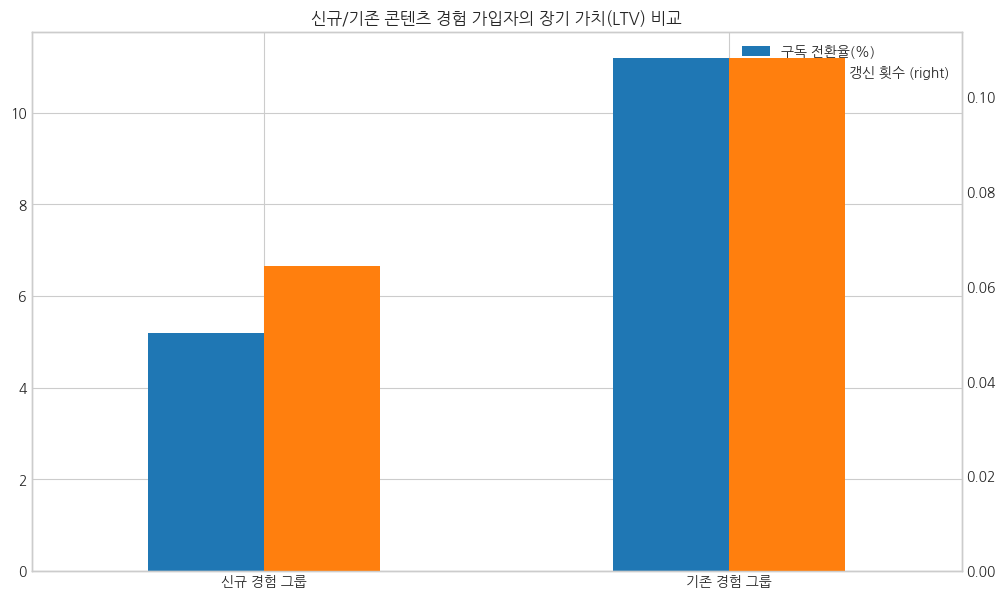

In [ ]:
# 최종 결과 데이터프레임 생성
ltv_analysis_df = pd.DataFrame({
    '구독 전환율(%)': [conv_rate_new_to_sub, conv_rate_old_to_sub],
    '1인당 평균 갱신 횟수': [avg_renews_new, avg_renews_old]
}, index=['신규 경험 그룹', '기존 경험 그룹'])

print("\n\n--- [최종 결과] 그룹별 장기 가치 비교 ---")
print(ltv_analysis_df.round(2))

# 시각화
ltv_analysis_df.plot(
    kind='bar',
    figsize=(12, 7),
    rot=0,
    secondary_y='1인당 평균 갱신 횟수', # 두 지표의 스케일이 다르므로 이중 축 사용
    title='신규/기존 콘텐츠 경험 가입자의 장기 가치(LTV) 비교'
)
plt.show()

In [ ]:
# [디버깅 코드 추가]
# LTV 계산 함수를 호출하기 전에, 재료가 되는 데이터프레임의 실제 구조를 확인합니다.
print("\n--- [디버깅] sub_df의 실제 정보 ---")
print(sub_df.info())
print("\n--- [디버깅] sub_df의 상위 5줄 ---")
print(sub_df.head())

print("\n--- [디버깅] renew_df의 실제 정보 ---")
print(renew_df.info())
print("\n--- [디버깅] renew_df의 상위 5줄 ---")
print(renew_df.head())


# 이 아래 코드에서 LTV 계산 함수가 호출됩니다.
# cr_new, ltv_new = calculate_ltv_metrics(pure_new_users, sub_df, renew_df)


--- [디버깅] sub_df의 실제 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    13757 non-null  object        
 1   client_event_time       14289 non-null  datetime64[ns]
 2   country                 13906 non-null  object        
 3   device_carrier          0 non-null      float64       
 4   device_family           13914 non-null  object        
 5   device_type             13764 non-null  object        
 6   event_type              14289 non-null  object        
 7   language                13914 non-null  object        
 8   os_name                 13908 non-null  object        
 9   os_version              13899 non-null  object        
 10  platform                13914 non-null  object        
 11  user_id                 14289 non-null  object        
 12  plan.price       

✅ 1단계: 가입 전 '모든' 비회원 활동과 가입 기록을 연결합니다...
  - 총 122,606개의 '가입 전 활동'을 식별했습니다.

✅ 2단계: 가입자를 세 그룹으로 분류합니다...
  - '순수 신규' 경험 가입자 수: 307
  - '순수 기존' 경험 가입자 수: 5,136
  - '혼합' 경험 가입자 수: 298

✅ 3단계: 각 그룹의 구독 전환율 및 LTV(평균 갱신 횟수)를 계산합니다...


--- [최종 결과] 그룹별 장기 가치(LTV) 비교 ---
             구독 전환율(%)  1인당 평균 갱신 횟수
순수 신규 경험 그룹       4.56          0.07
혼합 경험 그룹         10.74          0.04
순수 기존 경험 그룹      11.47          0.11


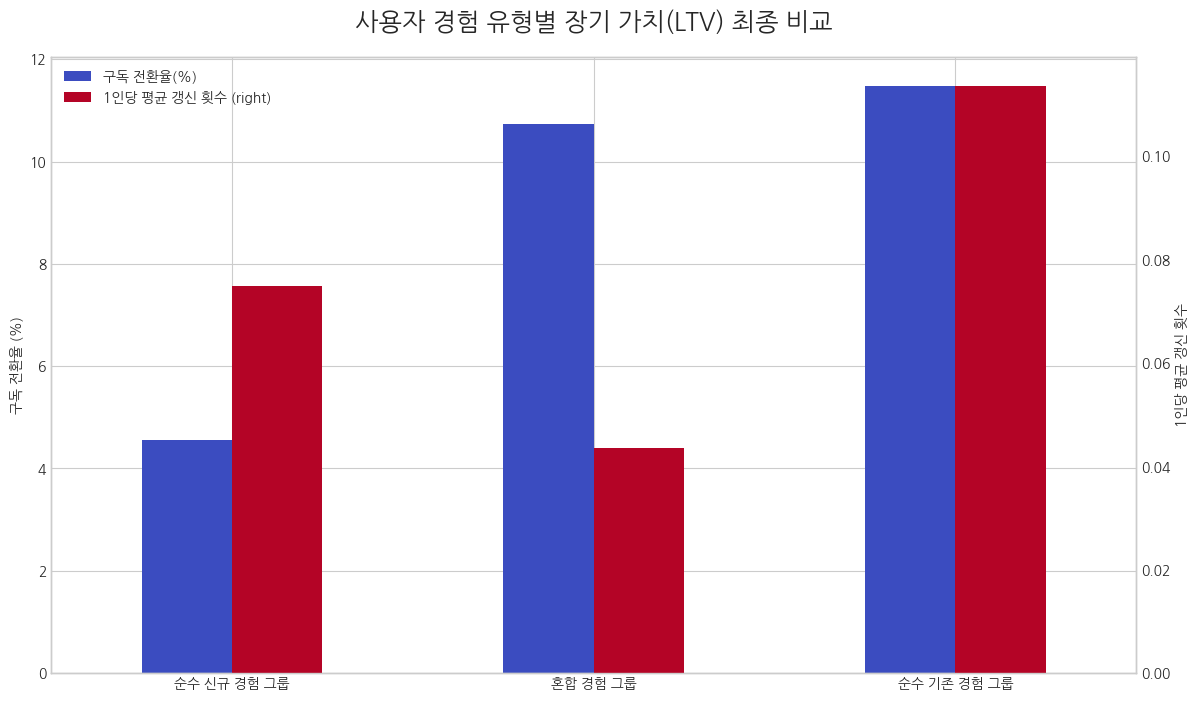

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- 1단계: '전체 기여 활동' 데이터 생성 --------------------
print("✅ 1단계: 가입 전 '모든' 비회원 활동과 가입 기록을 연결합니다...")


# [핵심] drop_duplicates를 제거하여 모든 활동을 포함시킵니다.
attributed_df = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'client_event_time', 'content.id']],
    signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_watch', '_signup')
)
all_attributed_activities_df = attributed_df[attributed_df['client_event_time_watch'] < attributed_df['client_event_time_signup']].copy()

print(f"  - 총 {len(all_attributed_activities_df):,}개의 '가입 전 활동'을 식별했습니다.")


# -------------------- 2단계: 가입자를 '순수 신규', '순수 기존', '혼합' 그룹으로 정의 --------------------
print("\n✅ 2단계: 가입자를 세 그룹으로 분류합니다...")

# '첫 등장일' 정보를 합치고, 각 활동이 '신규'인지 아닌지 판단합니다.
analysis_df = pd.merge(all_attributed_activities_df,  null_id_first_seen_series, on='content.id', how='left')
analysis_df['days_since_launch'] = (analysis_df['client_event_time_watch'] - analysis_df['first_seen_by_non_member']).dt.days
analysis_df['is_new'] = analysis_df['days_since_launch'] <= 30 # 30일 기준

# 각 가입자(user_id)별로 신규/기존 콘텐츠 경험 여부를 요약합니다.
user_experience_summary = analysis_df.groupby('user_id')['is_new'].agg(['any', 'all'])

# [수정] .index를 사용하여 user_id를 가져옵니다.
pure_new_users = set(user_experience_summary[user_experience_summary['all'] == True].index)
pure_old_users = set(user_experience_summary[user_experience_summary['any'] == False].index)

# [수정] 'user_id' 컬럼이 아닌, user_experience_summary의 인덱스를 사용
all_grouped_users = set(user_experience_summary.index)
mixed_users = all_grouped_users - pure_new_users - pure_old_users

print(f"  - '순수 신규' 경험 가입자 수: {len(pure_new_users):,}")
print(f"  - '순수 기존' 경험 가입자 수: {len(pure_old_users):,}")
print(f"  - '혼합' 경험 가입자 수: {len(mixed_users):,}") # 이제 0이 아닐 것입니다!


# -------------------- 3단계: 각 그룹별 LTV 지표 계산 --------------------
print("\n✅ 3단계: 각 그룹의 구독 전환율 및 LTV(평균 갱신 횟수)를 계산합니다...")

# 계산을 위한 함수 정의
def calculate_ltv_metrics(user_set, sub_df, renew_df):
    """특정 사용자 그룹의 구독 전환율과 평균 갱신 횟수를 계산하는 함수"""
    total_users = len(user_set)
    if total_users == 0:
        return 0, 0

    # 'user_id' 컬럼이 있는지 먼저 확인하고, 없으면 인덱스에서 가져옵니다.
    if 'user_id' in sub_df.columns:
        sub_user_ids = sub_df['user_id']
    else:
        sub_user_ids = sub_df.index

    if 'user_id' in renew_df.columns:
        renew_user_ids = renew_df['user_id']
    else:
        renew_user_ids = renew_df.index

    # 구독 전환율 계산
    subscribers = set(sub_user_ids.unique())
    converted_users = len(user_set.intersection(subscribers))
    conversion_rate = (converted_users / total_users * 100)

    # 평균 갱신 횟수 계산
    # .isin()은 Series와 Index 모두에 잘 작동합니다.
    total_renews = len(renew_df[renew_user_ids.isin(user_set)])
    avg_renews = total_renews / total_users

    return conversion_rate, avg_renews
# 각 그룹별로 LTV 지표 계산
cr_new, ltv_new = calculate_ltv_metrics(pure_new_users, sub_df, renew_df)
cr_old, ltv_old = calculate_ltv_metrics(pure_old_users, sub_df, renew_df) # <<<< 'sub_df'로 수정!
cr_mix, ltv_mix = calculate_ltv_metrics(mixed_users, sub_df, renew_df) # <<<< 'sub_df'로 수정!


# -------------------- 4단계: 최종 결과 종합 및 시각화 --------------------
# 최종 결과 데이터프레임 생성
ltv_analysis_df = pd.DataFrame({
    '구독 전환율(%)': [cr_new, cr_mix, cr_old],
    '1인당 평균 갱신 횟수': [ltv_new, ltv_mix, ltv_old]
}, index=['순수 신규 경험 그룹', '혼합 경험 그룹', '순수 기존 경험 그룹'])

print("\n\n--- [최종 결과] 그룹별 장기 가치(LTV) 비교 ---")
print(ltv_analysis_df.round(2))

# 시각화
plt.rc('font', family='NanumGothic')
ax = ltv_analysis_df.plot(
    kind='bar',
    figsize=(14, 8),
    rot=0,
    secondary_y='1인당 평균 갱신 횟수',
    colormap='coolwarm'
)
plt.title('사용자 경험 유형별 장기 가치(LTV) 최종 비교', fontsize=18, pad=20)
ax.set_ylabel('구독 전환율 (%)')
ax.right_ax.set_ylabel('1인당 평균 갱신 횟수')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway # ANOVA 검정을 위한 함수


# -------------------- 1. 구독 전환율 차이 검증 (카이제곱 검정) --------------------
print("="*40)
print("  [검증 1] 세 그룹 간 구독 전환율 차이 통계적 검증")
print("="*40)

# 1-1. 카이제곱 검정을 위한 분할표(Contingency Table) 생성
# 각 그룹의 '구독자' 수
subscribers_new = len(sub_df[sub_df['user_id'].isin(pure_new_users)])
subscribers_old = len(sub_df[sub_df['user_id'].isin(pure_old_users)])
subscribers_mix = len(sub_df[sub_df['user_id'].isin(mixed_users)])

# 각 그룹의 '비구독자' 수
non_subscribers_new = len(pure_new_users) - subscribers_new
non_subscribers_old = len(pure_old_users) - subscribers_old
non_subscribers_mix = len(mixed_users) - subscribers_mix

# 3x2 분할표 데이터
observed_values_sub = [
    [subscribers_new, non_subscribers_new], # 순수 신규 그룹 [구독, 비구독]
    [subscribers_mix, non_subscribers_mix], # 혼합 그룹 [구독, 비구독]
    [subscribers_old, non_subscribers_old]  # 순수 기존 그룹 [구독, 비구독]
]

# 1-2. 카이제곱 검정 수행
chi2, p_value_sub, _, _ = chi2_contingency(observed_values_sub)

print(f"\n--- 카이제곱 검정 결과 ---")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p_value_sub:.4f}")

# 1-3. p-value 해석
alpha = 0.05
print("\n--- 결론 (구독 전환율) ---")
if p_value_sub < alpha:
    print(f"✅ p-value ({p_value_sub:.4f})가 유의수준 ({alpha})보다 작으므로, 통계적으로 유의미한 차이가 있습니다.")
    print("   결론: 세 그룹 간의 구독 전환율에는 유의미한 차이가 존재합니다.")
else:
    print(f"❌ p-value ({p_value_sub:.4f})가 유의수준 ({alpha})보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.")


# -------------------- 2. 평균 갱신 횟수(LTV) 차이 검증 (ANOVA) --------------------
print("\n\n" + "="*40)
print("  [검증 2] 세 그룹 간 평균 갱신 횟수(LTV) 차이 통계적 검증")
print("="*40)

# 2-1. ANOVA를 위한 데이터 준비: 각 사용자별 '갱신 횟수'를 계산
renew_counts_per_user = renew_df['user_id'].value_counts()

# 각 그룹에 속한 사용자들의 갱신 횟수만 Series 형태로 추출
# (갱신 기록이 없는 사용자는 0으로 처리해야 정확한 평균 비교가 가능합니다)
def get_renew_counts(user_set, renew_counts):
    # user_set에 있는 모든 유저에 대해, 갱신 횟수를 가져오고 없으면 0으로 채웁니다.
    return pd.Series(list(user_set)).map(renew_counts).fillna(0)

renew_data_new = get_renew_counts(pure_new_users, renew_counts_per_user)
renew_data_mix = get_renew_counts(mixed_users, renew_counts_per_user)
renew_data_old = get_renew_counts(pure_old_users, renew_counts_per_user)

# 2-2. 일원분산분석 (ANOVA) 수행
f_statistic, p_value_ltv = f_oneway(renew_data_new, renew_data_mix, renew_data_old)

print(f"\n--- ANOVA 검정 결과 ---")
print(f"F-통계량: {f_statistic:.4f}")
print(f"p-value: {p_value_ltv:.4f}")

# 2-3. p-value 해석
print("\n--- 결론 (평균 갱신 횟수) ---")
if p_value_ltv < alpha:
    print(f"✅ p-value ({p_value_ltv:.4f})가 유의수준 ({alpha})보다 작으므로, 통계적으로 유의미한 차이가 있습니다.")
    print("   결론: 세 그룹의 평균 갱신 횟수 중 적어도 하나는 다른 그룹과 유의미한 차이를 보입니다.")
else:
    print(f"❌ p-value ({p_value_ltv:.4f})가 유의수준 ({alpha})보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.")
    print("   결론: 세 그룹 간의 평균 갱신 횟수 차이가 유의미하다고 말할 수 없습니다.")

  [검증 1] 세 그룹 간 구독 전환율 차이 통계적 검증

--- 카이제곱 검정 결과 ---
카이제곱 통계량: 15.2655
p-value: 0.0005

--- 결론 (구독 전환율) ---
✅ p-value (0.0005)가 유의수준 (0.05)보다 작으므로, 통계적으로 유의미한 차이가 있습니다.
   결론: 세 그룹 간의 구독 전환율에는 유의미한 차이가 존재합니다.


  [검증 2] 세 그룹 간 평균 갱신 횟수(LTV) 차이 통계적 검증

--- ANOVA 검정 결과 ---
F-통계량: 2.0759
p-value: 0.1255

--- 결론 (평균 갱신 횟수) ---
❌ p-value (0.1255)가 유의수준 (0.05)보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.
   결론: 세 그룹 간의 평균 갱신 횟수 차이가 유의미하다고 말할 수 없습니다.


In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710031 entries, 0 to 1710030
Data columns (total 35 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   city                      object        
 1   client_event_time         datetime64[ns]
 2   country                   object        
 3   device_carrier            float64       
 4   device_family             object        
 5   device_type               object        
 6   event_type                object        
 7   language                  object        
 8   os_name                   object        
 9   os_version                object        
 10  platform                  object        
 11  user_id                   float64       
 12  content.id                object        
 13  is_trial                  object        
 14  lesson.id                 object        
 15  is_free_trial             object        
 16  fingerprint               object        
 17  date    

In [ ]:
complete_signup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145133 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_carrier     0 non-null       float64       
 4   device_family      45767 non-null   object        
 5   device_type        44659 non-null   object        
 6   event_type         145133 non-null  object        
 7   language           45767 non-null   object        
 8   os_name            45745 non-null   object        
 9   os_version         45651 non-null   object        
 10  platform           45767 non-null   object        
 11  user_id            145133 non-null  object        
 12  type               144958 non-null  object        
 13  fingerprint        145133 non-null  object  

✅ 1단계: '실습 위주' 콘텐츠를 정의합니다...
  - 총 151개 콘텐츠 중, 24개를 '실습 위주'로 정의했습니다.

✅ 2단계: 각 비회원 세션의 '첫 경험' 콘텐츠를 식별합니다...
  - 총 89,195개의 '첫 경험' 세션을 식별했습니다.

✅ 3단계: '첫 경험'의 유형에 따라 비회원 세션을 두 그룹으로 분리합니다...
experience_type
강의 위주 첫 경험    60565
실습 위주 첫 경험    28630
Name: count, dtype: int64
✅ 4단계: 각 '첫 경험' 그룹이 어떤 user_id로 가입했는지 식별합니다...
  - '실습 위주 첫 경험' 후 (같은 날) 가입한 고유 사용자 수: 2,501
  - '강의 위주 첫 경험' 후 (같은 날) 가입한 고유 사용자 수: 5,860

✅ 5단계: 오직 'user_id'만을 기준으로 각 그룹의 LTV를 계산합니다...


--- [최종 결과] 첫 경험 유형별 장기 가치(LTV) 비교 (user_id 기준) ---
               구독 전환율(%)  1인당 평균 갱신 횟수
실습 위주 첫 경험 그룹      11.48           0.1
강의 위주 첫 경험 그룹      10.84           0.1


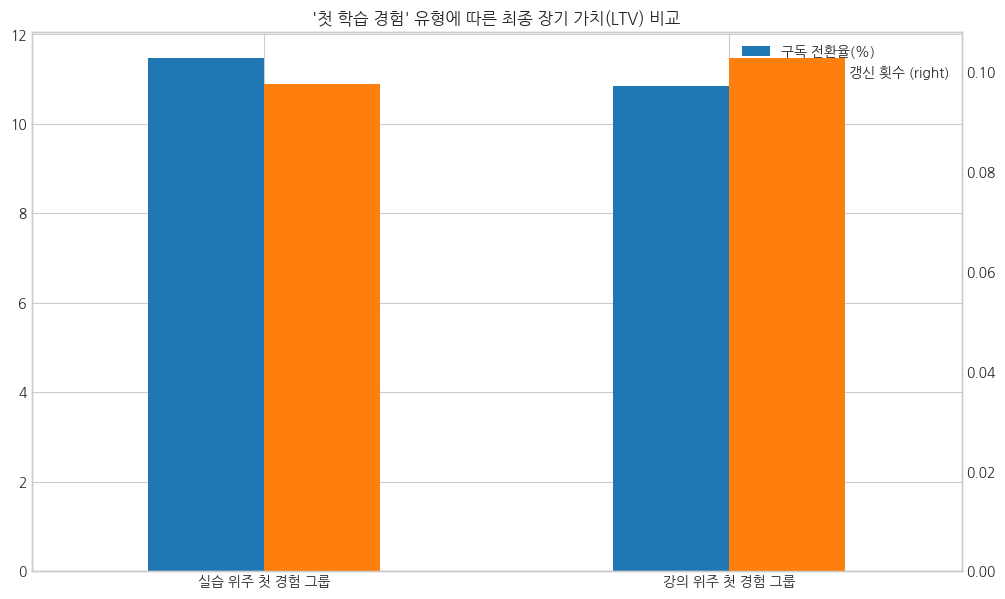

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- 1단계: '실습 위주' 콘텐츠 정의 --------------------
print("✅ 1단계: '실습 위주' 콘텐츠를 정의합니다...")

# 강의 구성 요소 컬럼 (오타를 'practice'로 수정했다고 가정)
composition_cols = ['stream', 'note', 'practice', 'quiz']
# final_merged_df에 'practice' 컬럼이 없다면 'prictice'로 사용하세요.
final_merged_df['total_components'] = final_merged_df[composition_cols].sum(axis=1)
final_merged_df['practice_ratio'] = final_merged_df['practice'] /final_merged_df['total_components']

# '실습'의 비중이 30% 이상인 콘텐츠를 '실습 위주'로 정의합니다.
PRACTICE_THRESHOLD = 0.3
practice_heavy_content_ids = set(final_merged_df[final_merged_df['practice_ratio'] >= PRACTICE_THRESHOLD]['content.id'].unique())

print(f"  - 총 {len(id_info_df)}개 콘텐츠 중, {len(practice_heavy_content_ids)}개를 '실습 위주'로 정의했습니다.")


# -------------------- 2단계: 비회원의 '첫 경험' 콘텐츠 식별 --------------------
print("\n✅ 2단계: 각 비회원 세션의 '첫 경험' 콘텐츠를 식별합니다...")

# 각 (date, fingerprint) 그룹별로 가장 오래된(첫) 활동 기록의 인덱스를 찾습니다.
first_touch_indices = final_merged_df.loc[
    final_merged_df.groupby(['date', 'fingerprint'])['client_event_time'].idxmin()
].index

# 해당 인덱스로 '첫 경험' 기록만 추출합니다.
first_touch_df = final_merged_df.loc[first_touch_indices].copy()

print(f"  - 총 {len(first_touch_df):,}개의 '첫 경험' 세션을 식별했습니다.")


# -------------------- 3단계: '첫 경험'에 따라 그룹 분리 --------------------
print("\n✅ 3단계: '첫 경험'의 유형에 따라 비회원 세션을 두 그룹으로 분리합니다...")

# '첫 경험' 콘텐츠가 '실습 위주'인지 여부에 따라 그룹을 나눕니다.
first_touch_df['experience_type'] = '강의 위주 첫 경험'
first_touch_df.loc[first_touch_df['content.id'].isin(practice_heavy_content_ids), 'experience_type'] = '실습 위주 첫 경험'

# 각 그룹의 '전체 모수(분모)'를 계산합니다.
total_pool_by_exp_type = first_touch_df['experience_type'].value_counts()
print(total_pool_by_exp_type)

# -------------------- 4단계: '첫 경험' 그룹별로 '가입자 user_id 목록' 확보 --------------------
print("✅ 4단계: 각 '첫 경험' 그룹이 어떤 user_id로 가입했는지 식별합니다...")

# [수정] 'date'와 'fingerprint'를 모두 사용하여, '같은 날' 가입한 경우만 연결합니다.
converted_to_signup_df = pd.merge(
    first_touch_df,
    complete_signup_df[['date', 'fingerprint', 'user_id']],
    on=['date', 'fingerprint'],
    how='inner'
)
# [핵심] 이제부터는 이 'user_id'를 사용하여 모든 것을 추적합니다.
practice_first_users = set(converted_to_signup_df[converted_to_signup_df['experience_type'] == '실습 위주 첫 경험']['user_id_y'].unique())
lecture_first_users = set(converted_to_signup_df[converted_to_signup_df['experience_type'] == '강의 위주 첫 경험']['user_id_y'].unique())

print(f"  - '실습 위주 첫 경험' 후 (같은 날) 가입한 고유 사용자 수: {len(practice_first_users):,}")
print(f"  - '강의 위주 첫 경험' 후 (같은 날) 가입한 고유 사용자 수: {len(lecture_first_users):,}")


# -------------------- 5단계: 'user_id'만을 기준으로 구독 전환율 및 LTV 계산 (수정 완료) --------------------
print("\n✅ 5단계: 오직 'user_id'만을 기준으로 각 그룹의 LTV를 계산합니다...")

def calculate_ltv_by_userid(user_set, sub_df, renew_df):
    """user_id 목록을 받아, 해당 그룹의 구독 전환율과 평균 갱신 횟수를 계산하는 함수"""
    total_users = len(user_set)
    if total_users == 0:
        return 0, 0

    subscribers_in_group = len(sub_df[sub_df['user_id'].isin(user_set)])
    conversion_rate = (subscribers_in_group / total_users * 100)

    total_renews_in_group = len(renew_df[renew_df['user_id'].isin(user_set)])
    avg_renews = total_renews_in_group / total_users

    return conversion_rate, avg_renews

# [수정] 명확한 변수 이름(subscribe_df)을 사용하여 LTV 지표를 계산합니다.
cr_practice, ltv_practice = calculate_ltv_by_userid(practice_first_users, sub_df, renew_df)
cr_lecture, ltv_lecture = calculate_ltv_by_userid(lecture_first_users, sub_df, renew_df)


# -------------------- 6단계: 최종 결과 종합 및 시각화 --------------------
# 최종 결과 데이터프레임 생성
ltv_analysis_df = pd.DataFrame({
    '구독 전환율(%)': [cr_practice, cr_lecture],
    '1인당 평균 갱신 횟수': [ltv_practice, ltv_lecture]
}, index=['실습 위주 첫 경험 그룹', '강의 위주 첫 경험 그룹'])

print("\n\n--- [최종 결과] 첫 경험 유형별 장기 가치(LTV) 비교 (user_id 기준) ---")
print(ltv_analysis_df.round(2))

# 시각화
ltv_analysis_df.plot(
    kind='bar',
    figsize=(12, 7),
    rot=0,
    secondary_y='1인당 평균 갱신 횟수',
    title="'첫 학습 경험' 유형에 따른 최종 장기 가치(LTV) 비교"
)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# [가정] 이전 단계에서 아래 모든 변수들이 준비된 상태여야 합니다.
# 1. total_pool_by_exp_type: 각 '첫 경험' 그룹의 전체 가입자 수 (분모)
# 2. practice_first_users, lecture_first_users: 각 그룹에 속한 user_id 목록 (set)
# 3. subscribe_df, renew_df: 구독 및 갱신 로그

# -------------------- 1. 구독 전환율 차이 검증 (카이제곱 검정) --------------------
print("="*30)
print("  [검증 1] 구독 전환율 차이 통계적 검증")
print("="*30)

# 1-1. 카이제곱 검정을 위한 분할표(Contingency Table) 생성
# 각 그룹의 '구독자' 수
subscribers_practice = len(sub_df[sub_df['user_id'].isin(practice_first_users)])
subscribers_lecture = len(sub_df[sub_df['user_id'].isin(lecture_first_users)])

# 각 그룹의 '비구독자' 수
non_subscribers_practice = len(practice_first_users) - subscribers_practice
non_subscribers_lecture = len(lecture_first_users) - subscribers_lecture

# 분할표 데이터: [[실습-구독, 실습-비구독], [강의-구독, 강의-비구독]]
observed_values_sub = [
    [subscribers_practice, non_subscribers_practice],
    [subscribers_lecture, non_subscribers_lecture]
]

# 1-2. 카이제곱 검정 수행
chi2, p_value_sub, _, _ = chi2_contingency(observed_values_sub)

print(f"\n--- 카이제곱 검정 결과 ---")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p_value_sub:.4f}")

# 1-3. p-value 해석
alpha = 0.05
print("\n--- 결론 (구독 전환율) ---")
if p_value_sub < alpha:
    print(f"✅ p-value ({p_value_sub:.4f})가 유의수준 ({alpha})보다 작으므로, 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"❌ p-value ({p_value_sub:.4f})가 유의수준 ({alpha})보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.")


# -------------------- 2. 평균 갱신 횟수(LTV) 차이 검증 (T-검정) --------------------
print("\n\n" + "="*30)
print("  [검증 2] 평균 갱신 횟수(LTV) 차이 통계적 검증")
print("="*30)

# 2-1. T-검정을 위한 데이터 준비: 각 사용자별 '갱신 횟수'를 계산
renew_counts_per_user = renew_df['user_id'].value_counts()

# 각 그룹에 속한 사용자들의 갱신 횟수만 추출
renew_data_practice = renew_counts_per_user[renew_counts_per_user.index.isin(practice_first_users)]
renew_data_lecture = renew_counts_per_user[renew_counts_per_user.index.isin(lecture_first_users)]

# 2-2. 독립표본 T-검정 수행
# equal_var=False 옵션은 두 그룹의 분산이 다를 수 있다고 가정하는 Welch's t-test를 수행하여 더 안정적입니다.
t_statistic, p_value_ltv = ttest_ind(renew_data_practice, renew_data_lecture, equal_var=False)

print(f"\n--- 독립표본 T-검정 결과 ---")
print(f"T-통계량: {t_statistic:.4f}")
print(f"p-value: {p_value_ltv:.4f}")

# 2-3. p-value 해석
print("\n--- 결론 (평균 갱신 횟수) ---")
if p_value_ltv < alpha:
    print(f"✅ p-value ({p_value_ltv:.4f})가 유의수준 ({alpha})보다 작으므로, 두 그룹의 평균 갱신 횟수에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"❌ p-value ({p_value_ltv:.4f})가 유의수준 ({alpha})보다 크므로, 평균 갱신 횟수의 차이가 통계적으로 유의미하다고 보기 어렵습니다.")


  [검증 1] 구독 전환율 차이 통계적 검증

--- 카이제곱 검정 결과 ---
카이제곱 통계량: 0.6663
p-value: 0.4143

--- 결론 (구독 전환율) ---
❌ p-value (0.4143)가 유의수준 (0.05)보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.


  [검증 2] 평균 갱신 횟수(LTV) 차이 통계적 검증

--- 독립표본 T-검정 결과 ---
T-통계량: -0.0057
p-value: 0.9955

--- 결론 (평균 갱신 횟수) ---
❌ p-value (0.9955)가 유의수준 (0.05)보다 크므로, 평균 갱신 횟수의 차이가 통계적으로 유의미하다고 보기 어렵습니다.


In [ ]:
import pandas as pd

difficulty_info = start_content_df[['content.id', 'content.difficulty']].drop_duplicates()

infomation_df = pd.merge(id_info_df, difficulty_info, on='content.id', how='left')


  [분석 1] 학습 기간과 레슨 수의 상관 관계

피어슨 상관 계수: 0.4215
-> 해석: 레슨 수가 많을수록 학습 기간도 길어지는 경향이 있습니다.


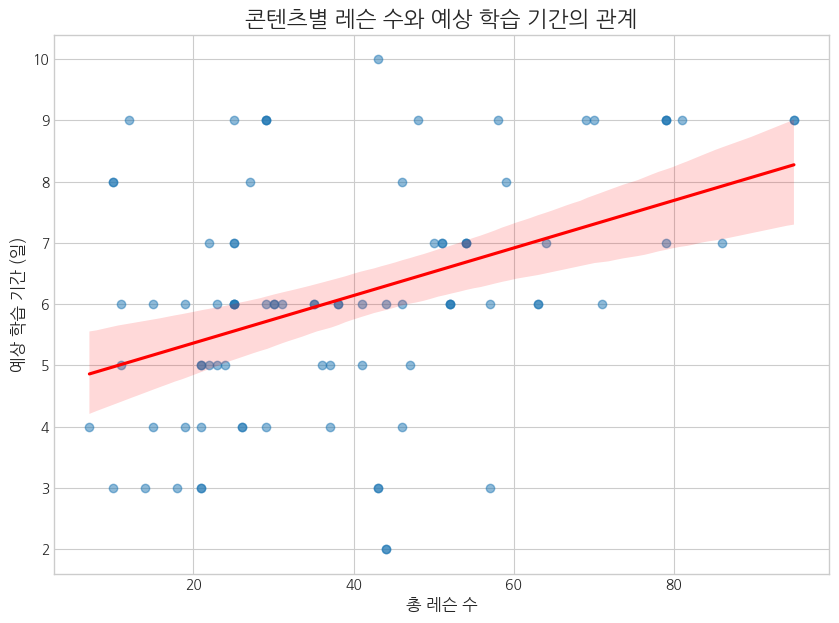



  [분석 2] 난이도별 총 레슨 수 분포
              count   mean    std   min    25%   50%    75%   max
difficulty                                                       
advanced       34.0  41.47  23.60  10.0  23.50  36.0  56.25  95.0
beginner       12.0  33.00  20.28  11.0  17.25  28.5  45.00  79.0
hard            6.0  39.33  28.37  10.0  25.00  25.5  59.75  79.0
intermediate   36.0  40.11  18.16   7.0  25.75  39.5  51.25  95.0


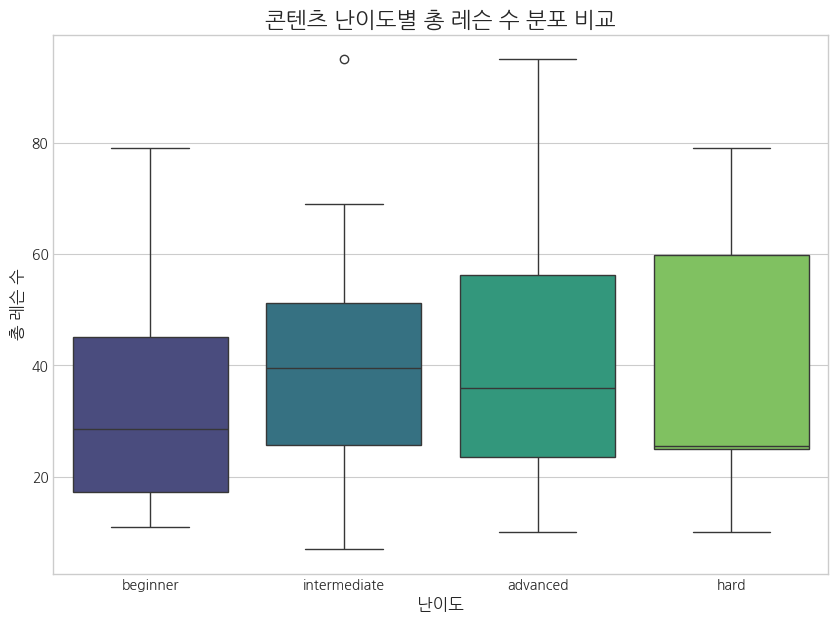



  [분석 3] 난이도별 예상 학습 기간 분포
              count  mean   std  min  25%  50%   75%   max
difficulty                                                
advanced       34.0  6.38  2.24  2.0  5.0  6.5  8.75  10.0
beginner       12.0  5.83  1.59  3.0  5.5  6.0  6.25   9.0
hard            6.0  6.50  1.76  4.0  6.0  6.0  7.50   9.0
intermediate   36.0  5.92  1.83  2.0  5.0  6.0  7.00   9.0


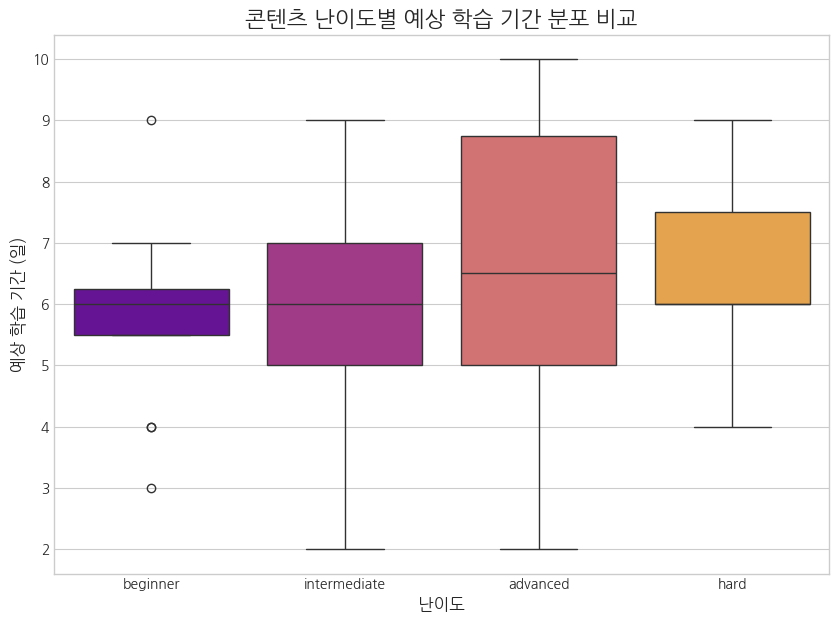

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

analysis_data = infomation_df.rename(columns={
    'content.difficulty': 'difficulty',
    'lesson_count': 'lesson_count',
    'studying_time(day)': 'learning_days'
})

# -------------------- 분석 1: 학습 기간 vs 레슨 수 (상관 관계) --------------------
print("="*40)
print("  [분석 1] 학습 기간과 레슨 수의 상관 관계")
print("="*40)

# 피어슨 상관 계수 계산
correlation = analysis_data['lesson_count'].corr(analysis_data['learning_days'])
print(f"\n피어슨 상관 계수: {correlation:.4f}")
if correlation > 0.7:
    print("-> 해석: 레슨 수와 학습 기간 사이에는 매우 강한 양의 상관관계가 있습니다.")
else:
    print("-> 해석: 레슨 수가 많을수록 학습 기간도 길어지는 경향이 있습니다.")

# 시각화: 산점도(Scatter Plot)와 추세선
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 7))
sns.regplot(data=analysis_data, x='lesson_count', y='learning_days',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('콘텐츠별 레슨 수와 예상 학습 기간의 관계', fontsize=16)
plt.xlabel('총 레슨 수', fontsize=12)
plt.ylabel('예상 학습 기간 (일)', fontsize=12)
plt.grid(True)
plt.show()


# -------------------- 분석 2: 난이도별 레슨 수 (그룹 비교) --------------------
print("\n\n" + "="*40)
print("  [분석 2] 난이도별 총 레슨 수 분포")
print("="*40)

# 난이도별 통계 요약
print(analysis_data.groupby('difficulty')['lesson_count'].describe().round(2))

# 시각화: 박스플롯(Box Plot)
difficulty_order = ['beginner', 'intermediate', 'advanced', 'hard'] # 난이도 순서 정렬
plt.figure(figsize=(10, 7))
sns.boxplot(data=analysis_data, x='difficulty', y='lesson_count', order=difficulty_order, palette='viridis')
plt.title('콘텐츠 난이도별 총 레슨 수 분포 비교', fontsize=16)
plt.xlabel('난이도', fontsize=12)
plt.ylabel('총 레슨 수', fontsize=12)
plt.show()


# -------------------- 분석 3: 난이도별 학습 기간 (그룹 비교) --------------------
print("\n\n" + "="*40)
print("  [분석 3] 난이도별 예상 학습 기간 분포")
print("="*40)

# 난이도별 통계 요약
print(analysis_data.groupby('difficulty')['learning_days'].describe().round(2))

# 시각화: 박스플롯(Box Plot)
plt.figure(figsize=(10, 7))
sns.boxplot(data=analysis_data, x='difficulty', y='learning_days', order=difficulty_order, palette='plasma')
plt.title('콘텐츠 난이도별 예상 학습 기간 분포 비교', fontsize=16)
plt.xlabel('난이도', fontsize=12)
plt.ylabel('예상 학습 기간 (일)', fontsize=12)
plt.show()

✅ 1단계: 각 비회원 세션이 경험한 콘텐츠의 '평균 난이도'를 계산합니다...
  - 총 89,080개의 비회원 세션에 대한 평균 난이도를 계산했습니다.

✅ 2단계: 평균 난이도 점수에 따라 세션을 그룹으로 분리합니다...
difficulty_segment
중급 위주 경험    40627
고급 위주 경험    28829
초급 위주 경험    19624
Name: count, dtype: int64

✅ 3단계: 각 그룹의 '가입 전환율'을 계산하고 비교합니다...


--- [가설 검증 최종 결과] 경험 난이도별 가입 전환율 ---
                    전체 세션 수(분모)  가입 전환 수(분자)  가입 전환율(%)
difficulty_segment                                     
중급 위주 경험                  40627         3362       8.28
고급 위주 경험                  28829         1986       6.89
초급 위주 경험                  19624          982       5.00


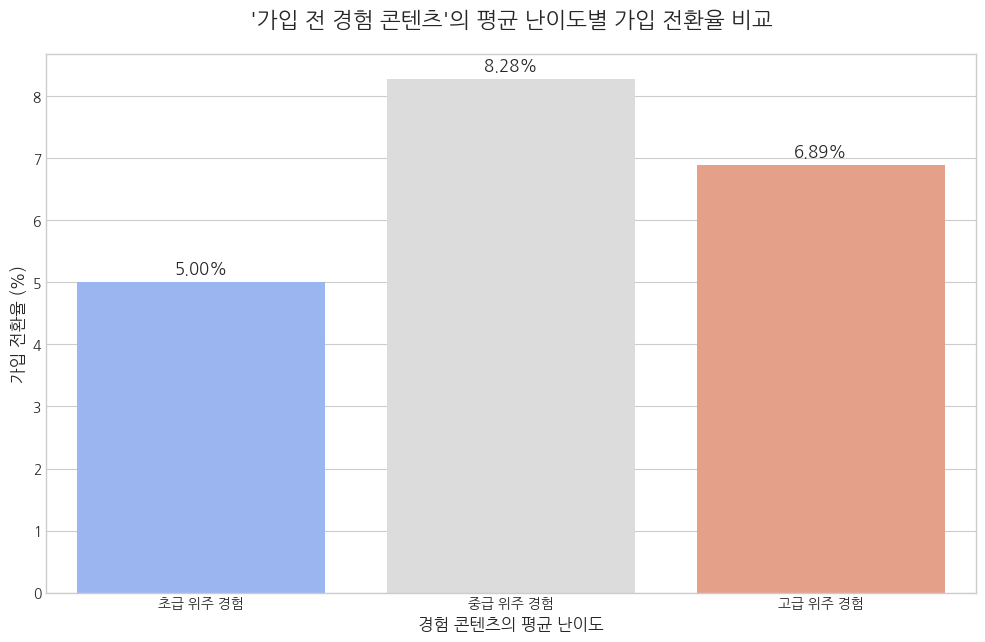

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- 1단계: 각 비회원 세션의 '평균 난이도' 계산 --------------------
print("✅ 1단계: 각 비회원 세션이 경험한 콘텐츠의 '평균 난이도'를 계산합니다...")

# 1-1. 비회원 로그에 난이도 정보 병합
#      분석의 안정성을 위해 필요한 컬럼만 선택하고, 결측값은 미리 제거합니다.
non_member_logs_with_difficulty = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'content.id']],
    infomation_df[['content.id', 'content.difficulty']].dropna(),
    on='content.id',
    how='inner' # 난이도 정보가 있는 로그만 대상으로 함
)

# 1-2. 난이도를 숫자로 변환하기 위한 매핑(mapping) 정의
#      (실제 난이도 이름에 맞게 수정해야 할 수 있습니다.)
difficulty_map = {'beginner': 1, 'intermediate': 2, 'advanced': 3, 'hard': 4}
non_member_logs_with_difficulty['difficulty_score'] = non_member_logs_with_difficulty['content.difficulty'].map(difficulty_map)

# 1-3. 각 세션별로 경험한 콘텐츠의 '평균 난이도 점수'를 계산합니다.
session_avg_difficulty = non_member_logs_with_difficulty.groupby(['date', 'fingerprint'])['difficulty_score'].mean()
session_avg_difficulty = session_avg_difficulty.to_frame(name='avg_difficulty_score')

print(f"  - 총 {len(session_avg_difficulty):,}개의 비회원 세션에 대한 평균 난이도를 계산했습니다.")


# -------------------- 2단계: '평균 난이도'에 따라 그룹 분리 --------------------
print("\n✅ 2단계: 평균 난이도 점수에 따라 세션을 그룹으로 분리합니다...")

# 평균 점수를 기준으로 그룹 라벨을 부여합니다. (pd.cut 사용)
bins = [0, 1.5, 2.5, float('inf')] # 1.5 미만: 초급, 1.5~2.5: 중급, 2.5 초과: 고급
labels = ['초급 위주 경험', '중급 위주 경험', '고급 위주 경험']
session_avg_difficulty['difficulty_segment'] = pd.cut(
    session_avg_difficulty['avg_difficulty_score'],
    bins=bins,
    labels=labels,
    right=False # 왼쪽 경계는 포함, 오른쪽 경계는 미포함
)

# 각 그룹의 '전체 모수(분모)'를 계산합니다.
total_pool_by_difficulty = session_avg_difficulty['difficulty_segment'].value_counts()
print(total_pool_by_difficulty)


# -------------------- 3단계: 그룹별 '가입 전환율' 계산 및 비교 --------------------
print("\n✅ 3단계: 각 그룹의 '가입 전환율'을 계산하고 비교합니다...")

# 가입에 성공한 세션 목록을 가져옵니다.
converted_sessions = complete_signup_df[['date', 'fingerprint']].drop_duplicates()
converted_sessions['converted'] = True # 가입 여부 표시

# 세션별 평균 난이도 정보와 가입 정보를 합칩니다.
conversion_analysis_df = pd.merge(
    session_avg_difficulty,
    converted_sessions,
    on=['date', 'fingerprint'],
    how='left'
).fillna({'converted': False}) # 가입 기록이 없으면 False로 채움

# 각 난이도 그룹별 '가입자 수(분자)'를 계산합니다.
converters_by_difficulty = conversion_analysis_df[conversion_analysis_df['converted'] == True]['difficulty_segment'].value_counts()

# 최종 전환율 계산 테이블을 생성합니다.
final_conversion_df = pd.DataFrame({
    '전체 세션 수(분모)': total_pool_by_difficulty,
    '가입 전환 수(분자)': converters_by_difficulty
}).fillna(0)

final_conversion_df['가입 전환율(%)'] = \
    (final_conversion_df['가입 전환 수(분자)'] / final_conversion_df['전체 세션 수(분모)']) * 100

print("\n\n--- [가설 검증 최종 결과] 경험 난이도별 가입 전환율 ---")
print(final_conversion_df.round(2))


# -------------------- 4단계: 최종 시각화 --------------------
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=final_conversion_df, x=final_conversion_df.index, y='가입 전환율(%)', palette='coolwarm', order=labels)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title("'가입 전 경험 콘텐츠'의 평균 난이도별 가입 전환율 비교", fontsize=16, pad=20)
plt.xlabel('경험 콘텐츠의 평균 난이도', fontsize=12)
plt.ylabel('가입 전환율 (%)', fontsize=12)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# [가정] 이전 분석 단계에서 아래 두 변수가 모두 정확하게 계산된 상태여야 합니다.
# 1. total_pool_by_difficulty: 각 난이도 그룹별 '전체 세션 수(분모)'
# 2. converters_by_difficulty: 각 난이도 그룹별 '가입 전환 수(분자)'

# -------------------- 1단계: 카이제곱 검정을 위한 분할표(Contingency Table) 생성 --------------------
print("✅ 1단계: 카이제곱 검정을 위한 데이터 준비를 시작합니다...")

# 최종 전환율 계산 테이블을 다시 만듭니다. (이전 코드 재사용)
final_conversion_df = pd.DataFrame({
    '전체 세션 수': total_pool_by_difficulty,
    '가입 전환 수': converters_by_difficulty
}).fillna(0)

# [핵심] 각 그룹의 '비가입' 수를 계산합니다. (전체 - 가입)
final_conversion_df['비가입 수'] = final_conversion_df['전체 세션 수'] - final_conversion_df['가입 전환 수']

# 검정에 사용할 '가입'과 '비가입' 데이터만 추출합니다.
observed_values = final_conversion_df[['가입 전환 수', '비가입 수']].values

print("\n--- [분할표] 카이제곱 검정 입력 데이터 ---")
print(final_conversion_df[['가입 전환 수', '비가입 수']])


# -------------------- 2단계: 카이제곱 검정 수행 및 결과 해석 --------------------
print("\n✅ 2단계: 카이제곱 검정을 수행하고 결과를 해석합니다...")

# scipy.stats 라이브러리의 chi2_contingency 함수를 사용합니다.
chi2_statistic, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- 카이제곱 검정 결과 ---")
print(f"카이제곱 통계량 (Chi-squared Statistic): {chi2_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# p-value를 기준으로 통계적 결론을 내립니다.
alpha = 0.05  # 유의수준 5% (업계 표준)

print("\n--- 최종 결론 ---")
if p_value < alpha:
    print(f"✅ p-value ({p_value:.4f})가 유의수준 ({alpha})보다 작습니다.")
    print("   따라서, '세 그룹의 전환율이 모두 같다'는 귀무가설을 기각합니다.")
    print("   결론: 가입 전 경험한 콘텐츠의 평균 난이도에 따라, 가입 전환율에는 통계적으로 유의미한 차이가 존재합니다.")
else:
    print(f"❌ p-value ({p_value:.4f})가 유의수준 ({alpha})보다 크거나 같습니다.")
    print("   따라서, '세 그룹의 전환율이 모두 같다'는 귀무가설을 기각할 수 없습니다.")
    print("   결론: 세 그룹 간의 가입 전환율 차이가 통계적으로 유의미하다고 말할 수 없습니다.")

✅ 1단계: 카이제곱 검정을 위한 데이터 준비를 시작합니다...

--- [분할표] 카이제곱 검정 입력 데이터 ---
                    가입 전환 수  비가입 수
difficulty_segment                
중급 위주 경험               3362  37265
고급 위주 경험               1986  26843
초급 위주 경험                982  18642

✅ 2단계: 카이제곱 검정을 수행하고 결과를 해석합니다...

--- 카이제곱 검정 결과 ---
카이제곱 통계량 (Chi-squared Statistic): 217.5505
p-value: 0.0000

--- 최종 결론 ---
✅ p-value (0.0000)가 유의수준 (0.05)보다 작습니다.
   따라서, '세 그룹의 전환율이 모두 같다'는 귀무가설을 기각합니다.
   결론: 가입 전 경험한 콘텐츠의 평균 난이도에 따라, 가입 전환율에는 통계적으로 유의미한 차이가 존재합니다.


✅ 1단계: 각 비회원 세션이 경험한 콘텐츠의 '평균 난이도'를 계산합니다...
  - 총 89,080개의 비회원 세션에 대한 평균 난이도를 계산했습니다.

✅ 2단계: 평균 난이도 점수에 따라 세션을 그룹으로 분리합니다...
difficulty_segment
중급 위주 경험    40627
고급 위주 경험    28829
초급 위주 경험    19624
Name: count, dtype: int64

✅ 3단계: 각 그룹의 가입자 식별 및 LTV 지표를 계산합니다...


--- [가설 검증 최종 결과] 경험 난이도별 장기 가치(LTV) 비교 ---
          구독 전환율(%)  1인당 평균 갱신 횟수
초급 위주 경험      11.15          0.09
중급 위주 경험      10.79          0.11
고급 위주 경험      10.57          0.08


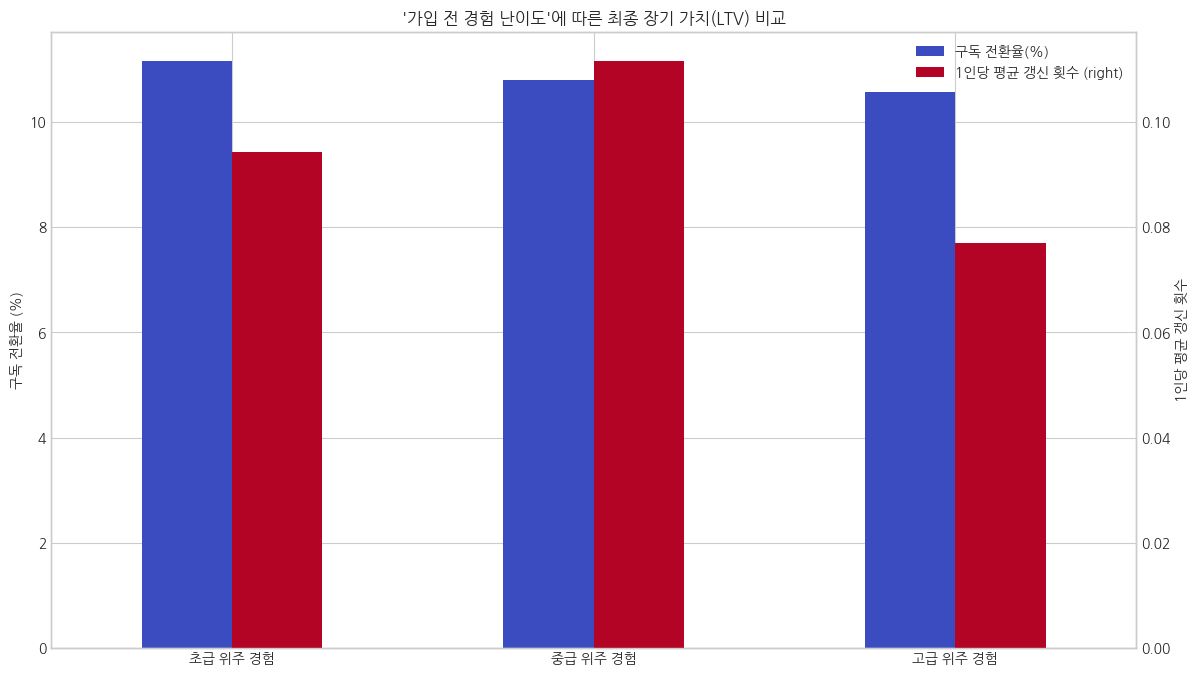

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- 1단계: 각 비회원 세션의 '평균 난이도' 계산 --------------------
print("✅ 1단계: 각 비회원 세션이 경험한 콘텐츠의 '평균 난이도'를 계산합니다...")

# 1-1. 비회원 로그에 난이도 정보 병합
#      분석의 안정성을 위해 필요한 컬럼만 선택하고, 결측값은 미리 제거합니다.
non_member_logs_with_difficulty = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'content.id']],
    infomation_df[['content.id', 'content.difficulty']].dropna(),
    on='content.id',
    how='inner' # 난이도 정보가 있는 로그만 대상으로 함
)

# 1-2. 난이도를 숫자로 변환하기 위한 매핑(mapping) 정의
#      (실제 난이도 이름에 맞게 수정해야 할 수 있습니다.)
difficulty_map = {'beginner': 1, 'intermediate': 2, 'advanced': 3, 'hard': 4}
non_member_logs_with_difficulty['difficulty_score'] = non_member_logs_with_difficulty['content.difficulty'].map(difficulty_map)

# 1-3. 각 세션별로 경험한 콘텐츠의 '평균 난이도 점수'를 계산합니다.
session_avg_difficulty = non_member_logs_with_difficulty.groupby(['date', 'fingerprint'])['difficulty_score'].mean()
session_avg_difficulty = session_avg_difficulty.to_frame(name='avg_difficulty_score')

print(f"  - 총 {len(session_avg_difficulty):,}개의 비회원 세션에 대한 평균 난이도를 계산했습니다.")


# -------------------- 2단계: '평균 난이도'에 따라 그룹 분리 --------------------
print("\n✅ 2단계: 평균 난이도 점수에 따라 세션을 그룹으로 분리합니다...")

# 평균 점수를 기준으로 그룹 라벨을 부여합니다. (pd.cut 사용)
bins = [0, 1.5, 2.5, float('inf')] # 1.5 미만: 초급, 1.5~2.5: 중급, 2.5 초과: 고급
labels = ['초급 위주 경험', '중급 위주 경험', '고급 위주 경험']
session_avg_difficulty['difficulty_segment'] = pd.cut(
    session_avg_difficulty['avg_difficulty_score'],
    bins=bins,
    labels=labels,
    right=False # 왼쪽 경계는 포함, 오른쪽 경계는 미포함
)

# 각 그룹의 '전체 모수(분모)'를 계산합니다.
total_pool_by_difficulty = session_avg_difficulty['difficulty_segment'].value_counts()
print(total_pool_by_difficulty)

# -------------------- [수정] 3단계: 그룹별 '가입' 및 'LTV' 지표 계산 --------------------
print("\n✅ 3단계: 각 그룹의 가입자 식별 및 LTV 지표를 계산합니다...")

# 3-1. 가입에 성공한 세션의 'user_id'를 가져옵니다.
converted_sessions_with_id = pd.merge(
    session_avg_difficulty.reset_index(), # 인덱스(date, fingerprint)를 컬럼으로 변환
    complete_signup_df[['date', 'fingerprint', 'user_id']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)

# 3-2. 각 '난이도 그룹'별로 가입한 user_id 목록(set)을 만듭니다.
beginner_users = set(converted_sessions_with_id[converted_sessions_with_id['difficulty_segment'] == '초급 위주 경험']['user_id'].unique())
intermediate_users = set(converted_sessions_with_id[converted_sessions_with_id['difficulty_segment'] == '중급 위주 경험']['user_id'].unique())
advanced_users = set(converted_sessions_with_id[converted_sessions_with_id['difficulty_segment'] == '고급 위주 경험']['user_id'].unique())


# 3-3. 각 그룹별로 LTV 지표(구독 전환율, 평균 갱신 횟수)를 계산합니다.
def calculate_ltv_by_userid(user_set, subscribe_df, renew_df):
    """user_id 목록을 받아, 해당 그룹의 구독 전환율과 평균 갱신 횟수를 계산"""
    total_users = len(user_set)
    if total_users == 0: return 0, 0

    subscribers_in_group = len(subscribe_df[subscribe_df['user_id'].isin(user_set)])
    conversion_rate = (subscribers_in_group / total_users * 100)

    total_renews_in_group = len(renew_df[renew_df['user_id'].isin(user_set)])
    avg_renews = total_renews_in_group / total_users

    return conversion_rate, avg_renews

cr_beginner, ltv_beginner = calculate_ltv_by_userid(beginner_users, sub_df, renew_df)
cr_intermediate, ltv_intermediate = calculate_ltv_by_userid(intermediate_users, sub_df, renew_df)
cr_advanced, ltv_advanced = calculate_ltv_by_userid(advanced_users, sub_df, renew_df)


# -------------------- 4단계: 최종 결과 종합 및 시각화 --------------------
# 최종 결과 데이터프레임 생성
ltv_by_difficulty_df = pd.DataFrame({
    '구독 전환율(%)': [cr_beginner, cr_intermediate, cr_advanced],
    '1인당 평균 갱신 횟수': [ltv_beginner, ltv_intermediate, ltv_advanced]
}, index=['초급 위주 경험', '중급 위주 경험', '고급 위주 경험'])

print("\n\n--- [가설 검증 최종 결과] 경험 난이도별 장기 가치(LTV) 비교 ---")
print(ltv_by_difficulty_df.round(2))

# 시각화 (이중 축 차트)
plt.rc('font', family='NanumGothic')
ax = ltv_by_difficulty_df.plot(
    kind='bar',
    figsize=(14, 8),
    rot=0,
    secondary_y='1인당 평균 갱신 횟수', # 이중 축 사용
    colormap='coolwarm',
    title="'가입 전 경험 난이도'에 따른 최종 장기 가치(LTV) 비교"
)
ax.set_ylabel('구독 전환율 (%)')
ax.right_ax.set_ylabel('1인당 평균 갱신 횟수')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency  # 카이제곱 검정
from scipy.stats import f_oneway          # ANOVA

# -------------------- 1. 구독 전환율 차이 검증 (카이제곱 검정) --------------------
print("="*40)
print("  [검증 1] 세 그룹 간 구독 전환율 차이 통계적 검증")
print("="*40)

# 1-1. 카이제곱 검정을 위한 분할표(Contingency Table) 생성
# 각 그룹의 '구독자' 수
subscribers_beginner = len(sub_df[sub_df['user_id'].isin(beginner_users)])
subscribers_intermediate = len(sub_df[sub_df['user_id'].isin(intermediate_users)])
subscribers_advanced = len(sub_df[sub_df['user_id'].isin(advanced_users)])

# 각 그룹의 '비구독자' 수 (가입은 했지만 구독은 안 한 사람)
non_subscribers_beginner = len(beginner_users) - subscribers_beginner
non_subscribers_intermediate = len(intermediate_users) - subscribers_intermediate
non_subscribers_advanced = len(advanced_users) - subscribers_advanced

# 3x2 분할표 데이터
observed_values_sub = [
    [subscribers_beginner, non_subscribers_beginner],
    [subscribers_intermediate, non_subscribers_intermediate],
    [subscribers_advanced, non_subscribers_advanced]
]

# 1-2. 카이제곱 검정 수행
chi2, p_value_sub, _, _ = chi2_contingency(observed_values_sub)

print(f"\n--- 카이제곱 검정 결과 ---")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p_value_sub:.4f}")

# 1-3. p-value 해석
alpha = 0.05
print("\n--- 결론 (구독 전환율) ---")
if p_value_sub < alpha:
    print(f"✅ p-value ({p_value_sub:.4f})가 유의수준 ({alpha})보다 작으므로, 통계적으로 유의미한 차이가 있습니다.")
    print("   결론: 가입 전 경험한 콘텐츠의 평균 난이도는 '구독 전환율'에 유의미한 영향을 미칩니다.")
else:
    print(f"❌ p-value ({p_value_sub:.4f})가 유의수준 ({alpha})보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.")


# -------------------- 2. 평균 갱신 횟수(LTV) 차이 검증 (ANOVA) --------------------
print("\n\n" + "="*40)
print("  [검증 2] 세 그룹 간 평균 갱신 횟수(LTV) 차이 통계적 검증")
print("="*40)

# 2-1. ANOVA를 위한 데이터 준비: 각 사용자별 '갱신 횟수'를 계산
renew_counts_per_user = renew_df['user_id'].value_counts()

# 각 그룹에 속한 사용자들의 갱신 횟수만 Series 형태로 추출
# (갱신 기록이 없는 사용자는 0으로 처리해야 정확한 평균 비교가 가능합니다)
def get_renew_counts(user_set, renew_counts):
    return pd.Series(list(user_set)).map(renew_counts).fillna(0)

renew_data_beginner = get_renew_counts(beginner_users, renew_counts_per_user)
renew_data_intermediate = get_renew_counts(intermediate_users, renew_counts_per_user)
renew_data_advanced = get_renew_counts(advanced_users, renew_counts_per_user)

# 2-2. 일원분산분석 (ANOVA) 수행
f_statistic, p_value_ltv = f_oneway(renew_data_beginner, renew_data_intermediate, renew_data_advanced)

print(f"\n--- ANOVA 검정 결과 ---")
print(f"F-통계량: {f_statistic:.4f}")
print(f"p-value: {p_value_ltv:.4f}")

# 2-3. p-value 해석
print("\n--- 결론 (평균 갱신 횟수) ---")
if p_value_ltv < alpha:
    print(f"✅ p-value ({p_value_ltv:.4f})가 유의수준 ({alpha})보다 작으므로, 통계적으로 유의미한 차이가 있습니다.")
    print("   결론: 가입 전 경험한 콘텐츠의 평균 난이도는 '평균 갱신 횟수(LTV)'에 유의미한 영향을 미칩니다.")
else:
    print(f"❌ p-value ({p_value_ltv:.4f})가 유의수준 ({alpha})보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.")

  [검증 1] 세 그룹 간 구독 전환율 차이 통계적 검증

--- 카이제곱 검정 결과 ---
카이제곱 통계량: 0.2968
p-value: 0.8621

--- 결론 (구독 전환율) ---
❌ p-value (0.8621)가 유의수준 (0.05)보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.


  [검증 2] 세 그룹 간 평균 갱신 횟수(LTV) 차이 통계적 검증

--- ANOVA 검정 결과 ---
F-통계량: 2.9454
p-value: 0.0526

--- 결론 (평균 갱신 횟수) ---
❌ p-value (0.0526)가 유의수준 (0.05)보다 크므로, 통계적으로 유의미한 차이라고 보기 어렵습니다.


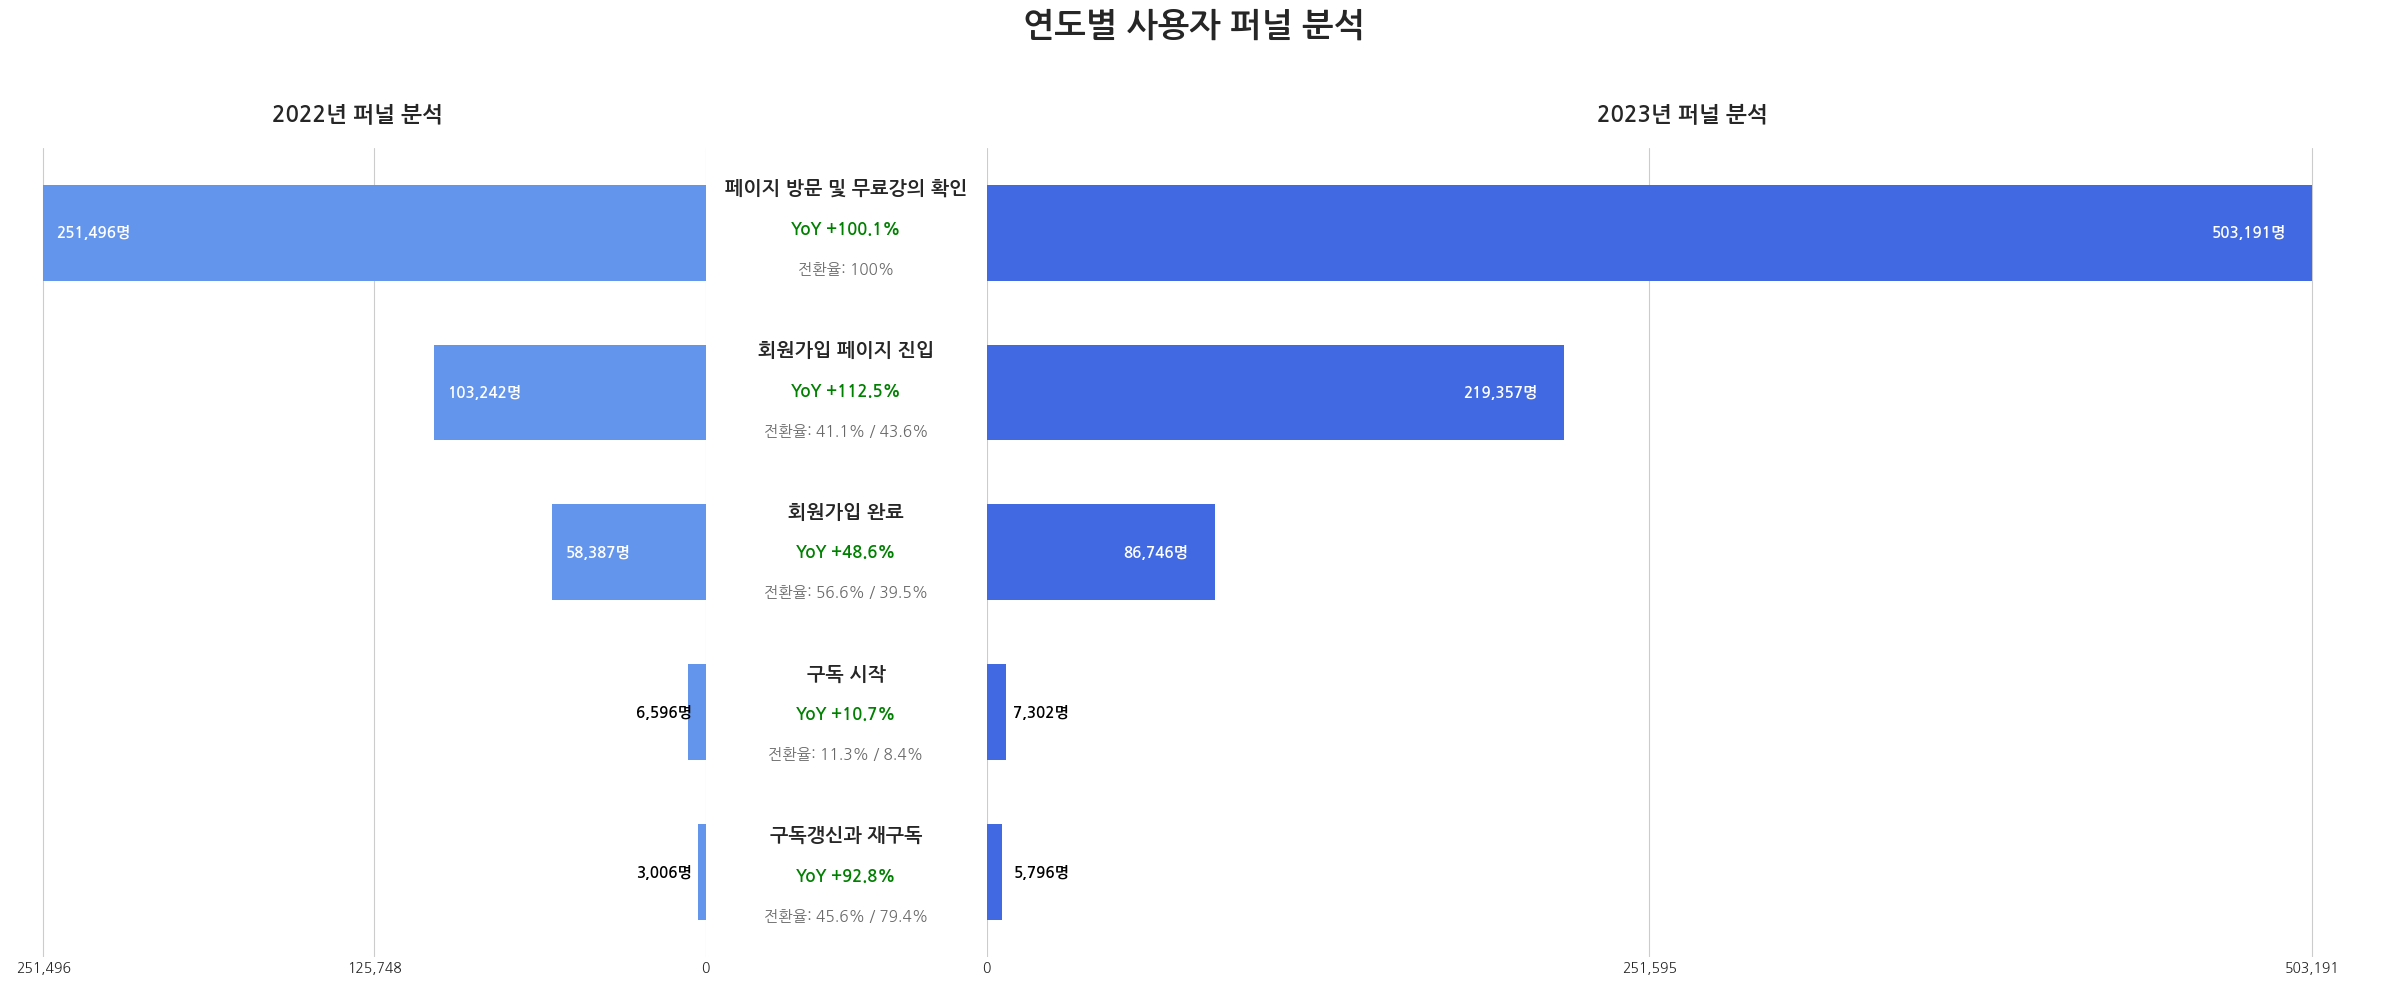

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- 1단계: 데이터 준비 및 지표 계산 (동일) --------------------
# (이전 코드와 동일하게 df를 준비합니다)
data = {
    '단계': ['페이지 방문 및 무료강의 확인', '회원가입 페이지 진입', '회원가입 완료', '구독 시작', '구독갱신과 재구독'],
    '2022년': [251496, 103242, 58387, 6596, 3006],
    '2023년': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('단계')
df['YoY_성장률(%)'] = (df['2023년'] - df['2022년']) / df['2022년'] * 100
df['2022_전환율(%)'] = (df['2022년'] / df['2022년'].shift(1) * 100).fillna(100)
df['2023_전환율(%)'] = (df['2023년'] / df['2023년'].shift(1) * 100).fillna(100)


# -------------------- 2단계: 업그레이드된 시각화 함수 정의 --------------------
def plot_funnel_infographic(ax, data, title, color, align='left'):
    """퍼널 차트의 한쪽 면을 그리는 함수 (텍스트 없음)"""
    y_pos = np.arange(len(data))

    # [핵심] 막대를 왼쪽 또는 오른쪽으로 정렬하여 중앙에 공간 확보
    if align == 'left':
        # 왼쪽 그래프는 음수 방향으로 그려서 오른쪽으로 정렬된 것처럼 보이게 함
        ax.barh(y_pos, -data, color=color, height=0.6, align='center')
        ax.set_xticks([-data.iloc[0], -data.iloc[0]/2, 0])
        ax.set_xticklabels([f'{int(data.iloc[0]):,}', f'{int(data.iloc[0]/2):,}', '0'], fontsize=10)
    else: # align == 'right'
        ax.barh(y_pos, data, color=color, height=0.6, align='center')
        ax.set_xticks([0, data.iloc[0]/2, data.iloc[0]])
        ax.set_xticklabels(['0', f'{int(data.iloc[0]/2):,}', f'{int(data.iloc[0]):,}'], fontsize=10)

    ax.set_yticks([]) # y축 눈금은 중앙 텍스트로 대체
    ax.invert_yaxis()
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_title(title, fontsize=16, weight='bold', pad=20)

    # 막대 안에 값 표시
    for i, value in enumerate(data):
        text_color = 'white'
        if align == 'left':
            ha = 'left'
            x_pos = -value + (data.iloc[0] * 0.02)
        else:
            ha = 'right'
            x_pos = value - (data.iloc[0] * 0.02)

        # 막대가 너무 좁으면 텍스트 색 변경
        if value < data.iloc[0] * 0.1:
            text_color = 'black'
            ha = 'right' if align == 'left' else 'left'
            x_pos = -data.iloc[0] * 0.02 if align == 'left' else data.iloc[0] * 0.02

        ax.text(x_pos, i, f'{value:,}명', ha=ha, va='center', color=text_color, fontsize=11, weight='bold')

# -------------------- 3단계: 최종 리포트 시각화 (수정 완료) --------------------
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# [핵심] 3개의 subplot을 만듭니다 (왼쪽 퍼널, 중앙 텍스트, 오른쪽 퍼널)
fig, axes = plt.subplots(1, 3, figsize=(24, 10),
                         gridspec_kw={'width_ratios': [df['2022년'].max(), 1, df['2023년'].max()]})
fig.suptitle('연도별 사용자 퍼널 분석', fontsize=24, weight='bold')

# --- 왼쪽: 2022년 퍼널 ---
plot_funnel_infographic(axes[0], df['2022년'], '2022년 퍼널 분석', 'cornflowerblue', align='left')

# --- 오른쪽: 2023년 퍼널 ---
plot_funnel_infographic(axes[2], df['2023년'], '2023년 퍼널 분석', 'royalblue', align='right')

# --- 중앙: 텍스트 정보 ---
ax_center = axes[1]
ax_center.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax_center.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax_center.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax_center.set_ylim(len(df)-0.5, -0.5) # y축 범위 맞추기

for i, stage in enumerate(df.index):
    # 단계 이름
    ax_center.text(0.5, i-0.25, stage, ha='center', va='center', fontsize=14, weight='bold')

    # YoY 성장률
    growth = df['YoY_성장률(%)'].iloc[i]
    growth_text = f'YoY {growth:+.1f}%'
    growth_color = 'green' if growth > 0 else 'red'
    ax_center.text(0.5, i, growth_text, ha='center', va='center', color=growth_color, fontsize=12, weight='bold')

    # 전환율 (2022년 / 2023년)
    conv_22 = df['2022_전환율(%)'].iloc[i]
    conv_23 = df['2023_전환율(%)'].iloc[i]
    conv_text = f'전환율: {conv_22:.1f}% / {conv_23:.1f}%'
    if i == 0: conv_text = '전환율: 100%'
    ax_center.text(0.5, i+0.25, conv_text, ha='center', va='center', color='dimgray', fontsize=11, style='italic')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

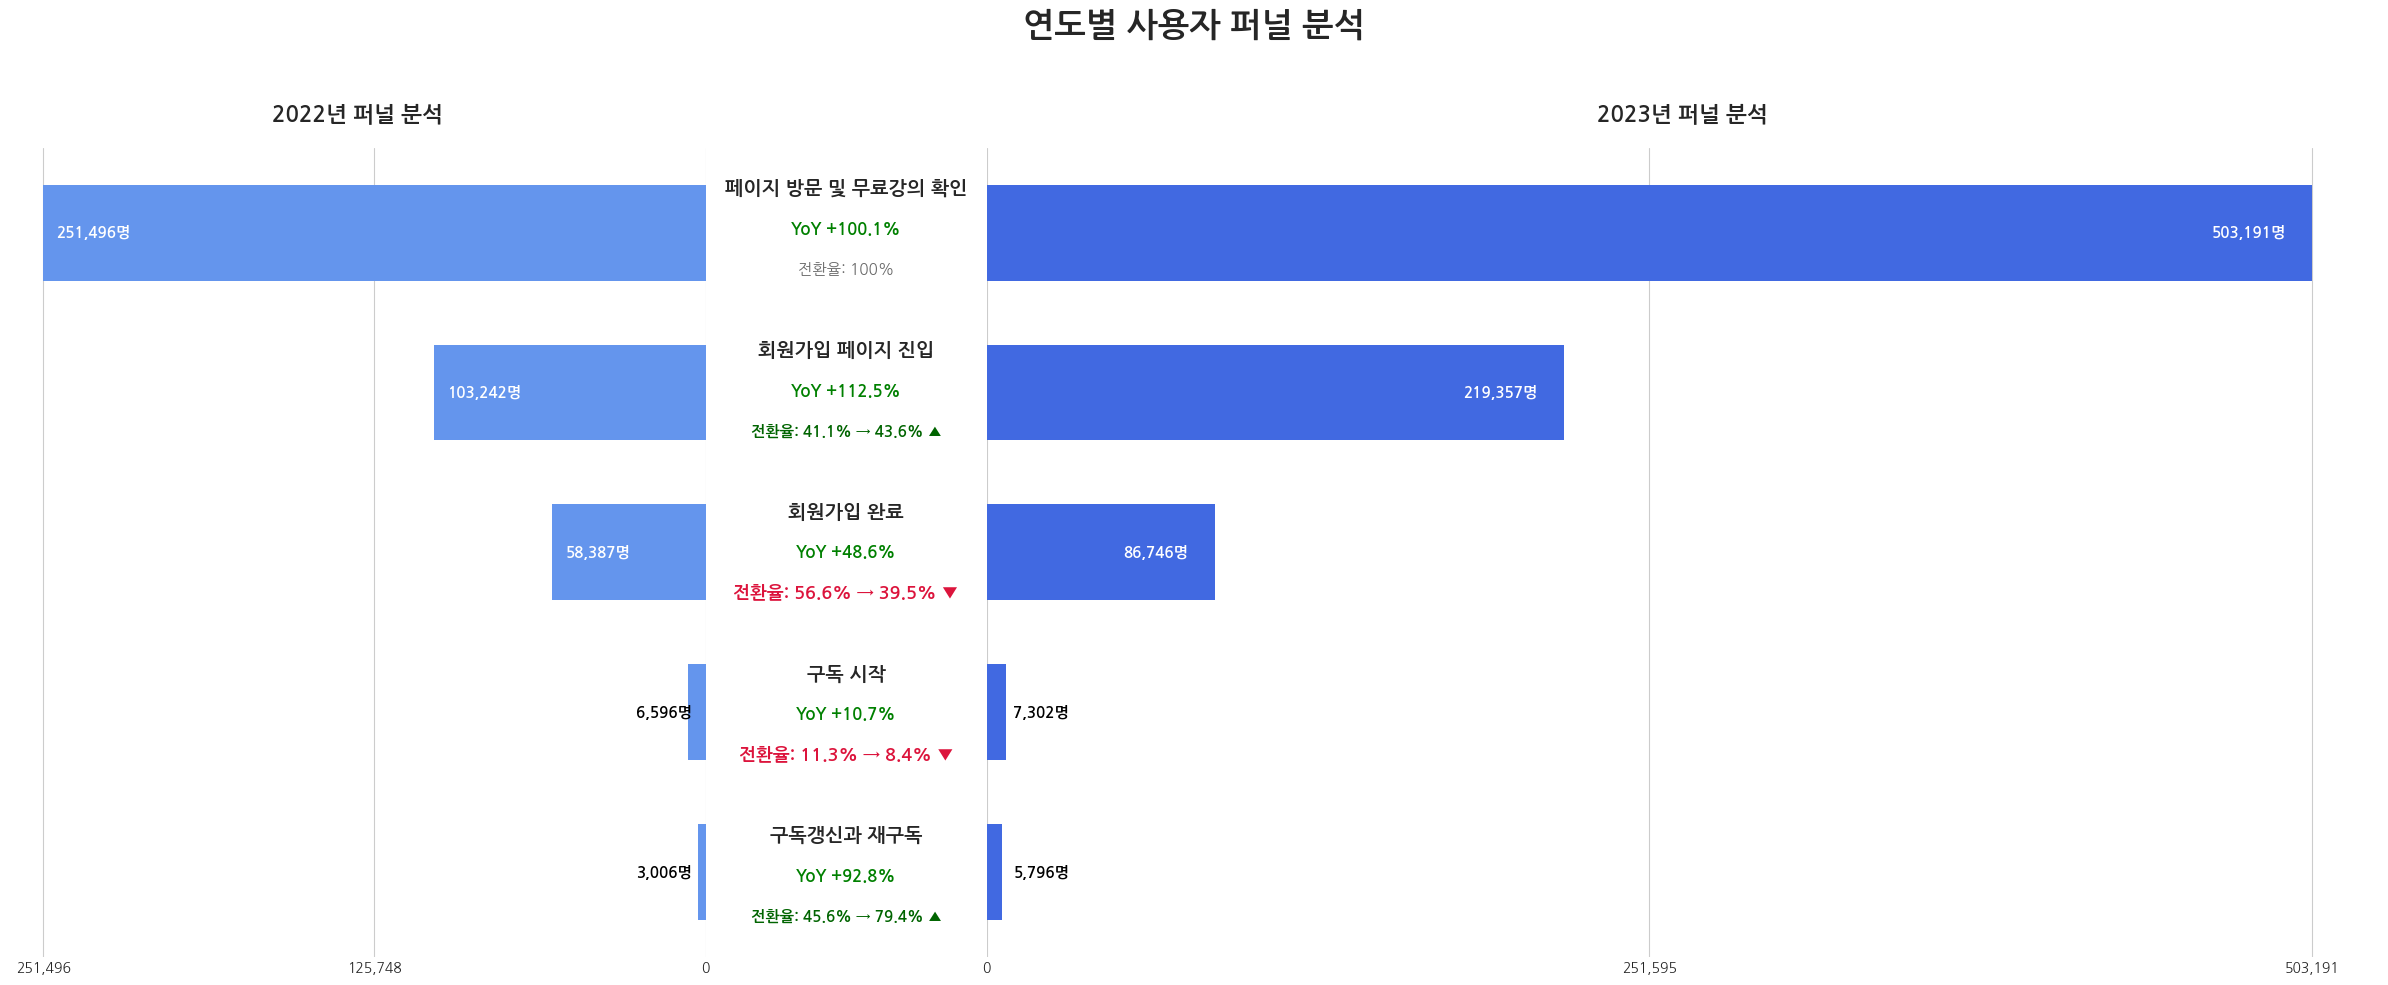

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- 1단계: 데이터 준비 및 지표 계산 (동일) --------------------
# (이전 코드와 동일하게 df를 준비합니다)
data = {
    '단계': ['페이지 방문 및 무료강의 확인', '회원가입 페이지 진입', '회원가입 완료', '구독 시작', '구독갱신과 재구독'],
    '2022년': [251496, 103242, 58387, 6596, 3006],
    '2023년': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('단계')
df['YoY_성장률(%)'] = (df['2023년'] - df['2022년']) / df['2022년'] * 100
df['2022_전환율(%)'] = (df['2022년'] / df['2022년'].shift(1) * 100).fillna(100)
df['2023_전환율(%)'] = (df['2023년'] / df['2023년'].shift(1) * 100).fillna(100)


# -------------------- 2단계: 업그레이드된 시각화 함수 정의 --------------------
def plot_funnel_infographic(ax, data, title, color, align='left'):
    """퍼널 차트의 한쪽 면을 그리는 함수 (텍스트 없음)"""
    y_pos = np.arange(len(data))

    # [핵심] 막대를 왼쪽 또는 오른쪽으로 정렬하여 중앙에 공간 확보
    if align == 'left':
        # 왼쪽 그래프는 음수 방향으로 그려서 오른쪽으로 정렬된 것처럼 보이게 함
        ax.barh(y_pos, -data, color=color, height=0.6, align='center')
        ax.set_xticks([-data.iloc[0], -data.iloc[0]/2, 0])
        ax.set_xticklabels([f'{int(data.iloc[0]):,}', f'{int(data.iloc[0]/2):,}', '0'], fontsize=10)
    else: # align == 'right'
        ax.barh(y_pos, data, color=color, height=0.6, align='center')
        ax.set_xticks([0, data.iloc[0]/2, data.iloc[0]])
        ax.set_xticklabels(['0', f'{int(data.iloc[0]/2):,}', f'{int(data.iloc[0]):,}'], fontsize=10)

    ax.set_yticks([]) # y축 눈금은 중앙 텍스트로 대체
    ax.invert_yaxis()
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_title(title, fontsize=16, weight='bold', pad=20)

    # 막대 안에 값 표시
    for i, value in enumerate(data):
        text_color = 'white'
        if align == 'left':
            ha = 'left'
            x_pos = -value + (data.iloc[0] * 0.02)
        else:
            ha = 'right'
            x_pos = value - (data.iloc[0] * 0.02)

        # 막대가 너무 좁으면 텍스트 색 변경
        if value < data.iloc[0] * 0.1:
            text_color = 'black'
            ha = 'right' if align == 'left' else 'left'
            x_pos = -data.iloc[0] * 0.02 if align == 'left' else data.iloc[0] * 0.02

        ax.text(x_pos, i, f'{value:,}명', ha=ha, va='center', color=text_color, fontsize=11, weight='bold')
# -------------------- 3단계: 최종 리포트 시각화 (수정 완료) --------------------
# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3개의 subplot 생성 (이전과 동일)
fig, axes = plt.subplots(1, 3, figsize=(24, 10),
                         gridspec_kw={'width_ratios': [df['2022년'].max(), 1.2, df['2023년'].max()]}) # 중앙 공간 약간 넓힘
fig.suptitle('연도별 사용자 퍼널 분석', fontsize=24, weight='bold')

# --- 왼쪽: 2022년 퍼널 ---
plot_funnel_infographic(axes[0], df['2022년'], '2022년 퍼널 분석', 'cornflowerblue', align='left')

# --- 오른쪽: 2023년 퍼널 ---
plot_funnel_infographic(axes[2], df['2023년'], '2023년 퍼널 분석', 'royalblue', align='right')


# --- [핵심 수정] 중앙: 텍스트 정보 (조건부 서식 추가) ---
ax_center = axes[1]
ax_center.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax_center.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax_center.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax_center.set_ylim(len(df)-0.5, -0.5)

for i, stage in enumerate(df.index):
    # 단계 이름
    ax_center.text(0.5, i-0.25, stage, ha='center', va='center', fontsize=14, weight='bold')

    # YoY 성장률
    growth = df['YoY_성장률(%)'].iloc[i]
    growth_text = f'YoY {growth:+.1f}%'
    growth_color = 'green' if growth > 0 else 'red'
    ax_center.text(0.5, i, growth_text, ha='center', va='center', color=growth_color, fontsize=12, weight='bold')

    # [수정된 부분] 전환율 (조건부 서식 적용)
    conv_22 = df['2022_전환율(%)'].iloc[i]
    conv_23 = df['2023_전환율(%)'].iloc[i]

    # 기본 텍스트와 스타일 설정
    conv_text = f'전환율: {conv_22:.1f}% → {conv_23:.1f}%'
    text_color = 'dimgray'
    font_weight = 'normal'
    font_size = 11

    # 첫 단계는 100%로 고정
    if i == 0:
        conv_text = '전환율: 100%'
    # 전환율이 하락한 경우
    elif conv_23 < conv_22:
        arrow = '▼'
        conv_text = f'전환율: {conv_22:.1f}% → {conv_23:.1f}% {arrow}'
        text_color = 'crimson' # 진한 빨간색
        font_weight = 'bold'
        font_size = 13 # 글씨 크기 키움
    # (선택) 전환율이 상승한 경우
    elif conv_23 > conv_22:
        arrow = '▲'
        conv_text = f'전환율: {conv_22:.1f}% → {conv_23:.1f}% {arrow}'
        text_color = 'darkgreen' # 진한 초록색
        font_weight = 'bold'

    ax_center.text(0.5, i+0.25, conv_text, ha='center', va='center',
                   color=text_color, fontsize=font_size, weight=font_weight, style='italic')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [가정] 이전 단계에서 아래 변수들이 모두 준비된 상태
# 1. null_id_enter_lesson_df: 모든 비회원 로그 (핑거프린트와 date 컬럼이 추가된 상태)
# 2. id_info_df: content.id별 강의 구성(stream, practice 등) 정보가 담긴 데이터프레임
# 3. complete_signup_df: 회원가입 로그 (핑거프린트와 date 컬럼이 추가된 상태)


# -------------------- 1단계: '실습형' 콘텐츠 정의 --------------------
print("✅ 1단계: '실습형' 콘텐츠를 정의합니다...")
# 'practice' 컬럼의 오타를 수정했다고 가정
id_info_df['total_components'] = id_info_df[['stream', 'note', 'practice', 'quiz']].sum(axis=1)
id_info_df['practice_ratio'] = id_info_df['practice'] / id_info_df['total_components']
practice_heavy_content_ids = set(id_info_df[id_info_df['practice_ratio'] >= 0.3]['content.id'].unique())
print(f"  - 총 {len(id_info_df)}개 콘텐츠 중, {len(practice_heavy_content_ids)}개를 '실습형'으로 정의했습니다.")


# -------------------- 2단계: 비회원 세션을 세 그룹으로 분리 --------------------
print("\n✅ 2단계: 비회원 세션을 '실습형만', '강의형만', '혼합' 그룹으로 분리합니다...")
# 비회원 로그에 '실습형 여부'를 표시
non_member_logs_with_type = pd.merge(
    null_id_enter_lesson_df,
    id_info_df[['content.id']], # '실습형' 정의를 위해 id_info_df의 content.id를 사용
    on='content.id',
    how='left',
    indicator=True
)
non_member_logs_with_type['is_practice_heavy'] = non_member_logs_with_type['content.id'].isin(practice_heavy_content_ids)


# 각 세션별 경험 유형을 요약
session_experience_summary = non_member_logs_with_type.groupby(['date', 'fingerprint'])['is_practice_heavy'].agg(['any', 'all'])

# '실습형만' 그룹: 경험한 모든 것이 실습형 (all == True)
practice_only_sessions = set(session_experience_summary[session_experience_summary['all'] == True].index)
# '강의형만' 그룹: 경험한 모든 것이 강의형 (any == False)
lecture_only_sessions = set(session_experience_summary[session_experience_summary['any'] == False].index)
# '혼합' 그룹: 그 외 나머지
all_sessions = set(session_experience_summary.index)
mixed_sessions = all_sessions - practice_only_sessions - lecture_only_sessions

# 각 그룹의 '전체 모수(분모)'
total_pool_by_type = {
    '실습형만 경험': len(practice_only_sessions),
    '강의형만 경험': len(lecture_only_sessions),
    '혼합 경험': len(mixed_sessions)
}
print("  - 각 그룹별 전체 세션 수(분모):", total_pool_by_type)


# -------------------- 3단계: 그룹별 가입 전환율 계산 --------------------
print("\n✅ 3단계: 각 그룹의 가입 전환율을 계산합니다...")
# 가입에 성공한 세션 목록
converted_sessions = set(map(tuple, complete_signup_df[['date', 'fingerprint']].drop_duplicates().values))

# 각 그룹과 가입 세션의 교집합을 구하여 '가입 전환 수(분자)' 계산
conversions_practice_only = len(practice_only_sessions.intersection(converted_sessions))
conversions_lecture_only = len(lecture_only_sessions.intersection(converted_sessions))
conversions_mixed = len(mixed_sessions.intersection(converted_sessions))

# 전환율 계산
conv_rate_practice = (conversions_practice_only / total_pool_by_type['실습형만 경험'] * 100) if total_pool_by_type['실습형만 경험'] > 0 else 0
conv_rate_lecture = (conversions_lecture_only / total_pool_by_type['강의형만 경험'] * 100) if total_pool_by_type['강의형만 경험'] > 0 else 0
conv_rate_mixed = (conversions_mixed / total_pool_by_type['혼합 경험'] * 100) if total_pool_by_type['혼합 경험'] > 0 else 0

# 최종 결과 테이블
conversion_df = pd.DataFrame({
    '가입 전환율(%)': [conv_rate_practice, conv_rate_lecture, conv_rate_mixed]
}, index=['실습형만 경험', '강의형만 경험', '혼합 경험'])
print(conversion_df.round(2))


# -------------------- 4단계: '실습형만' vs '강의형만' 그룹 통계적 검증 --------------------
print("\n✅ 4단계: 카이제곱 검정으로 '실습형만' vs '강의형만' 그룹의 차이를 검증합니다...")
# 분할표 생성: [[실습-가입, 실습-비가입], [강의-가입, 강의-비가입]]
observed_values = [
    [conversions_practice_only, total_pool_by_type['실습형만 경험'] - conversions_practice_only],
    [conversions_lecture_only, total_pool_by_type['강의형만 경험'] - conversions_lecture_only]
]
chi2, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- 카이제곱 검정 결과 ---")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("   결론: 두 그룹 간의 가입 전환율 차이는 통계적으로 유의미합니다.")
else:
    print("   결론: 두 그룹 간의 가입 전환율 차이가 통계적으로 유의미하다고 보기 어렵습니다.")

✅ 1단계: '실습형' 콘텐츠를 정의합니다...
  - 총 151개 콘텐츠 중, 24개를 '실습형'으로 정의했습니다.

✅ 2단계: 비회원 세션을 '실습형만', '강의형만', '혼합' 그룹으로 분리합니다...
  - 각 그룹별 전체 세션 수(분모): {'실습형만 경험': 22034, '강의형만 경험': 51856, '혼합 경험': 15305}

✅ 3단계: 각 그룹의 가입 전환율을 계산합니다...
         가입 전환율(%)
실습형만 경험       4.59
강의형만 경험       5.70
혼합 경험        15.48

✅ 4단계: 카이제곱 검정으로 '실습형만' vs '강의형만' 그룹의 차이를 검증합니다...

--- 카이제곱 검정 결과 ---
카이제곱 통계량: 37.6630
p-value: 0.0000
   결론: 두 그룹 간의 가입 전환율 차이는 통계적으로 유의미합니다.


✅ 1단계: '실습형'과 '강의형' 콘텐츠를 정의합니다...

✅ 2단계: 비회원 세션을 새로운 세 그룹('강의형만', '혼합', '실습형')으로 분리합니다...
  - 각 그룹별 전체 세션 수(분모): {'실습형 경험': 37339, '강의형만 경험': 51856}

✅ 3단계: 각 그룹의 가입 전환율을 계산합니다...
         가입 전환율(%)
실습형 경험        9.05
강의형만 경험       5.70

✅ 4단계: 카이제곱 검정으로 차이를 검증하고 시각화합니다...

--- 카이제곱 검정 결과 (p-value): 0.0000 ---
카이제곱 통계량: 368.1105
   결론: 두 그룹 간의 가입 전환율 차이는 통계적으로 유의미합니다.


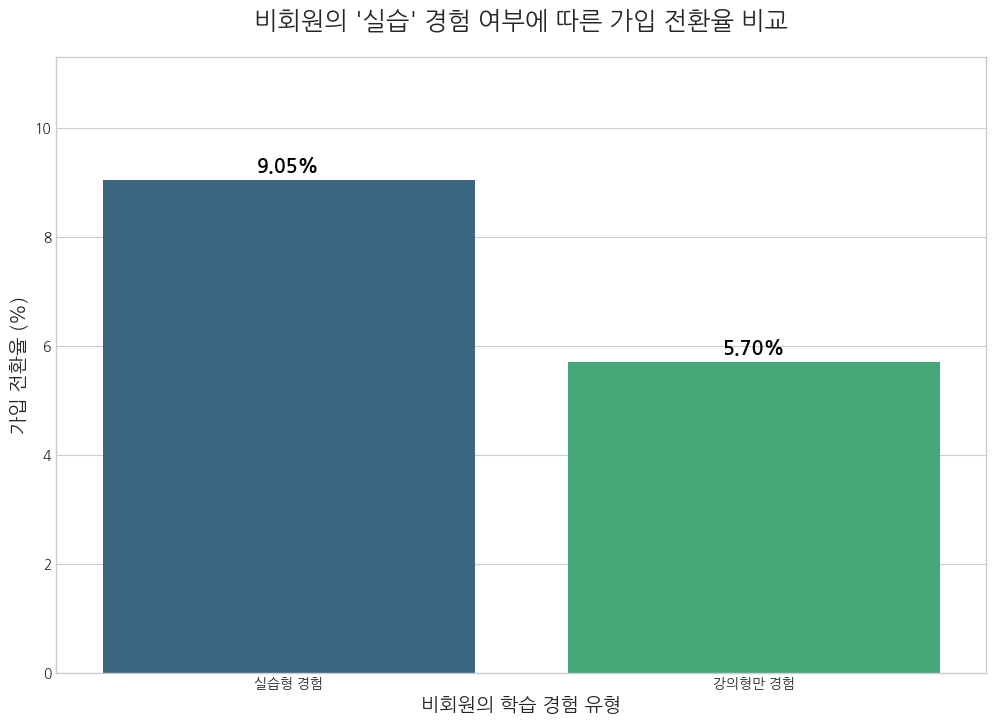

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [가정] 이전 단계에서 모든 필요한 변수들이 준비된 상태
# 1. null_id_enter_lesson_df: 모든 비회원 로그
# 2. id_info_df: content.id별 강의 구성 정보
# 3. complete_signup_df: 회원가입 로그

# -------------------- 1단계: 콘텐츠 유형 정의 (실습형/강의형) --------------------
print("✅ 1단계: '실습형'과 '강의형' 콘텐츠를 정의합니다...")
id_info_df['total_components'] = id_info_df[['stream', 'note', 'practice', 'quiz']].sum(axis=1)
id_info_df['practice_ratio'] = id_info_df['practice'] / id_info_df['total_components']
practice_heavy_content_ids = set(id_info_df[id_info_df['practice_ratio'] >= 0.3]['content.id'].unique())


# -------------------- 2단계: 비회원 세션을 새로운 세 그룹으로 분리 --------------------
print("\n✅ 2단계: 비회원 세션을 새로운 세 그룹('강의형만', '혼합', '실습형')으로 분리합니다...")
# 비회원 로그에 '실습형 여부'를 표시
non_member_logs_with_type = pd.merge(
    null_id_enter_lesson_df,
    id_info_df[['content.id']],
    on='content.id',
    how='left', # 모든 비회원 로그를 유지
)
non_member_logs_with_type['is_practice_heavy'] = non_member_logs_with_type['content.id'].isin(practice_heavy_content_ids)

# 각 세션별 경험 유형을 요약 ('any': 실습형을 하나라도 봤는가)
session_experience_summary = non_member_logs_with_type.groupby(['date', 'fingerprint'])['is_practice_heavy'].any()

# [수정] 새로운 그룹 정의
# '실습형 경험' 그룹: 실습형 콘텐츠를 한 번이라도 경험한 모든 세션
practice_experience_sessions = set(session_experience_summary[session_experience_summary == True].index)
# '강의형만 경험' 그룹: 경험한 모든 것이 강의형인 세션
lecture_only_sessions = set(session_experience_summary[session_experience_summary == False].index)


# 각 그룹의 '전체 모수(분모)'
# [수정] '혼합' 그룹은 이 분석에서는 따로 정의하지 않고, '실습형'과 '강의형'의 직접 비교에 집중합니다.
total_pool_by_type = {
    '실습형 경험': len(practice_experience_sessions),
    '강의형만 경험': len(lecture_only_sessions)
}
print("  - 각 그룹별 전체 세션 수(분모):", total_pool_by_type)


# -------------------- 3단계: 그룹별 가입 전환율 계산 --------------------
print("\n✅ 3단계: 각 그룹의 가입 전환율을 계산합니다...")
converted_sessions = set(map(tuple, complete_signup_df[['date', 'fingerprint']].drop_duplicates().values))

conversions_practice = len(practice_experience_sessions.intersection(converted_sessions))
conversions_lecture_only = len(lecture_only_sessions.intersection(converted_sessions))

conv_rate_practice = (conversions_practice / total_pool_by_type['실습형 경험'] * 100) if total_pool_by_type['실습형 경험'] > 0 else 0
conv_rate_lecture = (conversions_lecture_only / total_pool_by_type['강의형만 경험'] * 100) if total_pool_by_type['강의형만 경험'] > 0 else 0

# 최종 결과 테이블
conversion_df = pd.DataFrame({
    '가입 전환율(%)': [conv_rate_practice, conv_rate_lecture]
}, index=['실습형 경험', '강의형만 경험'])
print(conversion_df.round(2))


# -------------------- 4단계: 통계적 검증 및 시각화 --------------------
print("\n✅ 4단계: 카이제곱 검정으로 차이를 검증하고 시각화합니다...")
observed_values = [
    [conversions_practice, total_pool_by_type['실습형 경험'] - conversions_practice],
    [conversions_lecture_only, total_pool_by_type['강의형만 경험'] - conversions_lecture_only]
]
chi2, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- 카이제곱 검정 결과 (p-value): {p_value:.4f} ---")
print(f"카이제곱 통계량: {chi2:.4f}")
if p_value < 0.05:
    print("   결론: 두 그룹 간의 가입 전환율 차이는 통계적으로 유의미합니다.")
else:
    print("   결론: 두 그룹 간의 가입 전환율 차이가 통계적으로 유의미하다고 보기 어렵습니다.")

# --- [핵심 수정] 시각화 부분 ---
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8)) # figsize를 약간 조정하여 공간 확보

# [수정 1] ax 객체를 받아와서 더 세밀하게 제어합니다.
ax = sns.barplot(data=conversion_df, x=conversion_df.index, y='가입 전환율(%)', palette='viridis')

# [수정 2] 각 막대(patch) 위에 값을 크고 굵게 표시합니다.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',                   # 표시할 텍스트 (소수점 둘째 자리까지)
                (p.get_x() + p.get_width() / 2., p.get_height()), # 텍스트 위치 (막대 상단 중앙)
                ha='center', va='center',                   # 정렬
                xytext=(0, 10),                             # 막대에서 10포인트 위로 띄움
                textcoords='offset points',
                fontsize=14,                                # 폰트 크기
                weight='bold',                              # 폰트 굵기
                color='black')                              # 폰트 색상

# [수정 3] X축과 Y축 라벨을 명시적으로 설정하여 'None'이 나타나지 않게 합니다.
ax.set_xlabel('비회원의 학습 경험 유형', fontsize=14)
ax.set_ylabel('가입 전환율 (%)', fontsize=14)

# Y축 범위를 데이터보다 넉넉하게 설정하여, 막대 위 텍스트가 잘리지 않게 합니다.
ax.set_ylim(0, conversion_df['가입 전환율(%)'].max() * 1.25)

# 차트 제목
plt.title("비회원의 '실습' 경험 여부에 따른 가입 전환율 비교", fontsize=18, pad=20)

plt.show()

✅ 1단계: '중급' 난이도 콘텐츠를 경험한 비회원 활동을 필터링합니다...
  - 총 483,246개의 '중급 콘텐츠 경험' 로그를 추출했습니다.

✅ 2단계: '중급' 경험자들을 경험 유형에 따라 두 그룹으로 분리합니다...
  - 중급 콘텐츠 중 '실습형' 경험 세션 수: 8,426
  - 중급 콘텐츠 중 '강의형만' 경험 세션 수: 27,941

✅ 3단계: 각 그룹의 가입 전환율을 계산합니다...

--- [가설 검증 최종 결과] ---
              가입 전환율(%)
실습형 경험 (중급)       12.15
강의형만 경험 (중급)       9.07

✅ 4단계: 카이제곱 검정으로 차이를 검증하고 시각화합니다...
카이제곱 통계량: 69.3988

--- 카이제곱 검정 결과 (p-value): 0.0000 ---
   결론: '중급자' 내에서, 실습형/강의형 경험에 따른 가입 전환율 차이는 통계적으로 유의미합니다.


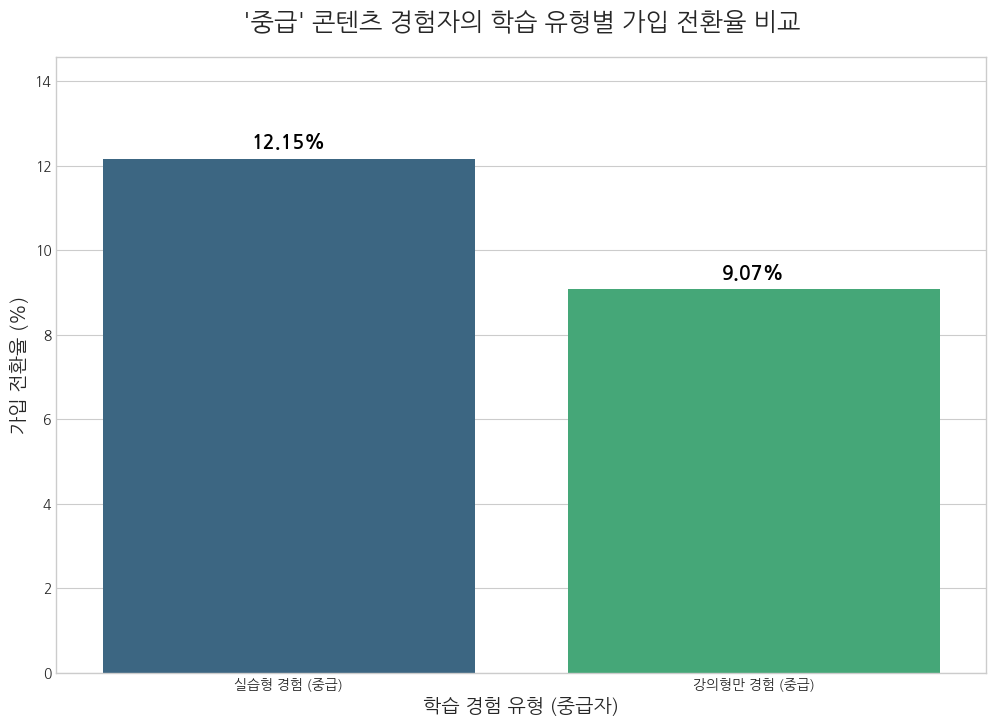

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [가정] 이전 단계에서 모든 필요한 변수들이 준비된 상태
# 1. null_id_enter_lesson_df: 모든 비회원 로그 (핑거프린트와 date 컬럼이 추가된 상태)
# 2. id_info_df: content.id별 강의 구성 및 난이도 정보가 담긴 데이터프레임
# 3. complete_signup_df: 회원가입 로그 (핑거프린트와 date 컬럼이 추가된 상태)


# -------------------- 1단계: '중급' 콘텐츠를 경험한 비회원 활동 필터링 --------------------
print("✅ 1단계: '중급' 난이도 콘텐츠를 경험한 비회원 활동을 필터링합니다...")

# id_info_df에서 'advanced' 난이도의 content.id 목록을 가져옵니다.
intermediate_content_ids = set(infomation_df[infomation_df['content.difficulty'] == 'advanced']['content.id'].unique())

# 비회원 로그 중에서, '중급' 콘텐츠를 본 기록만 남깁니다.
intermediate_logs_df = null_id_enter_lesson_df[null_id_enter_lesson_df['content.id'].isin(intermediate_content_ids)].copy()

print(f"  - 총 {len(intermediate_logs_df):,}개의 '중급 콘텐츠 경험' 로그를 추출했습니다.")


# -------------------- 2단계: '중급' 경험자들을 '실습형' vs '강의형'으로 분리 --------------------
print("\n✅ 2단계: '중급' 경험자들을 경험 유형에 따라 두 그룹으로 분리합니다...")

# '실습형' 콘텐츠 ID 목록 (이전 코드에서 계산)
# practice_heavy_content_ids = set(...)

# '중급' 로그에 '실습형 여부'를 표시
intermediate_logs_df['is_practice_heavy'] = intermediate_logs_df['content.id'].isin(practice_heavy_content_ids)

# 각 비회원 세션이 '실습형'을 경험했는지 여부를 기준으로 그룹을 나눕니다.
# (여기서는 '실습형'을 한 번이라도 경험했으면 '실습 경험 그룹'으로 분류)
session_has_practice = intermediate_logs_df.groupby(['date', 'fingerprint'])['is_practice_heavy'].any()

practice_sessions = set(session_has_practice[session_has_practice == True].index)
lecture_sessions = set(session_has_practice[session_has_practice == False].index)

# 각 그룹의 '전체 모수(분모)'
total_pool_practice = len(practice_sessions)
total_pool_lecture = len(lecture_sessions)

print(f"  - 중급 콘텐츠 중 '실습형' 경험 세션 수: {total_pool_practice:,}")
print(f"  - 중급 콘텐츠 중 '강의형만' 경험 세션 수: {total_pool_lecture:,}")


# -------------------- 3단계: 각 그룹별 가입 전환율 계산 --------------------
print("\n✅ 3단계: 각 그룹의 가입 전환율을 계산합니다...")

# 가입에 성공한 세션 목록
converted_sessions = set(map(tuple, complete_signup_df[['date', 'fingerprint']].drop_duplicates().values))

# 각 그룹과 가입 세션의 교집합을 구하여 '가입 전환 수(분자)' 계산
conversions_practice = len(practice_sessions.intersection(converted_sessions))
conversions_lecture = len(lecture_sessions.intersection(converted_sessions))

# 전환율 계산
conv_rate_practice = (conversions_practice / total_pool_practice * 100) if total_pool_practice > 0 else 0
conv_rate_lecture = (conversions_lecture / total_pool_lecture * 100) if total_pool_lecture > 0 else 0

# 최종 결과 테이블
conversion_df_intermediate = pd.DataFrame({
    '가입 전환율(%)': [conv_rate_practice, conv_rate_lecture]
}, index=['실습형 경험 (중급)', '강의형만 경험 (중급)'])
print("\n--- [가설 검증 최종 결과] ---")
print(conversion_df_intermediate.round(2))


# -------------------- 4단계: 통계적 검증 및 시각화 --------------------
print("\n✅ 4단계: 카이제곱 검정으로 차이를 검증하고 시각화합니다...")
# 분할표 생성
observed_values = [
    [conversions_practice, total_pool_practice - conversions_practice],
    [conversions_lecture, total_pool_lecture - conversions_lecture]
]
chi2, p_value, _, _ = chi2_contingency(observed_values)
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"\n--- 카이제곱 검정 결과 (p-value): {p_value:.4f} ---")
if p_value < 0.05:
    print("   결론: '중급자' 내에서, 실습형/강의형 경험에 따른 가입 전환율 차이는 통계적으로 유의미합니다.")
else:
    print("   결론: 두 그룹 간의 가입 전환율 차이가 통계적으로 유의미하다고 보기 어렵습니다.")

# --- [핵심 수정] 시각화 부분 ---
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8)) # figsize를 약간 조정하여 공간 확보

# [수정 1] ax 객체를 받아와서 더 세밀하게 제어합니다.
ax = sns.barplot(data=conversion_df_intermediate, x=conversion_df_intermediate.index, y='가입 전환율(%)', palette='viridis')

# [수정 2] 각 막대(patch) 위에 값을 크고 굵게 표시합니다.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',                   # 표시할 텍스트 (소수점 둘째 자리까지)
                (p.get_x() + p.get_width() / 2., p.get_height()), # 텍스트 위치 (막대 상단 중앙)
                ha='center', va='center',                   # 정렬
                xytext=(0, 12),                             # 막대에서 12포인트 위로 띄움
                textcoords='offset points',
                fontsize=14,                                # 폰트 크기
                weight='bold',                              # 폰트 굵기
                color='black')                              # 폰트 색상

# [수정 3] X축과 Y축 라벨을 명시적으로 설정하여 'None'이 나타나지 않게 합니다.
ax.set_xlabel('학습 경험 유형 (중급자)', fontsize=14)
ax.set_ylabel('가입 전환율 (%)', fontsize=14)

# Y축 범위를 데이터보다 넉넉하게 설정하여, 막대 위 텍스트가 잘리지 않게 합니다.
ax.set_ylim(0, conversion_df_intermediate['가입 전환율(%)'].max() * 1.2)

# 차트 제목
plt.title("'중급' 콘텐츠 경험자의 학습 유형별 가입 전환율 비교", fontsize=18, pad=20)

plt.show()


✅ 2단계: '중급' 경험자들을 '순수 실습', '순수 강의', '혼합' 그룹으로 분리합니다...
  - 중급 콘텐츠 중 '실습형만' 경험 세션 수: 5,219
  - 중급 콘텐츠 중 '강의형만' 경험 세션 수: 27,941
  - 중급 콘텐츠 중 '혼합' 경험 세션 수: 3,207

✅ 3단계: 각 그룹의 가입 전환율을 계산합니다...

--- [가설 검증 최종 결과] ---
          가입 전환율(%)
순수 실습 경험       7.24
혼합 경험         20.14
순수 강의 경험       9.07

✅ 4단계: 카이제곱 검정으로 차이를 검증하고 시각화합니다...

--- 카이제곱 검정 결과 (p-value): 0.0000 ---
   결론: 세 그룹 간의 가입 전환율에는 통계적으로 유의미한 차이가 존재합니다.


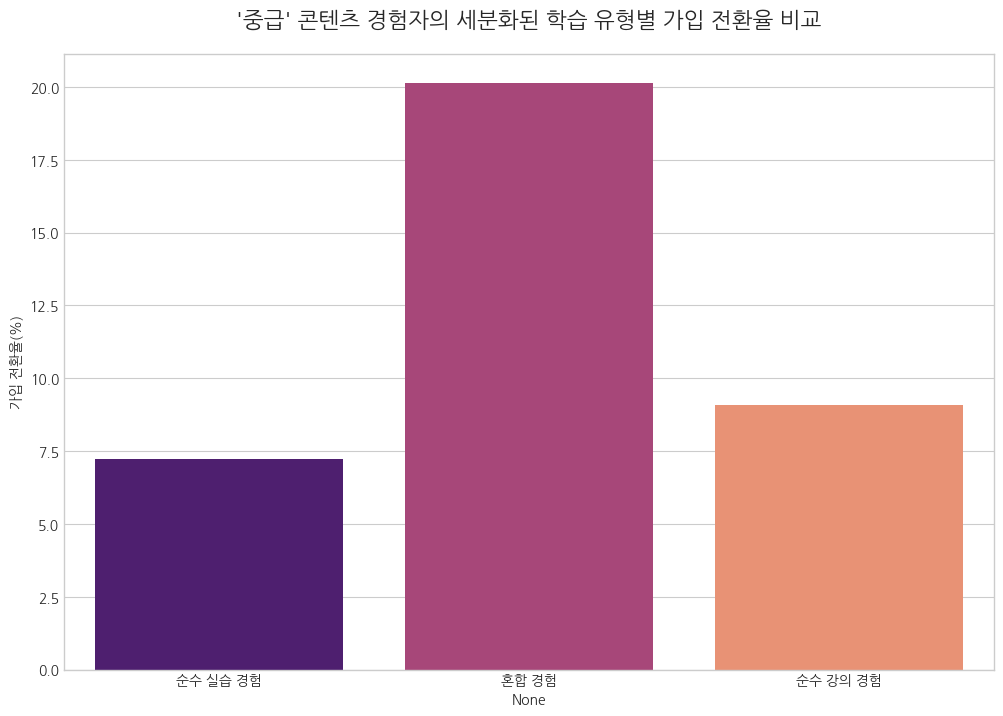

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [가정] 이전 단계에서 모든 필요한 변수들이 준비된 상태
# 1. intermediate_logs_df: '중급' 난이도 콘텐츠를 경험한 모든 비회원 활동 로그
# 2. complete_signup_df: 회원가입 로그

# -------------------- [수정] 2단계: '중급' 경험자들을 세 그룹으로 분리 --------------------
print("\n✅ 2단계: '중급' 경험자들을 '순수 실습', '순수 강의', '혼합' 그룹으로 분리합니다...")

# '실습형' 콘텐츠 ID 목록 (이전 코드에서 계산)
# practice_heavy_content_ids = set(...)

# '중급' 로그에 '실습형 여부'를 표시
intermediate_logs_df['is_practice_heavy'] = intermediate_logs_df['content.id'].isin(practice_heavy_content_ids)

# 각 비회원 세션의 경험 유형을 요약합니다. ('any': 실습을 하나라도 봤는가, 'all': 본 모든 것이 실습인가)
session_experience_summary = intermediate_logs_df.groupby(['date', 'fingerprint'])['is_practice_heavy'].agg(['any', 'all'])

# '순수 실습' 그룹: 경험한 모든 것이 실습형 (all == True)
practice_only_sessions = set(session_experience_summary[session_experience_summary['all'] == True].index)
# '순수 강의' 그룹: 경험한 모든 것이 강의형 (any == False)
lecture_only_sessions = set(session_experience_summary[session_experience_summary['any'] == False].index)
# '혼합' 그룹: 그 외 나머지 (실습과 강의를 모두 경험)
all_intermediate_sessions = set(session_experience_summary.index)
mixed_sessions = all_intermediate_sessions - practice_only_sessions - lecture_only_sessions

# 각 그룹의 '전체 모수(분모)'
total_pool_practice_only = len(practice_only_sessions)
total_pool_lecture_only = len(lecture_only_sessions)
total_pool_mixed = len(mixed_sessions)

print(f"  - 중급 콘텐츠 중 '실습형만' 경험 세션 수: {total_pool_practice_only:,}")
print(f"  - 중급 콘텐츠 중 '강의형만' 경험 세션 수: {total_pool_lecture_only:,}")
print(f"  - 중급 콘텐츠 중 '혼합' 경험 세션 수: {total_pool_mixed:,}")


# -------------------- 3단계: 각 그룹별 가입 전환율 계산 --------------------
print("\n✅ 3단계: 각 그룹의 가입 전환율을 계산합니다...")

# 가입에 성공한 세션 목록
converted_sessions = set(map(tuple, complete_signup_df[['date', 'fingerprint']].drop_duplicates().values))

# 각 그룹과 가입 세션의 교집합을 구하여 '가입 전환 수(분자)' 계산
conversions_practice_only = len(practice_only_sessions.intersection(converted_sessions))
conversions_lecture_only = len(lecture_only_sessions.intersection(converted_sessions))
conversions_mixed = len(mixed_sessions.intersection(converted_sessions))

# 전환율 계산
conv_rate_practice = (conversions_practice_only / total_pool_practice_only * 100) if total_pool_practice_only > 0 else 0
conv_rate_lecture = (conversions_lecture_only / total_pool_lecture_only * 100) if total_pool_lecture_only > 0 else 0
conv_rate_mixed = (conversions_mixed / total_pool_mixed * 100) if total_pool_mixed > 0 else 0

# 최종 결과 테이블
conversion_df_segmented = pd.DataFrame({
    '가입 전환율(%)': [conv_rate_practice, conv_rate_mixed, conv_rate_lecture]
}, index=['순수 실습 경험', '혼합 경험', '순수 강의 경험'])
print("\n--- [가설 검증 최종 결과] ---")
print(conversion_df_segmented.round(2))


# -------------------- 4단계: 통계적 검증 및 시각화 --------------------
print("\n✅ 4단계: 카이제곱 검정으로 차이를 검증하고 시각화합니다...")

# 분할표 생성 (3x2)
observed_values = [
    [conversions_practice_only, total_pool_practice_only - conversions_practice_only],
    [conversions_mixed, total_pool_mixed - conversions_mixed],
    [conversions_lecture_only, total_pool_lecture_only - conversions_lecture_only]
]
chi2, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- 카이제곱 검정 결과 (p-value): {p_value:.4f} ---")
if p_value < 0.05:
    print("   결론: 세 그룹 간의 가입 전환율에는 통계적으로 유의미한 차이가 존재합니다.")
else:
    print("   결론: 세 그룹 간의 가입 전환율 차이가 통계적으로 유의미하다고 보기 어렵습니다.")

# 시각화
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8))
sns.barplot(data=conversion_df_segmented, x=conversion_df_segmented.index, y='가입 전환율(%)', palette='magma')
plt.title("'중급' 콘텐츠 경험자의 세분화된 학습 유형별 가입 전환율 비교", fontsize=16, pad=20)
plt.show()

✅ 1단계: '첫 등장일' 정보와 '난이도' 정보를 통합합니다...
✅ 2단계: 난이도 이름을 한글로 바꾸고, 정확한 순서를 정의합니다...
✅ 3단계: 월별, 난이도별로 신규 출시된 콘텐츠 수를 집계합니다...
✅ 4단계: 시각화를 위해 데이터를 표 형태로 재구성합니다...

✅ 5단계: 최종 분석 결과를 시각화합니다...


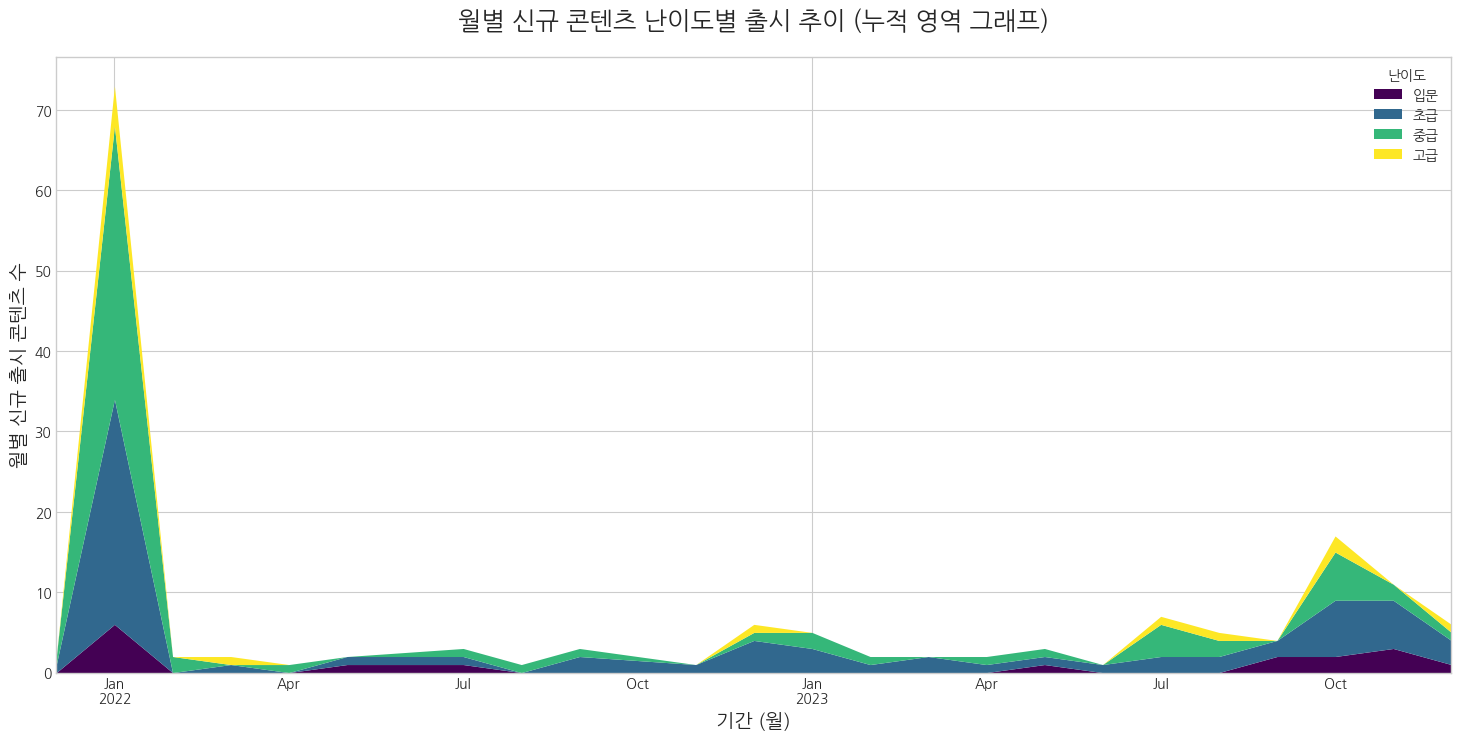

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정] 이전 단계에서 null_id_first_seen_series와 id_info_df가 준비된 상태

# 1단계: 데이터 통합
print("✅ 1단계: '첫 등장일' 정보와 '난이도' 정보를 통합합니다...")
first_seen_df = null_id_first_seen_series.reset_index()
first_seen_df.columns = ['content.id', 'first_seen_time']
analysis_df = pd.merge(first_seen_df, infomation_df[['content.id', 'content.difficulty']].dropna(), on='content.id', how='left')

# 2단계: 난이도 이름 변경 및 순서 정의 (수정 완료)
print("✅ 2단계: 난이도 이름을 한글로 바꾸고, 정확한 순서를 정의합니다...")
difficulty_map = {
    'beginner': '입문', 'intermediate': '초급', 'advanced': '중급', 'hard': '고급'
}
difficulty_order = ['입문', '초급', '중급', '고급']
analysis_df['difficulty_korean'] = pd.Categorical(
    analysis_df['content.difficulty'].map(difficulty_map),
    categories=difficulty_order,
    ordered=True
)

# 3단계: 월별, 난이도별 출시 수 집계
print("✅ 3단계: 월별, 난이도별로 신규 출시된 콘텐츠 수를 집계합니다...")
analysis_df['year_month'] = analysis_df['first_seen_time'].dt.to_period('M')
monthly_difficulty_counts = analysis_df.groupby(['year_month', 'difficulty_korean']).size()

# 4단계: 시각화를 위해 데이터 재구성
print("✅ 4단계: 시각화를 위해 데이터를 표 형태로 재구성합니다...")
plot_df = monthly_difficulty_counts.unstack(fill_value=0)

# 5단계: 최종 시계열 그래프 시각화
print("\n✅ 5단계: 최종 분석 결과를 시각화합니다...")
plt.rc('font', family='NanumGothic')
ax = plot_df.plot(
    kind='area', stacked=True, figsize=(18, 8), colormap='viridis', linewidth=0
)
ax.set_title('월별 신규 콘텐츠 난이도별 출시 추이 (누적 영역 그래프)', fontsize=18, pad=20)
ax.set_xlabel('기간 (월)', fontsize=14)
ax.set_ylabel('월별 신규 출시 콘텐츠 수', fontsize=14)
ax.legend(title='난이도')
plt.grid(True)
plt.show()

✅ 1단계: 월별, 콘텐츠별 시청 횟수를 집계합니다...
✅ 2단계: 최고 시청 횟수를 기록한 Top 5 콘텐츠를 선정합니다...
✅ 3단계: 콘텐츠 ID를 읽기 쉬운 한글 강의 제목으로 변환합니다...
✅ 4단계: 최종 분석 결과를 시각화합니다...


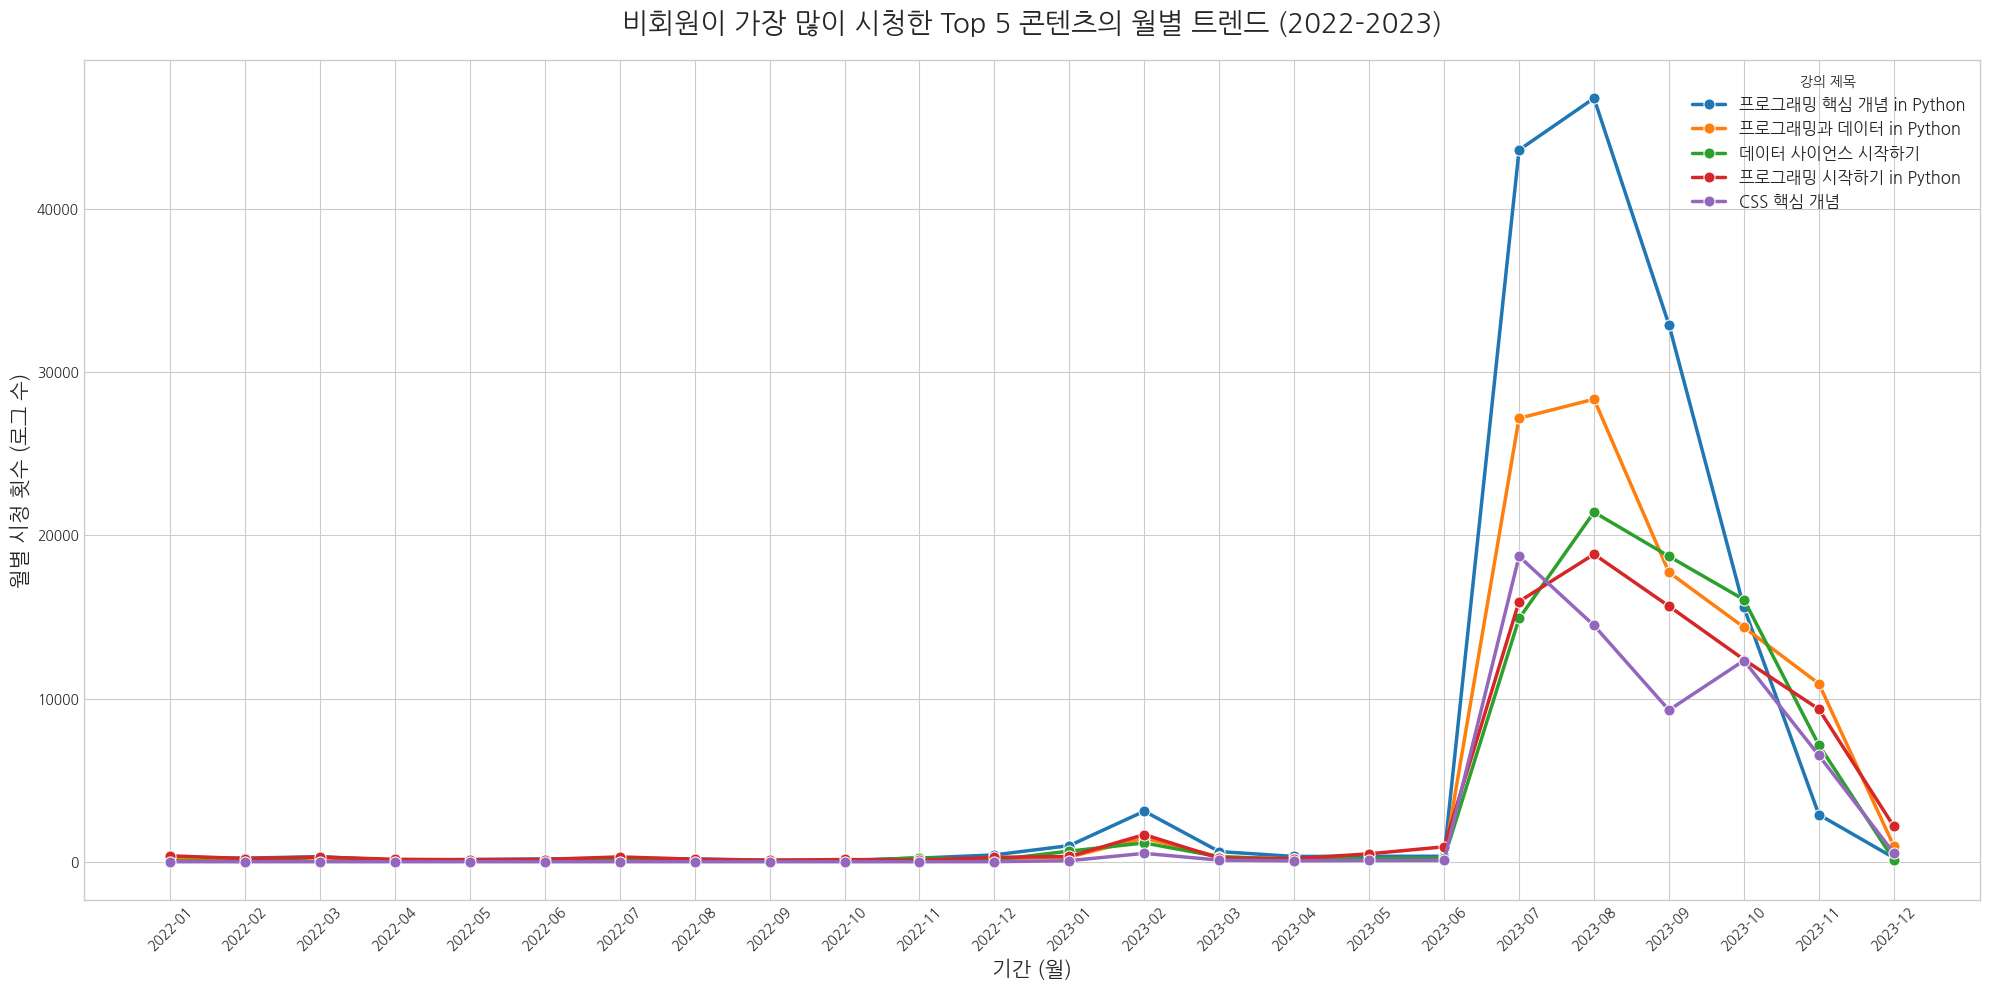

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정]
# 1. null_id_enter_lesson_df: 모든 비회원 로그
# 2. infomation_df: 'content.id'와 'topic.name' 등 강의 정보가 담긴 데이터프레임

# -------------------- 1단계: 월별, 콘텐츠별 시청 횟수 집계 --------------------
print("✅ 1단계: 월별, 콘텐츠별 시청 횟수를 집계합니다...")

# 분석 기간 필터링
temp_df = null_id_enter_lesson_df.dropna(subset=['content.id']).copy()
start_date = '2022-01-01'
end_date = '2023-12-31'
temp_df = temp_df[(temp_df['client_event_time'] >= start_date) & (temp_df['client_event_time'] <= end_date)]
temp_df['year_month'] = temp_df['client_event_time'].dt.to_period('M')

# 월별, 콘텐츠 ID별 로그 수 집계 후, 표 형태로 변환
monthly_view_counts = temp_df.groupby(['year_month', 'content.id']).size().unstack(fill_value=0)


# -------------------- 2단계: '주인공' Top 5 콘텐츠 선정 --------------------
print("✅ 2단계: 최고 시청 횟수를 기록한 Top 5 콘텐츠를 선정합니다...")

# 각 콘텐츠의 '최고 시청 횟수(peak)'를 계산하여, 가장 높은 5개를 찾습니다.
top_5_content_ids = monthly_view_counts.max().nlargest(5).index.tolist()

# Top 5 콘텐츠의 월별 시청 횟수 데이터만 추출합니다.
top_5_trends_df = monthly_view_counts[top_5_content_ids]


# -------------------- 3단계: 'content.id'를 한글 'topic.name'으로 변환 --------------------
print("✅ 3단계: 콘텐츠 ID를 읽기 쉬운 한글 강의 제목으로 변환합니다...")

# id_info_df에서 content.id와 topic.name의 매핑 딕셔너리를 만듭니다.
# (먼저 'infomation_df'의 컬럼 이름을 확인하고, 실제 이름으로 수정해야 할 수 있습니다.)
id_to_name_map = infomation_df.set_index('content.id')['topic.name'].to_dict()

# 데이터프레임의 컬럼 이름을 한글 강의 제목으로 변경합니다.
top_5_trends_df.rename(columns=id_to_name_map, inplace=True)


# -------------------- 4단계: 최종 시각화 --------------------
print("✅ 4단계: 최종 분석 결과를 시각화합니다...")

plt.rc('font', family='NanumGothic') # Colab 한글 폰트
plt.figure(figsize=(20, 10))

# 인덱스를 'YYYY-MM' 형식의 문자열로 변환하여 x축으로 사용
plot_data = top_5_trends_df.copy()
plot_data.index = plot_data.index.strftime('%Y-%m')

# Top 5 콘텐츠의 트렌드를 선 그래프로 그립니다.
ax = sns.lineplot(data=plot_data, marker='o', markersize=8, dashes=False, linewidth=2.5)

# 그래프 꾸미기
plt.title('비회원이 가장 많이 시청한 Top 5 콘텐츠의 월별 트렌드 (2022-2023)', fontsize=20, pad=20)
plt.xlabel('기간 (월)', fontsize=15)
plt.ylabel('월별 시청 횟수 (로그 수)', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='강의 제목', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

✅ 1단계: 월별, 콘텐츠별 시청 횟수를 집계합니다...
✅ 2단계: 최고 시청 횟수를 기록한 Top 5 콘텐츠를 선정합니다...
✅ 3단계: 콘텐츠 ID를 읽기 쉬운 한글 강의 제목으로 변환합니다...
✅ 4단계: 최종 분석 결과를 시각화합니다...


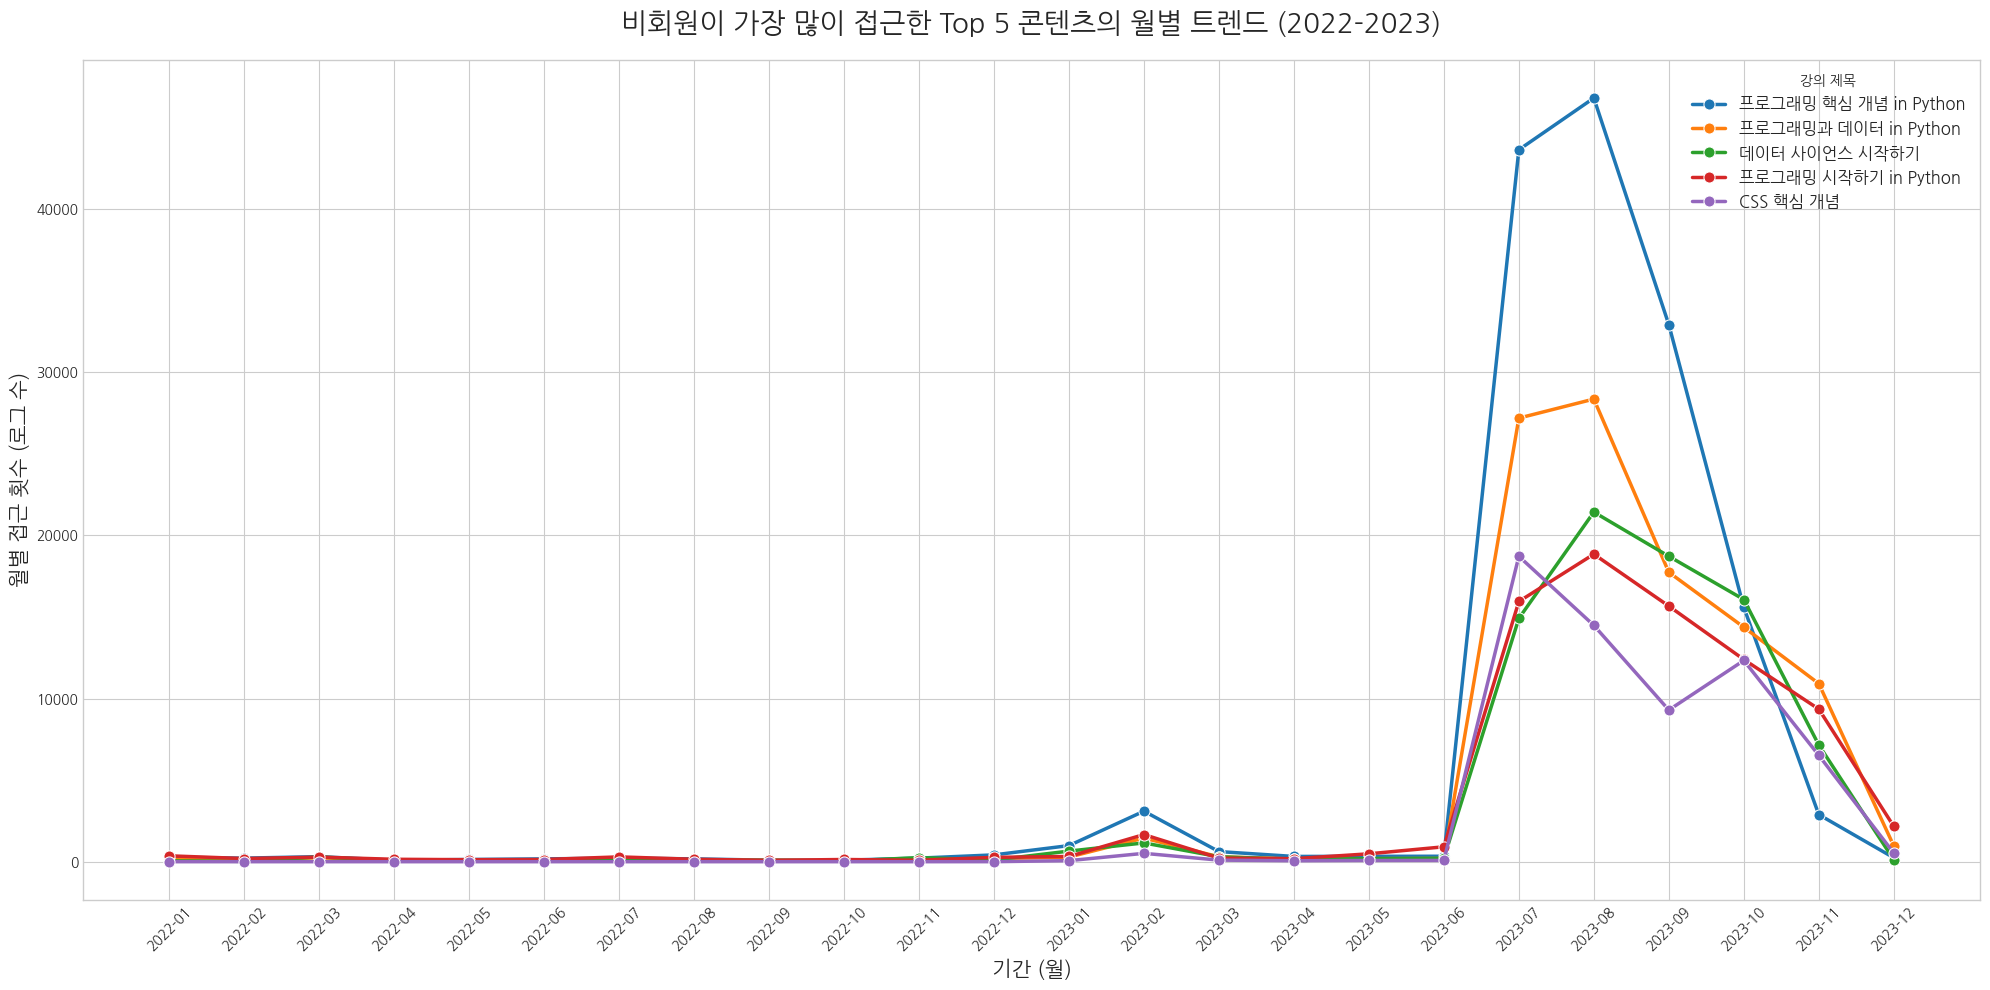

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정]
# 1. null_id_enter_lesson_df: 모든 비회원 로그
# 2. infomation_df: 'content.id'와 'topic.name' 등 강의 정보가 담긴 데이터프레임

# -------------------- 1단계: 월별, 콘텐츠별 시청 횟수 집계 --------------------
print("✅ 1단계: 월별, 콘텐츠별 시청 횟수를 집계합니다...")

# 분석 기간 필터링
temp_df = null_id_enter_lesson_df.dropna(subset=['content.id']).copy()
start_date = '2022-01-01'
end_date = '2023-12-31'
temp_df = temp_df[(temp_df['client_event_time'] >= start_date) & (temp_df['client_event_time'] <= end_date)]
temp_df['year_month'] = temp_df['client_event_time'].dt.to_period('M')

# 월별, 콘텐츠 ID별 로그 수 집계 후, 표 형태로 변환
monthly_view_counts = temp_df.groupby(['year_month', 'content.id']).size().unstack(fill_value=0)


# -------------------- 2단계: '주인공' Top 5 콘텐츠 선정 --------------------
print("✅ 2단계: 최고 시청 횟수를 기록한 Top 5 콘텐츠를 선정합니다...")

# 각 콘텐츠의 '최고 시청 횟수(peak)'를 계산하여, 가장 높은 5개를 찾습니다.
top_5_content_ids = monthly_view_counts.max().nlargest(5).index.tolist()

# Top 5 콘텐츠의 월별 시청 횟수 데이터만 추출합니다.
top_5_trends_df = monthly_view_counts[top_5_content_ids]


# -------------------- 3단계: 'content.id'를 한글 'topic.name'으로 변환 --------------------
print("✅ 3단계: 콘텐츠 ID를 읽기 쉬운 한글 강의 제목으로 변환합니다...")

# id_info_df에서 content.id와 topic.name의 매핑 딕셔너리를 만듭니다.
# (먼저 'infomation_df'의 컬럼 이름을 확인하고, 실제 이름으로 수정해야 할 수 있습니다.)
id_to_name_map = infomation_df.set_index('content.id')['topic.name'].to_dict()

# 데이터프레임의 컬럼 이름을 한글 강의 제목으로 변경합니다.
top_5_trends_df.rename(columns=id_to_name_map, inplace=True)


# -------------------- 4단계: 최종 시각화 --------------------
print("✅ 4단계: 최종 분석 결과를 시각화합니다...")

# 1. 먼저 seaborn 스타일을 적용합니다.
plt.style.use('seaborn-v0_8-whitegrid')

# 2. [핵심] 그 다음에, 한글 폰트 설정을 '다시 한번' 실행하여 덮어쓰기 합니다.
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 10))

# 인덱스를 'YYYY-MM' 형식의 문자열로 변환하여 x축으로 사용
plot_data = top_5_trends_df.copy()
plot_data.index = plot_data.index.strftime('%Y-%m')

# Top 5 콘텐츠의 트렌드를 선 그래프로 그립니다.
ax = sns.lineplot(data=plot_data, marker='o', markersize=8, dashes=False, linewidth=2.5)

# 그래프 꾸미기
plt.title('비회원이 가장 많이 접근한 Top 5 콘텐츠의 월별 트렌드 (2022-2023)', fontsize=20, pad=20)
plt.xlabel('기간 (월)', fontsize=15)
plt.ylabel('월별 접근 횟수 (로그 수)', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='강의 제목', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

✅ 1단계: 흩어져 있는 카테고리 정보를 하나의 컬럼으로 통합합니다...
  - 총 107개의 '콘텐츠-카테고리' 매핑 관계를 생성했습니다.

✅ 2단계: 모든 비회원 활동 로그에 카테고리 정보를 부여합니다...

✅ 3단계: 각 카테고리별 '전체 경험자 수(분모)'와 '가입 전환자 수(분자)'를 계산합니다...

✅ 4단계: '카테고리별 가입 전환율'을 계산하고 최종 테이블을 만듭니다...


--- [가설 검증 최종 결과] 카테고리별 가입 전환율 ---
              total_sessions  converted_sessions  conversion_rate(%)
category                                                            
머신러닝/ 딥러닝               4546                 695               15.29
디자인                     1221                 163               13.35
개발 도구/컴퓨터 과학            8736                1080               12.36
개발 도구/ 컴퓨터              7338                 895               12.20
데이터 분석                 14866                1665               11.20
생성형 AI 활용               9740                1027               10.54
IT실무/ 비즈니스             21603                2234               10.34
웹 개발                   24602                2426                9.86
프로그래밍 언어               39712                3463    

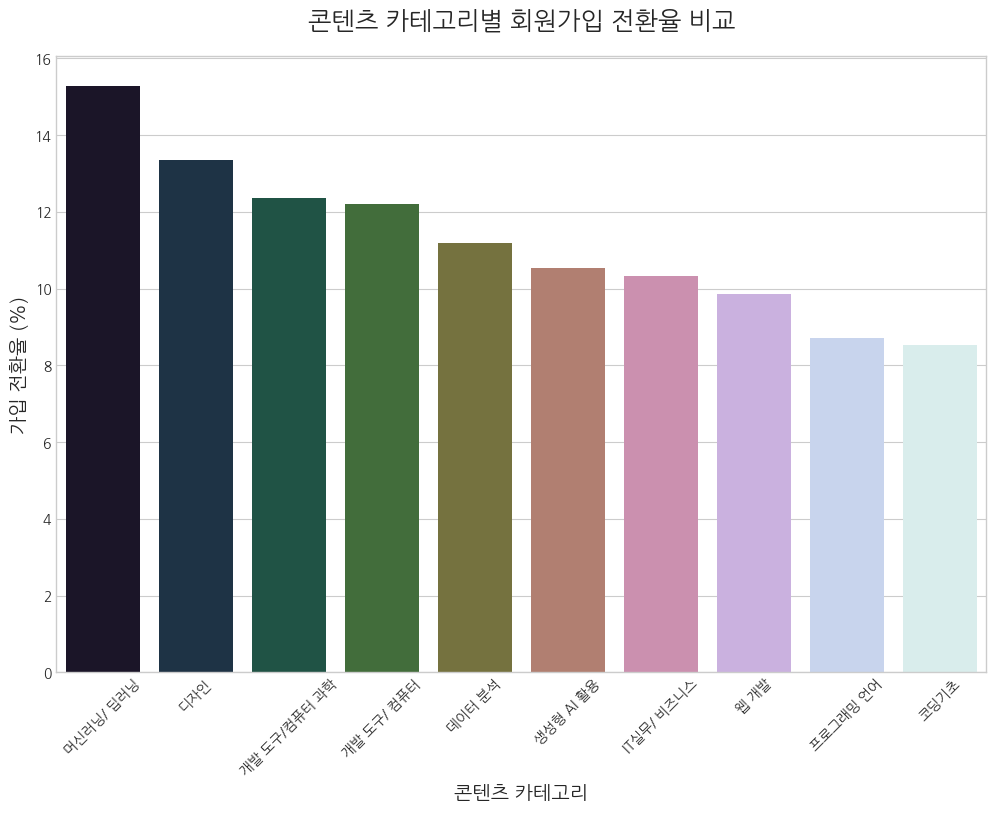

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [가정] 이전 단계에서 아래 변수들이 모두 준비된 상태
# 1. null_id_enter_lesson_df: 모든 비회원 로그 (핑거프린트와 date 컬럼이 추가된 상태)
# 2. id_info_df: content.id별 카테고리 정보('category 1', 'category2', 'category3')가 담긴 데이터프레임
# 3. complete_signup_df: 회원가입 로그 (핑거프린트와 date 컬럼이 추가된 상태)


# -------------------- 1단계: 카테고리 데이터를 'Long Format'으로 변환 --------------------
print("✅ 1단계: 흩어져 있는 카테고리 정보를 하나의 컬럼으로 통합합니다...")

# id_vars는 고정할 컬럼, value_vars는 '녹여서' 하나의 컬럼으로 만들 대상 컬럼들입니다.
category_long_df = pd.melt(
    infomation_df,
    id_vars=['content.id'],
    value_vars=['category 1', 'category2', 'category3'],
    value_name='category' # 새로 만들어질 컬럼의 이름
)
# 이제 category 컬럼에는 NaN 값과 중복된 카테고리 이름들이 포함되어 있습니다.
# 불필요한 행(NaN)과 컬럼('variable')을 제거하고, 중복을 제거하여 깨끗하게 만듭니다.
category_long_df = category_long_df.dropna(subset=['category']).drop(columns=['variable'])

print(f"  - 총 {len(category_long_df)}개의 '콘텐츠-카테고리' 매핑 관계를 생성했습니다.")


# -------------------- 2단계: 비회원 로그에 카테고리 정보 병합 --------------------
print("\n✅ 2단계: 모든 비회원 활동 로그에 카테고리 정보를 부여합니다...")

# 비회원 로그와 Long-format 카테고리 정보를 'content.id'를 기준으로 합칩니다.
# 하나의 로그가 여러 카테고리에 속할 수 있으므로, 로그 수가 늘어나는 것이 정상입니다.
non_member_logs_with_category = pd.merge(
    null_id_enter_lesson_df,
    category_long_df,
    on='content.id',
    how='inner' # 카테고리 정보가 있는 로그만 대상으로 함
)


# -------------------- 3단계: 카테고리별 '전체 모수' 및 '가입 전환 수' 계산 --------------------
print("\n✅ 3단계: 각 카테고리별 '전체 경험자 수(분모)'와 '가입 전환자 수(분자)'를 계산합니다...")

# 분모: 각 카테고리를 경험한 고유한 비회원 세션(date+fingerprint)의 수
total_pool_by_category = non_member_logs_with_category.groupby('category')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
total_pool_by_category.name = 'total_sessions'

# 분자: 각 카테고리를 경험하고, 가입까지 한 고유한 비회원 세션의 수
converted_sessions_df = pd.merge(
    non_member_logs_with_category,
    complete_signup_df[['date', 'fingerprint']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)
converters_by_category = converted_sessions_df.groupby('category')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
converters_by_category.name = 'converted_sessions'


# -------------------- 4단계: '카테고리별 전환율' 계산 및 최종 테이블 생성 --------------------
print("\n✅ 4단계: '카테고리별 가입 전환율'을 계산하고 최종 테이블을 만듭니다...")

# 두 Series를 DataFrame으로 합칩니다.
category_conversion_df = pd.concat([total_pool_by_category, converters_by_category], axis=1).fillna(0)
category_conversion_df['conversion_rate(%)'] = \
    (category_conversion_df['converted_sessions'] / category_conversion_df['total_sessions'] * 100).fillna(0)

# 전환율이 높은 순서대로 정렬합니다.
category_conversion_df.sort_values(by='conversion_rate(%)', ascending=False, inplace=True)

print("\n\n--- [가설 검증 최종 결과] 카테고리별 가입 전환율 ---")
print(category_conversion_df.round(2))


# -------------------- 5단계: 최종 시각화 --------------------
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=category_conversion_df, x=category_conversion_df.index, y='conversion_rate(%)', palette='cubehelix')

plt.title('콘텐츠 카테고리별 회원가입 전환율 비교', fontsize=18, pad=20)
plt.xlabel('콘텐츠 카테고리', fontsize=14)
plt.ylabel('가입 전환율 (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

✅ 1단계: 카테고리 데이터를 정제하고 하나의 컬럼으로 통합합니다...
  - 카테고리 이름 통일 및 데이터 변환이 완료되었습니다.

✅ 2단계: 비회원 활동 로그에 카테고리 정보를 부여합니다...

✅ 3단계: 각 카테고리별 전환율을 재계산합니다...


--- [가설 검증 최종 결과] 카테고리별 가입 전환율 (정제 후) ---
              total_sessions  converted_sessions  conversion_rate(%)
category                                                            
머신러닝/ 딥러닝               4546                 695               15.29
디자인                     1221                 163               13.35
개발 도구/컴퓨터 과학           15136                1752               11.58
데이터 분석                 14866                1665               11.20
생성형 AI 활용               9740                1027               10.54
IT실무/ 비즈니스             21603                2234               10.34
웹 개발                   24602                2426                9.86
프로그래밍 언어               39712                3463                8.72
코딩기초                   42944                3664                8.53

✅ 4단계: 카테고리 간 전환율 차이가 통계적으로 유의미한지 검증합니다...

--- 카이제곱 검

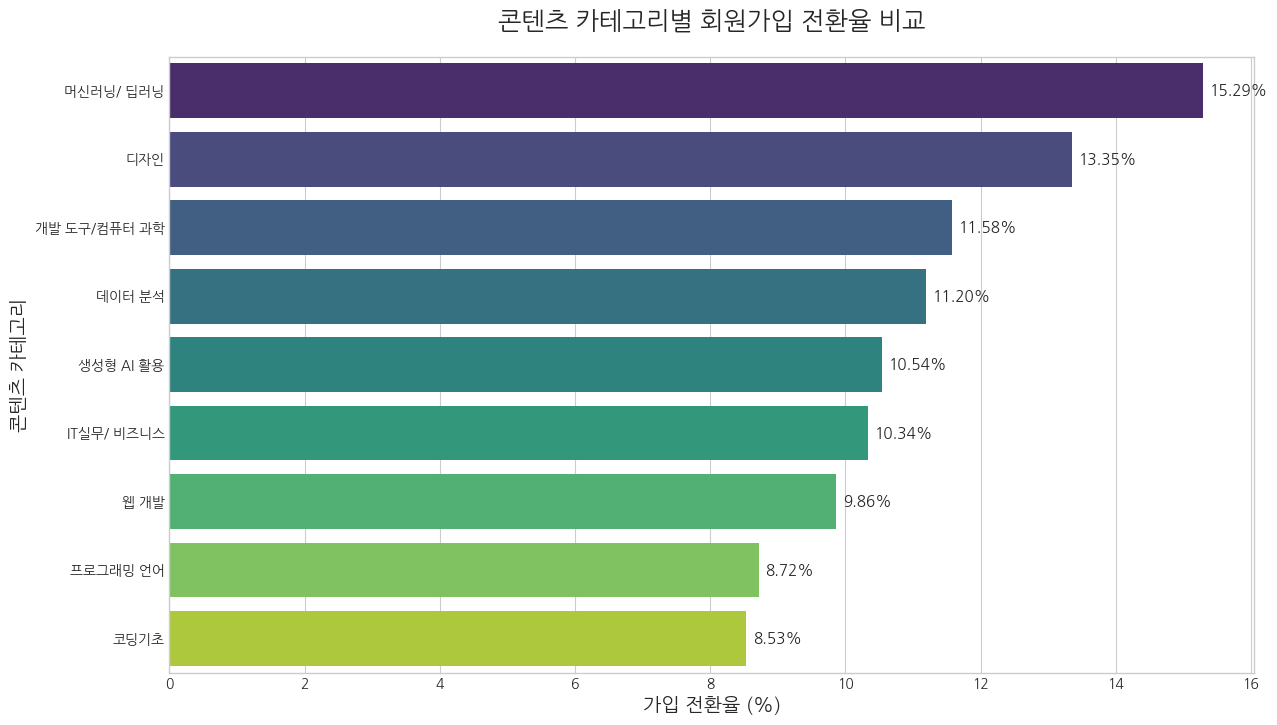

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [가정] 이전 단계에서 모든 필요한 변수들이 준비된 상태
# 1. null_id_enter_lesson_df, id_info_df, complete_signup_df

# -------------------- [핵심 수정] 1단계: 카테고리 데이터 정제 및 'Long Format' 변환 --------------------
print("✅ 1단계: 카테고리 데이터를 정제하고 하나의 컬럼으로 통합합니다...")

# [추가] '개발 도구/ 컴퓨터'를 '개발 도구/컴퓨터 과학'으로 통일합니다.
infomation_df.replace({'개발 도구/ 컴퓨터': '개발 도구/컴퓨터 과학'}, inplace=True)

category_long_df = pd.melt(
    infomation_df,
    id_vars=['content.id'],
    value_vars=['category 1', 'category2', 'category3'],
    value_name='category'
)
category_long_df = category_long_df.dropna(subset=['category']).drop(columns=['variable'])
print("  - 카테고리 이름 통일 및 데이터 변환이 완료되었습니다.")


# -------------------- 2단계: 비회원 로그에 카테고리 정보 병합 (이전과 동일) --------------------
print("\n✅ 2단계: 비회원 활동 로그에 카테고리 정보를 부여합니다...")
non_member_logs_with_category = pd.merge(
    null_id_enter_lesson_df,
    category_long_df,
    on='content.id',
    how='inner'
)

# -------------------- 3단계: 카테고리별 전환율 계산 (이전과 동일) --------------------
print("\n✅ 3단계: 각 카테고리별 전환율을 재계산합니다...")
# 분모
total_pool_by_category = non_member_logs_with_category.groupby('category')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
total_pool_by_category.name = 'total_sessions'
# 분자
converted_sessions_df = pd.merge(non_member_logs_with_category, complete_signup_df[['date', 'fingerprint']].drop_duplicates(), on=['date', 'fingerprint'], how='inner')
converters_by_category = converted_sessions_df.groupby('category')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
converters_by_category.name = 'converted_sessions'
# 최종 테이블
category_conversion_df = pd.concat([total_pool_by_category, converters_by_category], axis=1).fillna(0)
category_conversion_df['conversion_rate(%)'] = (category_conversion_df['converted_sessions'] / category_conversion_df['total_sessions'] * 100).fillna(0)
category_conversion_df.sort_values(by='conversion_rate(%)', ascending=False, inplace=True)

print("\n\n--- [가설 검증 최종 결과] 카테고리별 가입 전환율 (정제 후) ---")
print(category_conversion_df.round(2))


# -------------------- [핵심 추가] 4단계: 통계적 검증 (카이제곱 검정) --------------------
print("\n✅ 4단계: 카테고리 간 전환율 차이가 통계적으로 유의미한지 검증합니다...")

# 분할표 생성을 위해 '비가입 세션 수' 컬럼 추가
category_conversion_df['non_converted_sessions'] = category_conversion_df['total_sessions'] - category_conversion_df['converted_sessions']
# 정수형으로 변환
observed_values = category_conversion_df[['converted_sessions', 'non_converted_sessions']].astype(int).values

chi2, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- 카이제곱 검정 결과 ---")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("   결론: 카테고리 간 가입 전환율에는 통계적으로 유의미한 차이가 존재합니다.")
else:
    print("   결론: 카테고리 간 가입 전환율 차이가 통계적으로 유의미하다고 보기 어렵습니다.")


# -------------------- [핵심 수정] 5단계: 최종 시각화 (숫자 표시 추가) --------------------
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=category_conversion_df, x='conversion_rate(%)', y=category_conversion_df.index, palette='viridis')

plt.title('콘텐츠 카테고리별 회원가입 전환율 비교', fontsize=18, pad=20)
plt.xlabel('가입 전환율 (%)', fontsize=14)
plt.ylabel('콘텐츠 카테고리', fontsize=14)

# 각 막대 옆에 값(%) 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2,
             f'{width:.2f}%',
             va='center',
             fontsize=11)

plt.show()



--- [최종 분석 결과] 카테고리별 기여도(전환 인원) 및 효율성(전환율) ---
              total_sessions  converted_sessions  conversion_rate(%)  \
category                                                               
코딩기초                   42944                3664                8.53   
프로그래밍 언어               39712                3463                8.72   
웹 개발                   24602                2426                9.86   
IT실무/ 비즈니스             21603                2234               10.34   
개발 도구/컴퓨터 과학           15136                1752               11.58   
데이터 분석                 14866                1665               11.20   
생성형 AI 활용               9740                1027               10.54   
머신러닝/ 딥러닝               4546                 695               15.29   
디자인                     1221                 163               13.35   

              non_converted_sessions  
category                              
코딩기초                           39280  
프로그래밍 언어                       36249  
웹 

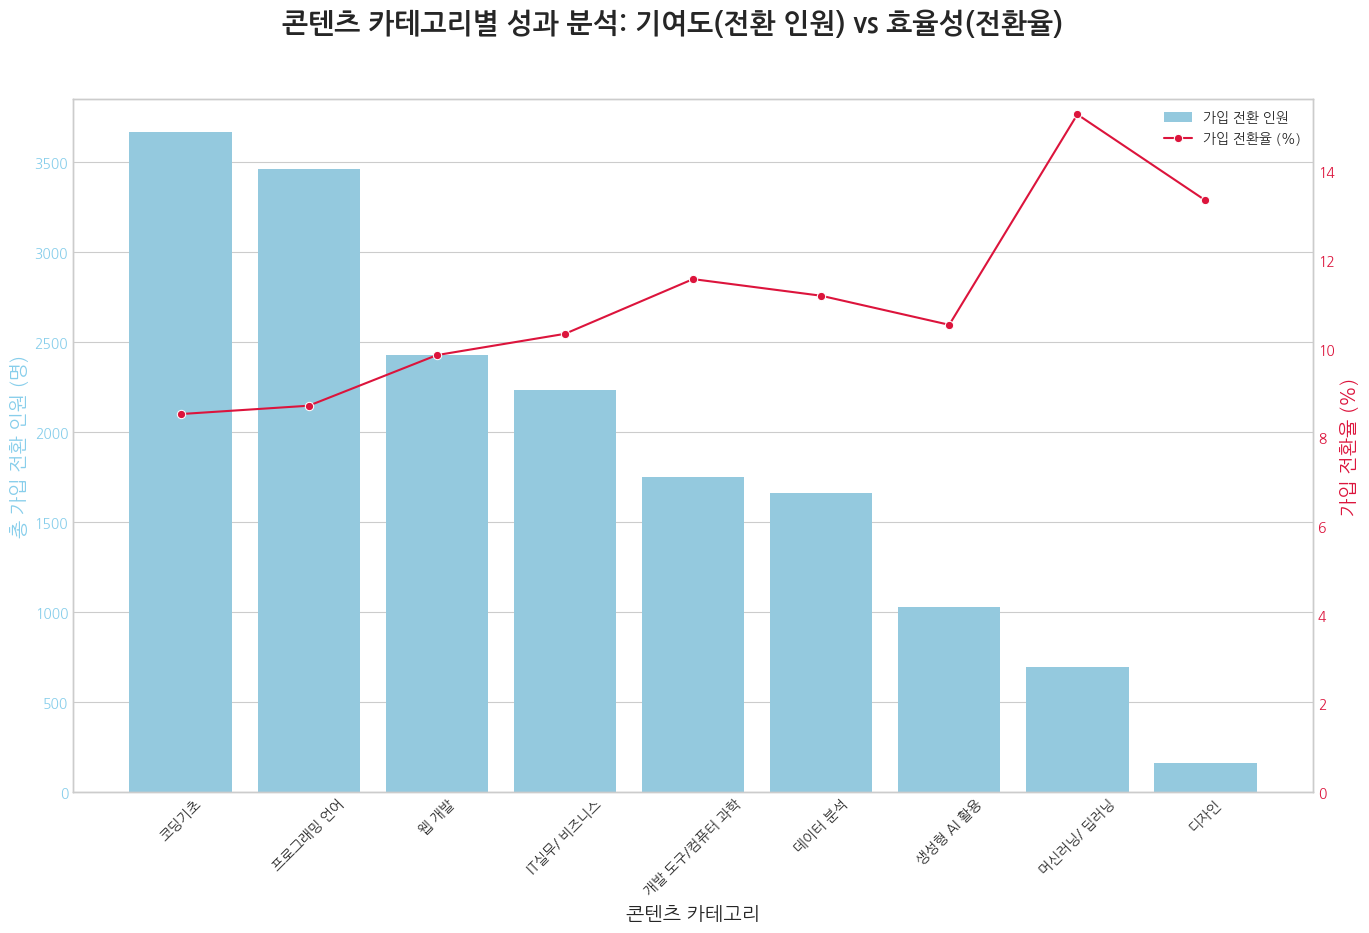

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- [수정] 4단계: 시각화를 위해 데이터 재정렬 --------------------
# [핵심] '총 가입 전환 인원'을 기준으로 정렬하여, 가장 기여도가 높은 카테고리부터 보여줍니다.
plot_df = category_conversion_df.sort_values(by='converted_sessions', ascending=False)

print("\n\n--- [최종 분석 결과] 카테고리별 기여도(전환 인원) 및 효율성(전환율) ---")
print(plot_df.round(2))


# -------------------- [핵심 수정] 5단계: 이중 축 차트 시각화 --------------------
print("\n✅ 5단계: 최종 분석 결과를 이중 축 차트로 시각화합니다...")
plt.rc('font', family='NanumGothic')

# 1. 캔버스와 첫 번째 Y축(ax1, 막대그래프용)을 생성합니다.
fig, ax1 = plt.subplots(figsize=(16, 9))
fig.suptitle('콘텐츠 카테고리별 성과 분석: 기여도(전환 인원) vs 효율성(전환율)', fontsize=20, weight='bold')

# 2. 첫 번째 Y축(ax1)에 '총 가입 전환 인원' 막대 그래프를 그립니다.
color_bar = 'skyblue'
sns.barplot(data=plot_df, x=plot_df.index, y='converted_sessions',
            ax=ax1, color=color_bar, label='가입 전환 인원')
ax1.set_xlabel('콘텐츠 카테고리', fontsize=14)
ax1.set_ylabel('총 가입 전환 인원 (명)', color=color_bar, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.tick_params(axis='x', rotation=45) # x축 라벨 회전

# 3. 두 번째 Y축(ax2, 선 그래프용)을 생성합니다.
ax2 = ax1.twinx()
color_line = 'crimson'
ax2.set_ylabel('가입 전환율 (%)', color=color_line, fontsize=14)

# 4. 두 번째 Y축(ax2)에 '가입 전환율' 선 그래프를 그립니다.
sns.lineplot(data=plot_df, x=plot_df.index, y='conversion_rate(%)',
             ax=ax2, color=color_line, marker='o', sort=False, label='가입 전환율 (%)')
ax2.tick_params(axis='y', labelcolor=color_line)

# y축 범위를 조정하여 선 그래프가 잘 보이게 합니다.
ax2.set_ylim(bottom=0)

# 5. 범례(Legend)를 하나로 합쳐서 깔끔하게 표시합니다.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
ax1.get_legend().remove() # 원래의 범례는 제거

plt.grid(False) # 이중 축 차트에서는 그리드를 끄는 것이 더 깔끔합니다.
plt.show()